# Household Income and Expenditure Survey

<br>

Ehsan Saboori Kenari

Mohamad Hoseini

<br>

In [1]:
#Importing required libraries
# import pyodbc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import glob
# import pyreadr
import re

import warnings # this will avoid showing warning in notebook
warnings.filterwarnings('ignore')

# set display format of dataframe
pd.options.display.float_format = '{:.3f}'.format
marker=['s','o','^','D','*','p', '+']
genderCode={'male':1, 'female':0}
collarCode={'white':0,'blue':1,'military':2}

# !pip install python-bidi
# !pip install arabic_reshaper
# from bidi.algorithm import get_display
# import arabic_reshaper

def farsi(x):
    reshaped_text = arabic_reshaper.reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

# %matplotlib inline

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 70

# Read cleaned data

In [2]:
# !pip install pyarrow
# data.to_feather(r"E:\This_Term\Thesis other things\Data\data2.file")
# try:
    # windows 10
data=pd.read_feather(r"./../../Data/HEIS/data2.file")

# data=pd.read_feather(r"/home/sabouri/Dropbox/Labor/Data/HEIS/data2.file")

# except:
#     # ubuntu
#     data=pd.read_feather(r"/media/ehsan/New Volume/This_Term/Thesis other things/Data/data2.file")


# changing data type:
# default data.file columns format is as follows
# thus there is no need to run the following code:
# data=data.astype({'gender':'category', 
#                   'hour':'float16', 
#                   'day':'float16',
#                   'job':'float16', 
#                   'relation':'int8', 
#                   'weight':'float16', 
#                   'student':'category'})

In [3]:
data.dtypes

household        int64
person            int8
relation          int8
gender        category
age            float16
literate      category
student       category
education      float16
labor         category
marital       category
year              int8
RU                int8
occupation     float16
job            float16
hour           float16
day            float16
income1        float32
income2        float32
weight         float16
dtype: object

<br>

## Define new columns

<br>

In [4]:
###########################################################
# data.drop(columns=['participation'])
data.loc[(data['labor'].isin([1,2])), 'participation']=1
data.loc[(data['labor'].isin([3,4,5,6])), 'participation']=0
data.loc[(data['age']<16),'participation']=np.nan
# data.loc[(data['age']>65),'participation']=np.nan
data['participation']= data.participation.astype('category')

###########################################################
# unemployed note that for ages and in school individual it may work wrong 
data.loc[data.labor==2, 'unemployement']= 1
data.loc[data.labor==1, 'unemployement']= 0
data.loc[(data['age']<16),'unemployement']=np.nan
# data.loc[(data['age']>65),'unemployement']=np.nan
data['unemployement']= data.unemployement.astype('category')

###########################################################
# collar is occupation type of emplyed individual
data.loc[(data.occupation<5000)
         &(data.occupation>=1000)&
         (data.year>77) , 'collar']= 0 # white-collar 
data.loc[(data.occupation>=4000)&(data.year>77), 'collar']= 1 #blue collar
data.loc[(data.occupation<1000)&(data.year>77),'collar']= 2 # military

data.loc[(data.occupation<500)
         &(data.occupation>=100)&
         (data.year<=77) , 'collar']= 0 # white-collar 
data.loc[(data.occupation>=400)&(data.year<=77), 'collar']= 1 #blue collar
data.loc[(data.occupation<100)&(data.year<=77),'collar']= 2 # military
data['collar']= data.collar.astype('category')

###########################################################
# changing student code: 1 is student and 0 if not student
data['student']= data.student.astype('float16')
data.loc[(data.student==2) , 'student'] = 0
data['student'] = data['student'].astype('float32')

###########################################################
# changing gender code: 1 male and 0 for female
data['gender']= data.gender.astype('float16')
data.loc[data.gender==2,'gender']= 0
data['gender'] = data['gender'].astype('float32')

###########################################################
# birth year of each individual
data['birth_y']= data['year']-data['age']

###########################################################
data.loc[(data.marital==1), 'married']= 'married'
data.loc[(data.marital.isin([2,3,4])), 'married']= 'single'
data= data.astype({'married':'category'})

###########################################################
# define educated
# data.loc[(data.year.isin([85,86,87,88,89,90,91,92])) , 'education'] = data.education / 10
# data.loc[(data.year.isin([97])) , 'education'] = data.education * 10

# data.loc[(data.literate==2), 'educated'] = 0
# data.loc[(data.education<50) , 'educated'] = 0
# data.loc[(data.education>=50) , 'educated'] = 1
# data.loc[(data.year>=93)&(data.year<=96)&(data.education==71), 'educated'] = 0

# data.loc[(data.education.isna())&(data.literate!=2) , 'educated'] = np.nan



In [5]:
#####################################################################
# define education level frome education code
#####################################################################
data.loc[(data.year<=84)
         &(data.education<=21),"educLevel"] = 5
data.loc[(data.year<=84)
         &(data.education.isin([22,23,24,25])),"educLevel"] = 8
data.loc[(data.year<=84)
         &(data.education.isin([26,27,28,29,30,31,32,33,
                                34,38,40,41,42,43,44,45,
                                46,47,92,93])),"educLevel"] = 11
data.loc[(data.year<=84)
         &(data.education.isin([39,35,48,49])),"educLevel"] = 12
data.loc[(data.year<=84)
         &(data.education.isin([51,52,61,62,94])),"educLevel"] = 16
data.loc[(data.year<=84)
         &(data.education.isin([71,72,73])),"educLevel"] = 18
data.loc[(data.year<=84)
         &(data.education.isin([75,76])),"educLevel"] = 22
data.loc[(data.year<=84)
         &(data.education.isin([77,78])),"educLevel"] = 24
data.loc[(data.year<=84)
         &(data.education.isin([81,82,83,85,86,87,89,91])),"educLevel"] = np.nan

####################################################
####################################################
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==11),"educLevel"] = 5
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==21),"educLevel"] = 8
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==31),"educLevel"] = 11
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==41),"educLevel"] = 12
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==51),"educLevel"] = 14
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==52),"educLevel"] = 16
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==53),"educLevel"] = 18
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==61),"educLevel"] = 22
data.loc[(data.year<=96)
         &(data.year>=93)
         &(data.education==71),"educLevel"] = np.nan
####################################################
####################################################
data.loc[(data.year.isin([97,98]))
         &(data.education==1),"educLevel"] = 5
data.loc[(data.year.isin([97,98]))
         &(data.education==2),"educLevel"] = 8
data.loc[(data.year.isin([97,98]))
         &(data.education==3),"educLevel"] = 11
data.loc[(data.year.isin([97,98]))
         &(data.education==4),"educLevel"] = 12
data.loc[(data.year.isin([97,98]))
         &(data.education==5),"educLevel"] = 14
data.loc[(data.year.isin([97,98]))
         &(data.education==6),"educLevel"] = 16
data.loc[(data.year.isin([97,98]))
         &(data.education==7),"educLevel"] = 18
data.loc[(data.year.isin([97,98]))
         &(data.education==8),"educLevel"] = 22
data.loc[(data.year.isin([97,98]))
         &(data.education==9),"educLevel"] = np.nan
####################################################
####################################################
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education<200),"educLevel"] = 5
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education>=200)
         &(data.education<300),"educLevel"] = 8
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education>=300)
         &(data.education<500),"educLevel"] = 12
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education>=500),"educLevel"] = 16
# data.loc[(data.year<=92)
#          &(data.year>=85)
#          &(data.education.isin([513,514,515])),"educLevel"] = 18
# data.loc[(data.year<=92)
#          &(data.year>=85)
#          &(data.education.isin([516,517])),"educLevel"] = 18
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education>=600)
         &(data.education<700),"educLevel"] = 22
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education.isin([605,606,515,510,520,310])),"educLevel"] = np.nan

####################################################
####################################################
data.loc[(data.literate==2), "educLevel"] = 0


In [6]:
data.loc[(data.year<=92)
         &(data.year>=85)
         &(data.education>90)
         |(data.education.isin([60.5,60.6,51.5,51.0,52.0,31.0])), "educated"] = np.nan
data.loc[(data.year<=84)
         &(data.education.isin([81,82,83,85,86,87,89,91])),"educated"] = np.nan
data.loc[(data.year>=93)&(data.year<=96)&(data.education==71), 'educated'] = np.nan
data.loc[(data.year==97)&(data.education==90), 'educated'] = np.nan

In [7]:
## define educated ##
# data.drop(columns=["educated"],inplace=True)
data.loc[data.educLevel>12, "educated"]= 1
data.loc[data.educLevel<=12, "educated"]= 0

In [8]:
data= data.astype({"weight":"float64"})

# sarbaz=data.loc[(data.year==90)&(data.occupation==112) , :].weight.sum()
# kol =  data.loc[(data.year==90) ,:].weight.sum()
# sarbaz/kol*100

In [9]:
data['birth_y'] = data['birth_y'].astype('float32')
data['age'] = data['age'].astype('float32')

<br>

## Size of each household

In [10]:
# tedad= pd.DataFrame(data[(data.year== 90)].household.value_counts()
#             ).rename(columns={'household':'size'})

In [11]:
data.columns

Index(['household', 'person', 'relation', 'gender', 'age', 'literate',
       'student', 'education', 'labor', 'marital', 'year', 'RU', 'occupation',
       'job', 'hour', 'day', 'income1', 'income2', 'weight', 'participation',
       'unemployement', 'collar', 'birth_y', 'married', 'educLevel',
       'educated'],
      dtype='object')

## Initial Conditions

In [12]:
# cohort = [60,61,62,63,64,65]
cohort = [64,65,66,67,68,69]

data.loc[(data.age==16)
         &(data.birth_y.isin(cohort))
         &(data.gender==1) ,:].educLevel.value_counts(normalize=True)

educLevel
11.000   0.472
8.000    0.223
5.000    0.171
12.000   0.107
0.000    0.026
16.000   0.000
Name: proportion, dtype: float64

In [13]:
for educ in [0,5,8,11,12]:
    a=data.loc[(data.age==16)
             &(data.birth_y.isin(cohort))
             &(data.gender==1)
             &(data.educLevel==educ) ,"weight"].sum()
    b=data.loc[(data.age==16)
         &(data.birth_y.isin(cohort))
         &(data.gender==1)
         &(data.educLevel.notna()) ,"weight"].sum()
    share = a / b
    print("education level= ",educ,", share= ",share)

education level=  0 , share=  0.022874858167483653
education level=  5 , share=  0.1524175103330329
education level=  8 , share=  0.21011329309332646
education level=  11 , share=  0.5000263032018032
education level=  12 , share=  0.11413707703158195


In [14]:
# cohort = [64,65,66,67,68]

# for educ in [0,5,8,11,12]:
#     a=data.loc[(data.age==16)
#              &(data.birth_y.isin(cohort))
#              &(data.gender==1)
#              &(data.educLevel==educ) ,"weight"].sum()
#     b=data.loc[(data.age==16)
#          &(data.birth_y.isin(cohort))
#          &(data.gender==1)
#          &(data.educLevel.notna()) ,"weight"].sum()
#     share = a / b
#     print("education level= ",educ,", share= ",share)

In [15]:
# cohort = np.arange(54,70,1)

# for educ in [0,5,8,11,12]:
#     a=data.loc[(data.age==16)
#              &(data.birth_y.isin(cohort))
#              &(data.gender==1)
#              &(data.educLevel==educ) ,"weight"].sum()
#     b=data.loc[(data.age==16)
#          &(data.birth_y.isin(cohort))
#          &(data.gender==1)
#          &(data.educLevel.notna()) ,"weight"].sum()
#     share = a / b
#     print("education level= ",educ,", share= ",share)

<br>

# Analysis of data


In [16]:
# wm is weighted mean function required for grouping when data have missingv value
# since python don't have average function like R, we create this function

wm = lambda x: np.ma.average(np.ma.masked_array(x.to_numpy(dtype="float64", na_value=np.nan),x.isna()), 
                             weights=data.loc[x.index, "weight"])

wmPanel = lambda x: np.ma.average(np.ma.masked_array(x, np.isnan(x)),
                          weights=panel.loc[x.index, "weight"])

wmincome = lambda x: np.ma.average(np.ma.masked_array(x.to_numpy(dtype="float64", na_value=np.nan),x.isna()),
                          weights=income.loc[x.index, "weight"])

import math
def wmDev(x):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    values = np.ma.masked_array(x.to_numpy(dtype="float64", na_value=np.nan),x.isna())
    average = np.average(values, weights=data.loc[x.index, "weight"])
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=data.loc[x.index, "weight"])
    return (math.sqrt(variance))

<br>

# Decision of individuals in each period based on model
<br>

## Defining choice of individual in the each period(=year)

**1.** if person is employed, choice is assigned to the collor type of occuptation, mean:
    
    1. choice is 'blue' if blue collar occupation
    2. choice is 'white' if white collar occupation 
    3. choice is 'military' if in the mandatory military servie

some notes: We first consider occupation of a individuals rather than thier schooling status, althogh
the number of people studying and working at the same time is lower than 2 percent each year.

and also we put asside from data individuals employed in military, but not whom in mandatory military 
service, which is a situation that most of men encounter with during their youth.


**2.** then if person is not employed and report student that year, we assign 'student' to their choice variable. (even when the person did not stduy during the pas week)


**3.** if person is not student but unemployed, choice variable is set to 'unemployed'


**4.** if none of above, choice is 'home' meaning person decided to stay at home.

<br>

In [17]:
# we just consider people between 18 and 65 years old from now.
data= data.loc[(data.age>=16)&(data.age<=65),:]

data.drop(columns=['choice'],inplace=True,errors="ignore")

# define decision of each individual in each year
data.loc[(data.labor== 2) , 'choice']= 'unemployed'


data.loc[(data.labor==5), 'choice']= 'home'
data.loc[(data.labor==3), 'choice']= 'home'


data.loc[(data.student==1),'choice']= 'study'
data.loc[(data.labor==4),'choice']= 'study'

data.loc[(data.collar==1),'choice']= 'blue'
data.loc[(data.collar==0),'choice']= 'white'

data.loc[(data.occupation== 112)
         &(data.year<=95)
         &(data.year>=78)
         &(data.gender==1),'choice']= 'military'
data.loc[(data.occupation== 510)
         &(data.year.isin([96,97,98]))
         &(data.gender==1),'choice']= 'military'
data.loc[(data.occupation== 12)
         &(data.year.isin([76,77]))
         &(data.gender==1),'choice']= 'military'



# change the type of choice to category
data.choice= pd.Categorical(data.choice,
                            categories=['home', 'study', 'unemployed', 'blue', 'white','military'],
                            ordered=True)

# data=data.astype({'choice': 'category'},cat)

<br>

define dummy variable for each choice for calculating weighted average of each decision in each year.

In [18]:
dummy=pd.get_dummies(data['choice'],dtype='float16')
dummy.loc[data.choice.isna(), :] = np.nan
data=pd.concat([data,dummy],axis=1)
del dummy

<br>

## Career decisions by year


In [19]:
groupDataYearGender= data.groupby(by=(['year', 'gender'])).agg({'home':wm,'study':wm,'unemployed':wm,'blue':wm,'white':wm,'military':wm}).reset_index()
groupDataYearGender["home"] = groupDataYearGender.home + groupDataYearGender.unemployed

<br>

*graph*
**Male career decision by year (weighted calculation)**


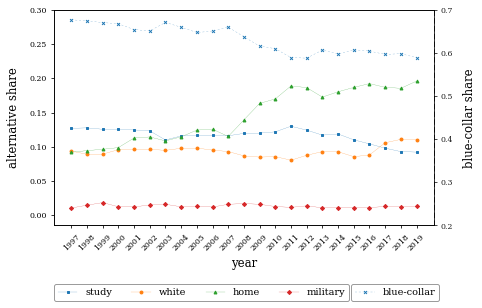

In [20]:
stat={'male': ['study','white','home','military'] ,
      'female': ['study','white','blue']}
fSize = 12
tSize = 8

for gender in ['male']:
    
    fig=plt.figure(figsize=(7, 4))
    plt.rc('font', family='serif')
    plt.rc('xtick',labelsize=tSize)
    plt.rc('ytick',labelsize=tSize)

    ax1=fig.add_subplot(1,1,1)
    
    
    ax2=ax1.twinx()
    for index, choice in enumerate(["blue"]):
        lns = ax2.plot('year',choice,"x",
                dashes = [10,10] ,
                data=groupDataYearGender[groupDataYearGender.gender== genderCode[gender]],
                label="blue-collar"
                ,linewidth=0.2
                # ,color = color_range[3]
                ,markersize=3)
        
        
    for index, choice in enumerate(stat[gender]):
        one = ax1.plot('year',choice, 
                data=groupDataYearGender[groupDataYearGender.gender== genderCode[gender]],
                label=choice , linewidth=0.2, marker=marker[index],
                markersize=3
                # ,color = color_range[5] if choice=="military" else color_range[index]
                      )  
        lns = lns + one

    ax1.set_xlabel('year',             fontsize=fSize,labelpad=5)
    ax1.set_ylabel('alternative share',fontsize=fSize,labelpad=10)
    ax2.set_ylabel('blue-collar share',fontsize=fSize,labelpad=10)

    ax1.set_xticks(np.arange(76,99))
    ax1.set_xticklabels([year+621 for year in np.arange(1376,1399)],rotation=45)
    
    # ax1.set_yticks(np.arange(0,0.31,0.05))
    # ax1.set_yticklabels([f"{share*100:.0f} %" for share in np.arange(0,0.31,0.05)])
    ax1.set_ylim(-0.015,0.3)

    
    
#     ax2.spines['right'].set_linestyle((0,(6,4)))
    ax1.spines['right'].set_linestyle((0,(6,4)))
    ax2.tick_params(axis='y', colors=(0,0,0,0.9))
#     ax2.spines['right'].set_color((0,0,0,0.9))
    ax2.set_ylim(0.2,0.7)
    
    labs = [l.get_label() for l in lns ]
    lgd=ax2.legend(loc='upper left',edgecolor='gray',prop={'size':10}
                  , bbox_to_anchor=(0.77, -0.25),ncol=6,handlelength=2)
    lgd=ax1.legend(loc='upper right',edgecolor='gray',prop={'size':10}
                  , bbox_to_anchor=(0.79, -0.25),ncol=6,handlelength=2)
    
    
    #ax1.grid(axis='y',alpha=0.5)
#     ax2.spines['top'].set_visible(False)
#     ax1.spines['top'].set_visible(False)

# plt.savefig(r'Results/Paper/career decision of men by year.pgf',bbox_inches='tight', bbox_extra_artists=(lgd,))
plt.show()

# fig.savefig(f"Results/Paper/career decision of men by year.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=500)


### Every five year

In [21]:

data['cohort5']= pd.cut(x=data.loc[:,'birth_y'],bins=np.arange(49,81,5),
                       labels=[f'[{year+1},{year+5}]' for year in np.arange(49,79,5)])

groupAgeGenderCohort5=data.groupby(by=['age','cohort5','gender']).agg(
            {'study':wm,'unemployed':wm,'blue':wm,'white':wm,'military':wm,'home':wm }
            ).reset_index()

data.drop(columns=['cohort5'], inplace= True)

In [22]:
groupDataYearGender= data.groupby(by=(['year', 'gender'])).agg({'home':wm,'study':wm,'unemployed':wm,'blue':wm,'white':wm,'military':wm}).reset_index()
groupDataYearGender["home"] = groupDataYearGender.home + groupDataYearGender.unemployed

In [23]:
groupDataYearGender= data.groupby(by=(['year', 'gender'])).agg({'home':wm,'study':wm,'unemployed':wm,'blue':wm,'white':wm,'military':wm}).reset_index()
groupDataYearGender["home"] = groupDataYearGender.home + groupDataYearGender.unemployed

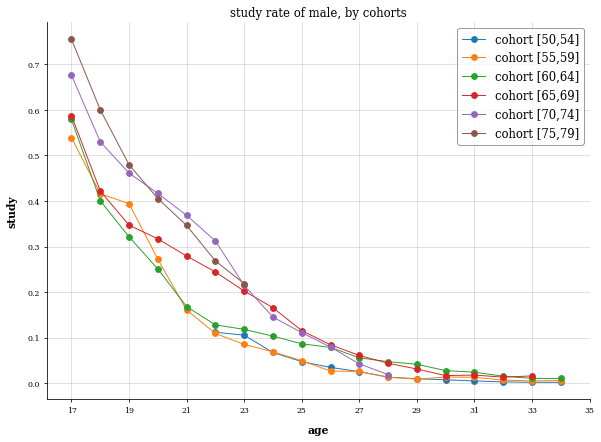

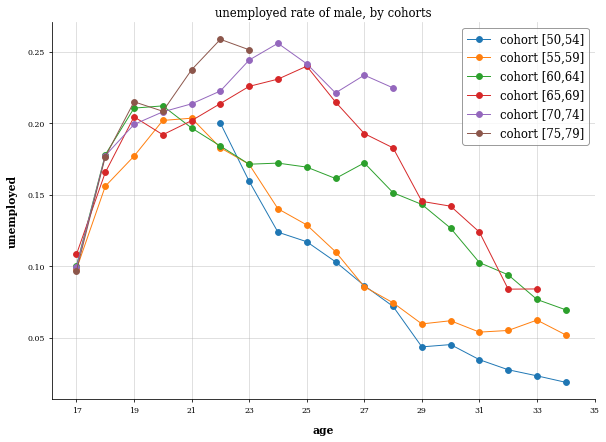

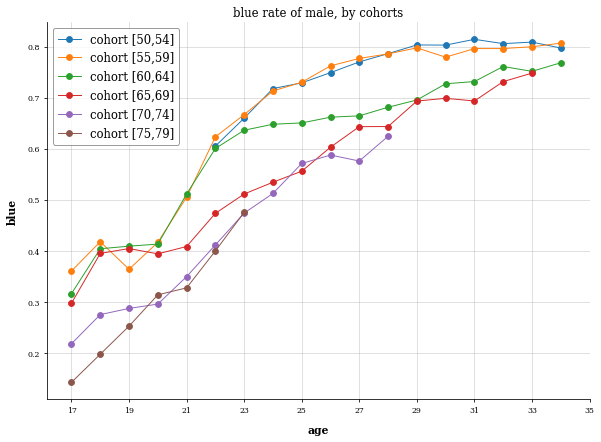

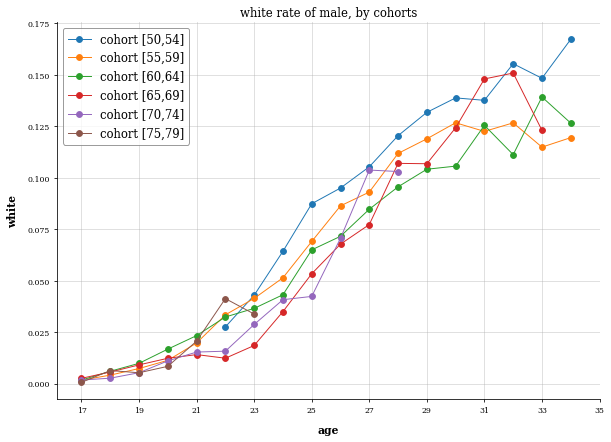

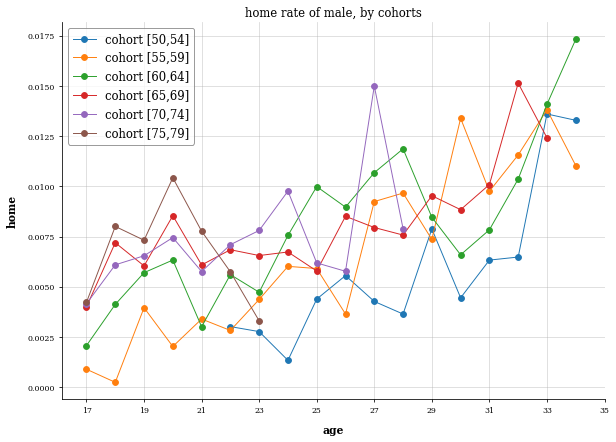

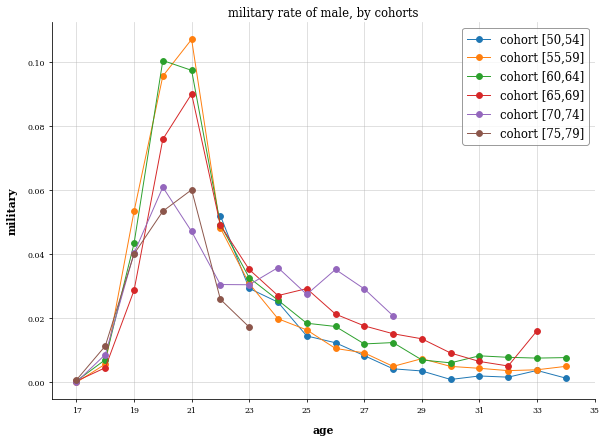

In [24]:
gender= 'male'
#########################

for stat in ['study', 'unemployed','blue', 'white','home','military']:
    fig = plt.figure(figsize=(10,7))
    ax1=fig.add_subplot(1,1,1)

    for index,cohort in enumerate(groupAgeGenderCohort5['cohort5'].unique()):
        plt.plot('age', stat ,'-o',
                data=groupAgeGenderCohort5[(groupAgeGenderCohort5['age']>16)
                                        &(groupAgeGenderCohort5['age']<35)
                                        &(groupAgeGenderCohort5['cohort5']==cohort)
                                        &(groupAgeGenderCohort5['gender']== genderCode[gender])],
                label=f'cohort {cohort}',
#                 marker=marker[index], 
                 linewidth=1)
    ax1.set_title(f'{stat} rate of {gender}, by cohorts')
    ax1.set_xlabel('age',fontsize=11,labelpad=10,fontweight='bold')
    ax1.set_xticks(np.arange(17,36,2))
    ax1.set_ylabel(f'{stat}',fontsize=11,labelpad=10,fontweight='bold')

    ax1.grid(axis='both',alpha=0.5)
    ax1.legend(loc='best',edgecolor='gray',prop={'size':12})
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.show()

<br>

# Wage and salary income 


<br>

In [25]:
data.drop(columns=['cpi'], inplace=True, errors="ignore")
cpi= pd.DataFrame(data={'year':np.arange(76,99),
                       'cpi':[5.298, 6.258, 7.516, 8.463, 9.427, 10.915,
                              12.624, 14.544, 16.048, 17.955, 21.265, 26.66,
                              29.527, 33.188, 40.321, 52.635, 70.916, 81.948,
                              91.714, 100, 109.6, 137.3, 185.3 ]})

data= pd.merge(data, cpi, on=['year'], how='left')
data=data.astype({'cpi':'float16'})

In [26]:
######################
# real income and also equivalent income is created hear:
data['realIncome']= data.income1/ data.cpi * 100 
data.loc[(data.realIncome<=0), 'realIncome'] = np.nan


data['totalHour']= data.day*data.hour
data.loc[(data.totalHour<=15), 'totalHour']= np.nan

data.loc[(data.year<=83)&(data.gender==0)&(data.totalHour.notna()), 'totalHour']= np.nan #38.5
data.loc[(data.year<=83)&(data.gender==1)&(data.totalHour.notna()), 'totalHour']= np.nan #50

data['equivalentIncome'] = data.realIncome * 40/(data.totalHour)

# data['LogEquivalentIncome'] = np.log(data.equivalentIncome)

In [27]:
data[data.year==98].realIncome.describe()

count        22174.000
mean     103757672.000
std       79679224.000
min         117894.742
25%       45344128.000
50%       89068824.000
75%      142510128.000
max     1943319808.000
Name: realIncome, dtype: float64

estimate working time of individuals based on their charectristics:

In [28]:
# EUSHours = pd.read_csv("E:\This_Term\Thesis other things\Data\hourEstimated.csv")

# EUSHours["gender"]=EUSHours.gender.map({"male":1, "female":0})


# hourEstimated=data.groupby(
#     by=['birth_y','gender','year','educated','collar','married']).agg({
#     'totalHour':wm}).reset_index()

# hourEstimated.rename(columns={"totalHour":"hourEstimated"}, inplace=True)

# data.drop(columns=["hourEstimated"],inplace=True)
# data=pd.merge(data,hourEstimated
#         ,on=['birth_y','gender','year','educated','collar','married']
#         ,how="left")

# data.loc[(data.year<84), "hourEstimated"]= data.EUSEstimated

# data.loc[(data.hourEstimated<=0),"hourEstimated"]=np.nan
data['equivalentIncomeTest'] = data.realIncome #* 40 /data.hourEstimated

In [29]:

wageMoment=data[(data.collar!=2)
                &(data.equivalentIncome.notna())
        &(data.age<=65)
        &(data.birth_y.isin(np.arange(20,70)))
        &(data.gender==1)].groupby(by=['age','collar']).agg({
        'equivalentIncome':wm}).reset_index() 


wageMoment['income']= wageMoment.equivalentIncome#* 40 / wageMoment.totalHour['<lambda>']

wageMoment = wageMoment.loc[:,["age","collar","income"]]

wageMoment

,age,collar,income
0,16.000,0.000,51987232.000
1,16.000,1.000,35725319.973
2,16.000,2.000,NaN
3,17.000,0.000,38818780.280
4,17.000,1.000,39252138.768
...,...,...,...
145,64.000,1.000,83353618.889
146,64.000,2.000,NaN
147,65.000,0.000,152033884.623
148,65.000,1.000,79822620.112


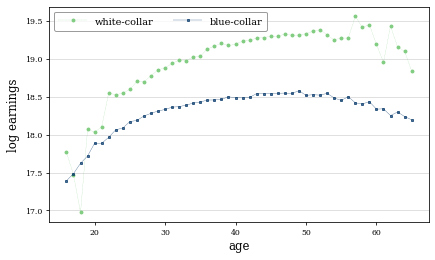

In [30]:
wageMoment["logIncome"]= np.log(wageMoment.income)
label={0:"white-collar",1:"blue-collar",2:"conscription"}
labelEduc={1:"educated",0:"not educated"}

fig= plt.figure(figsize=(7,4))
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
ax1=fig.add_subplot(1,1,1)


ax1.plot("age","logIncome"
        ,dashes=[5, 2] 
        ,data=wageMoment.loc[(wageMoment.collar==0)
                             ,:]
        ,marker=marker[1]
        ,label=f"white-collar"
        ,markersize=3
        ,color= (0.5,0.8,0.5,1)
        ,linewidth= 0.2
        )

line1=ax1.plot("age","logIncome"
        ,dashes=[1,0]
        ,data=wageMoment.loc[(wageMoment.collar==1)
                             ,:]
        ,marker=marker[0]
        ,label=f"blue-collar"
        ,markersize=3
        ,color=(0,0.2,0.4,0.7)
        ,linewidth= 0.4
        )


ax1.set_xlabel('age',fontsize=fSize,labelpad=3,fontweight='regular')
ax1.set_ylabel('log earnings',fontsize=fSize,labelpad=5,fontweight='regular')
# ax1.set_xticks(np.arange(wageMoment.age.min(),wageMoment.age.max()+1))
# ax1.set_xticklabels([age for age in  np.arange(wageMoment.age.min(),wageMoment.age.max()+1).astype(np.int)])

# ax1.set_ylim(16.85 , 19.6)
# ax1.set_yticks(np.arange(17,19.6,0.5))
# ax1.set_yticklabels(np.arange(17,19.6,0.5) , fontsize=12)

ax1.grid(axis='y',alpha=0.5)
ax1.legend(loc="best",edgecolor="gray", prop={"size":fSize-2},ncol=2,handlelength=3,handleheight=1.5)
# lgd=ax1.legend(loc='upper center',edgecolor='black',prop={'size':12}
#               , bbox_to_anchor=(0.5, -0.12),ncol=6,handlelength=2)

plt.show()
# fig.savefig(f"income cohort 60.pdf", bbox_inches='tight')


In [31]:
# df_est = binscatter(x='age', y='equivalentIncome', ci=(3,3), 
#                    data =
data[(data.collar!=2)
                            &(data.equivalentIncome.notna())
                            &(data.age<=65)
                            &(data.birth_y.isin(np.arange(30,70)))
                            &(data.gender==1)]

,household,person,relation,gender,age,literate,student,education,labor,marital,...,study,unemployed,blue,white,military,cpi,realIncome,totalHour,equivalentIncome,equivalentIncomeTest
573272,100011035,1,1,1.000,37.000,1.000,0.000,23.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,16.047,78519960.000,56.000,56085688.000,78519960.000
573277,100061064,1,1,1.000,41.000,1.000,0.000,33.000,1.000,2.000,...,0.000,0.000,1.000,0.000,0.000,16.047,227278704.000,54.000,168354592.000,227278704.000
573280,100011034,1,1,1.000,38.000,1.000,0.000,16.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,16.047,112171376.000,60.000,74780920.000,112171376.000
573290,100041053,1,1,1.000,44.000,1.000,0.000,33.000,1.000,1.000,...,0.000,0.000,0.000,1.000,0.000,16.047,189206432.000,30.000,252275232.000,189206432.000
573292,100041053,3,3,1.000,22.000,1.000,0.000,43.000,1.000,4.000,...,0.000,0.000,1.000,0.000,0.000,16.047,113012664.000,70.000,64578664.000,113012664.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988551,23005707411,1,1,1.000,41.000,1.000,0.000,1.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,185.250,129482688.000,84.000,61658424.000,129482688.000
1988574,23003706223,1,1,1.000,32.000,1.000,0.000,1.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,185.250,161943328.000,48.000,134952768.000,161943328.000
1988576,23003706210,1,1,1.000,37.000,1.000,0.000,1.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,185.250,97165992.000,48.000,80971656.000,97165992.000
1988580,23003706212,1,1,1.000,32.000,1.000,0.000,1.000,1.000,1.000,...,0.000,0.000,1.000,0.000,0.000,185.250,174898784.000,48.000,145748992.000,174898784.000


In [32]:
df_est

NameError: name 'df_est' is not defined

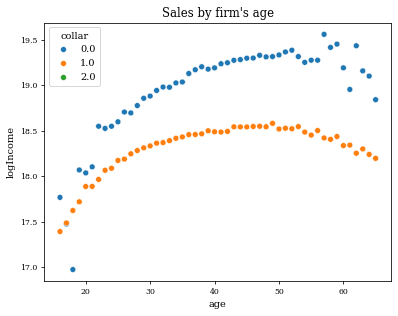

In [33]:
# Plot binned scatterplot
import seaborn as sns
sns.scatterplot(x='age', y='logIncome', data=wageMoment.loc[(wageMoment.collar.isin([0,1]))], hue='collar');
# plt.errorbar('age', 'sales', yerr='ci', data=df_est.query("online==0"), ls='', lw=2, alpha=0.2);
# plt.errorbar('age', 'sales', yerr='ci', data=df_est.query("online==1"), ls='', lw=2, alpha=0.2);
plt.title("Sales by firm's age");

In [34]:
# !pip install binsreg
import binsreg

def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(df[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est

# Moment Conditions

## each choice distribution conditions:

In [38]:
# cohort = np.arange(54,70)
cohort = [64,65,66,67,68,69]

sample = data.loc[
        (data.educated.isin([0,1]))&
           (data.birth_y.isin(cohort))
          &(data.gender==1), :]

In [39]:

choiceMoment=sample.groupby(by=(["age"])).agg( 
            {'choice':'count','home':"mean",'study':"mean",'unemployed':"mean"
             ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()

choiceMoment["home"] = choiceMoment.home+choiceMoment.unemployed

choiceMoment = choiceMoment.loc[:,["age","home","study","white","blue","military","choice"]]
# choiceMoment.to_csv(r"C:\Users\claudioq\Dropbox\Labor\Codes\Moments\choiceMoment.csv"
#                         ,index=False,header=False)

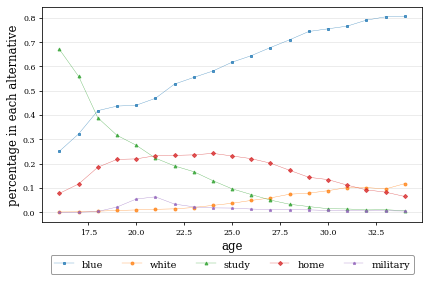

In [40]:
fSize = 12
tSize = 8

fig= plt.figure(figsize=(7,4))
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
ax1=fig.add_subplot(1,1,1)

for index,choice in enumerate(["blue","white","study","home","military"]):
    ax1.plot("age",choice
            ,data=choiceMoment.loc[(choiceMoment.age<=80),:]
            ,marker=marker[index]
            ,label=f"{choice}"
            ,markersize=3
            ,alpha=0.75
            ,linewidth= 0.4
            )

#     ax1.set_title(f'career decision of {gender} by year', fontsize= 14)
ax1.set_xlabel('age',fontsize=fSize,labelpad=3)
ax1.set_ylabel('percentage in each alternative',fontsize=fSize,labelpad=3)
# ax1.set_xticks(np.arange(choiceMoment.age.min(),choiceMoment.age.max()+1-2))
# ax1.set_xticklabels([age for age in np.arange(choiceMoment.age.min(),choiceMoment.age.max()+1-2).astype(np.int)])

# ax1.set_ylim(-0.04 , 0.82)
# ax1.set_yticks(np.arange(0.0,0.81,0.1))
# ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)

ax1.grid(axis='y',alpha=0.3)
lgd=ax1.legend(loc='upper center',edgecolor='gray',prop={'size':fSize-2}
              , bbox_to_anchor=(0.5, -0.13),ncol=6,handlelength=2,handleheight=1.4)
# Hide the right and top spines

plt.show()

# fig.savefig(f"Results/Paper/choice share of cohort 60.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')




In [41]:
choiceMoment["home"] =choiceMoment["home"] *100
choiceMoment["study"] =choiceMoment["study"]*100
choiceMoment["white"] =choiceMoment["white"]*100
choiceMoment["blue"] = choiceMoment["blue"]*100
choiceMoment["military"] =choiceMoment["military"]*100
choiceMoment.loc[(choiceMoment.age<=36),:]

,age,home,study,white,blue,military,choice
0,16.000,7.783,66.939,0.139,25.130,0.009,11512
1,17.000,11.665,55.859,0.206,32.243,0.027,11162
2,18.000,18.532,38.848,0.483,41.794,0.344,10760
3,19.000,21.756,31.643,0.757,43.657,2.186,8324
4,20.000,21.960,27.578,0.988,44.016,5.458,9308
5,21.000,23.268,22.273,1.240,46.856,6.362,9352
6,22.000,23.410,19.066,1.429,52.714,3.382,10705
7,23.000,23.615,16.710,1.973,55.440,2.262,10036
8,24.000,24.230,13.001,2.860,58.084,1.826,9476
9,25.000,23.161,9.661,3.721,61.706,1.752,9192


In [42]:
# print(choiceMoment.to_latex(index=False,float_format="%.1f"))

In [43]:
choiceMoment=sample[(sample.age>=22)].groupby(by=(["age","educated"])).agg( 
            {'choice':'count','home':"mean",'study':"mean",'unemployed':"mean"
             ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
choiceMoment= choiceMoment[choiceMoment.choice>100]

choiceMoment2=data[(data.age<22)
          &(data.birth_y.isin(cohort))
          &(data.gender==1)].groupby(by=(["age"])).agg( 
            {'choice':'count','home':"mean",'study':"mean",'unemployed':"mean"
             ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
choiceMoment2= choiceMoment2[choiceMoment2.choice>100]
choiceMoment2["educated"] = -1

choiceMoment = pd.concat([choiceMoment2,choiceMoment])
del choiceMoment2

choiceMoment["home"] = choiceMoment.home+choiceMoment.unemployed



choiceMoment = choiceMoment.loc[:,["age","educated","home","study","white","blue","military"]]
# choiceMoment.to_csv(r"C:\Users\claudioq\Dropbox\Labor\Codes\Moments\choiceMoment2.csv"
#                         ,index=False,header=False)

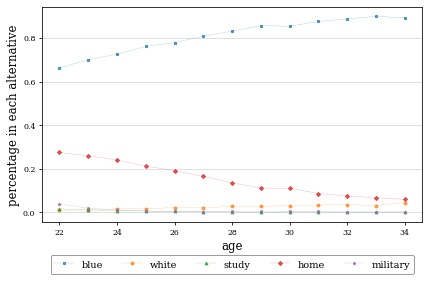

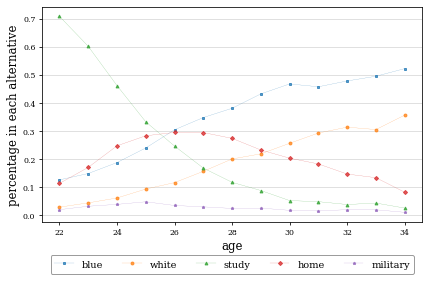

In [44]:

for educated in [0,1]:
    fig= plt.figure(figsize=(7,4))
    plt.rc('font', family='serif')
    plt.rc('xtick',labelsize=tSize)
    plt.rc('ytick',labelsize=tSize)
    ax1=fig.add_subplot(1,1,1)

    for index,choice in enumerate(["blue","white","study","home","military"]):
        ax1.plot("age",choice
                ,data=choiceMoment.loc[(choiceMoment.educated==educated),:]
                ,marker=marker[index]
                ,label=f"{choice}"
                ,markersize=3
                ,alpha=0.75
                ,linewidth= 0.2
                )

#     ax1.set_title(f'career decision of {gender} by year', fontsize= 14)
    ax1.set_xlabel('age',fontsize=fSize,labelpad=3,fontweight='regular')
    ax1.set_ylabel('percentage in each alternative',fontsize=fSize,labelpad=3,fontweight='regular')
#     ax1.set_xticks(np.arange(choiceMoment.age.min(),choiceMoment.age.max()+1))
#     ax1.set_xticklabels([age for age in np.arange(choiceMoment.age.min(),choiceMoment.age.max()+1).astype(np.int)])
    
    # ax1.set_ylim(-0.04 , 0.82)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)

    ax1.grid(axis='y',alpha=0.5)
    lgd=ax1.legend(loc='upper center',edgecolor='gray',prop={'size':fSize-2}
                  , bbox_to_anchor=(0.5, -0.13),ncol=6,handlelength=2,handleheight=1.4)
    # Hide the right and top spines

    plt.show()

    # fig.savefig(f"choice share of cohort 60.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


## wage moment conditions

In [45]:
# wm is weighted mean function required for grouping when data have missingv value
# since python don't have average function like R, we create this function

import math
def wmDev(x):
    x = x.sort_values()
    x = x[2:-2]
    variance = x.var()
    return (math.sqrt(variance))

def wm(x):
    x = x.sort_values()
    x = x[2:-2]
    mean = x.mean()
    return mean
    

### wageMomnet1: by collar

In [46]:
wageSize=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
         ,:].groupby(by=['age','collar']).agg({
        'realIncome': "count", 'equivalentIncome': "count"}).reset_index() 
wageSize.rename(columns={"equivalentIncome":"tedad"},inplace=True)

wageMoment=data[(data.collar!=2)
                &(data.equivalentIncome.notna())
        &(data.age<=65)
        &(data.birth_y.isin(cohort))
        &(data.gender==1)].groupby(by=['age','collar']).agg({
        'equivalentIncome':wm}).reset_index() 

wageMoment = pd.merge(wageMoment,wageSize,on=["age","collar"],how="left")

wageMoment = wageMoment.loc[(wageMoment.tedad>40),:]
wageMoment['income']= wageMoment.equivalentIncome#* 40 / wageMoment.totalHour['<lambda>']

wageMoment = wageMoment.loc[:,["age","collar","income"]]

wageDev=data[(data.collar!=2)
             &(data.equivalentIncome.notna())
        &(data.age<=65)
        &(data.birth_y.isin(cohort))
        &(data.gender==1)].groupby(by=['age','collar']).agg({
         "equivalentIncome":wmDev}).reset_index() 
# wageDev["equivalentIncome"] = np.sqrt(wageDev.equivalentIncome)
wageDev.rename(columns={"equivalentIncome":"deviation"},inplace=True)
wageDev = pd.merge(wageDev,wageSize,on=["age","collar"],how="left")

wageDev = wageDev.loc[(wageDev.tedad>40),:]

# wageMoment = pd.merge(wageMoment, wageDev,on=["age","educated","collar"],how="left")


# wageMoment.to_csv(r"C:\Users\claudioq\Dropbox\Labor\Codes\Moments\wageMoment.csv",
#                   index=False,header=False)
# wageMoment

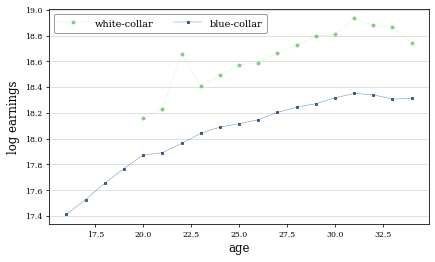

In [47]:
wageMoment["logIncome"]= np.log(wageMoment.income)
label={0:"white-collar",1:"blue-collar",2:"conscription"}
labelEduc={1:"educated",0:"not educated"}

fig= plt.figure(figsize=(7,4))
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
ax1=fig.add_subplot(1,1,1)


ax1.plot("age","logIncome"
        ,dashes=[5, 2] 
        ,data=wageMoment.loc[(wageMoment.collar==0)
                             ,:]
        ,marker=marker[1]
        ,label=f"white-collar"
        ,markersize=3
        ,color= (0.5,0.8,0.5,1)
        ,linewidth= 0.2
        )

line1=ax1.plot("age","logIncome"
        ,dashes=[1,0]
        ,data=wageMoment.loc[(wageMoment.collar==1)
                             ,:]
        ,marker=marker[0]
        ,label=f"blue-collar"
        ,markersize=3
        ,color=(0,0.2,0.4,0.7)
        ,linewidth= 0.4
        )


ax1.set_xlabel('age',fontsize=fSize,labelpad=3,fontweight='regular')
ax1.set_ylabel('log earnings',fontsize=fSize,labelpad=5,fontweight='regular')
# ax1.set_xticks(np.arange(wageMoment.age.min(),wageMoment.age.max()+1))
# ax1.set_xticklabels([age for age in  np.arange(wageMoment.age.min(),wageMoment.age.max()+1).astype(np.int)])

# ax1.set_ylim(16.85 , 19.6)
# ax1.set_yticks(np.arange(17,19.6,0.5))
# ax1.set_yticklabels(np.arange(17,19.6,0.5) , fontsize=12)

ax1.grid(axis='y',alpha=0.5)
ax1.legend(loc="best",edgecolor="gray", prop={"size":fSize-2},ncol=2,handlelength=3,handleheight=1.5)
# lgd=ax1.legend(loc='upper center',edgecolor='black',prop={'size':12}
#               , bbox_to_anchor=(0.5, -0.12),ncol=6,handlelength=2)

plt.show()
# fig.savefig(f"income cohort 60.pdf", bbox_inches='tight')


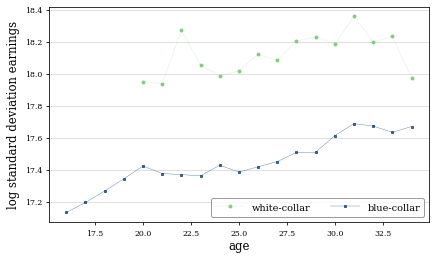

In [48]:
# wageDev=sample.loc[(sample.collar!=2)
#               &(sample.equivalentIncome.notna())
#               &(sample.age<65)
#         ,:].groupby(by=['age','collar']).agg({
#          "equivalentIncome":wmDev}).reset_index() 
# # wageDev["equivalentIncome"] = np.sqrt(wageDev.equivalentIncome)
# wageDev.rename(columns={"equivalentIncome":"deviation"},inplace=True)

wageDev["logdeviation"]= np.log(wageDev.deviation)
label={0:"white-collar",1:"blue-collar",2:"conscription"}
labelEduc={1:"educated",0:"not educated"}

fig= plt.figure(figsize=(7,4))
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
ax1=fig.add_subplot(1,1,1)


ax1.plot("age","logdeviation"
        ,dashes=[5, 2] 
        ,data=wageDev.loc[(wageDev.collar==0)
                             ,:]
        ,marker=marker[1]
        ,label=f"white-collar"
        ,markersize=3
        ,color= (0.5,0.8,0.5,1)
        ,linewidth= 0.2
        )

line1=ax1.plot("age","logdeviation"
        ,dashes=[1,0]
        ,data=wageDev.loc[(wageDev.collar==1)
                             ,:]
        ,marker=marker[0]
        ,label=f"blue-collar"
        ,markersize=3
        ,color=(0,0.2,0.4,0.7)
        ,linewidth= 0.4
        )


ax1.set_xlabel('age',fontsize=fSize,labelpad=3,fontweight='regular')
ax1.set_ylabel('log standard deviation earnings',fontsize=fSize,labelpad=5,fontweight='regular')
# ax1.set_xticks(np.arange(wageMoment.age.min(),wageMoment.age.max()+1))
# ax1.set_xticklabels([age for age in  np.arange(wageMoment.age.min(),wageMoment.age.max()+1).astype(np.int)])

# ax1.set_ylim(16.85 , 19.6)
# ax1.set_yticks(np.arange(17,19.6,0.5))
# ax1.set_yticklabels(np.arange(17,19.6,0.5) , fontsize=12)

ax1.grid(axis='y',alpha=0.5)
ax1.legend(loc="best",edgecolor="gray", prop={"size":fSize-2},ncol=2,handlelength=3,handleheight=1.5)
# lgd=ax1.legend(loc='upper center',edgecolor='black',prop={'size':12}
#               , bbox_to_anchor=(0.5, -0.12),ncol=6,handlelength=2)

plt.show()
# fig.savefig(f"income cohort 60.pdf", bbox_inches='tight')


### wageMoment2: by collar and educated 

In [49]:
wageSize=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','educated','collar']).agg({
        'realIncome': "count", 'equivalentIncome': "count"}).reset_index() 
wageSize.rename(columns={"equivalentIncome":"tedad"},inplace=True)

wageMoment=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','educated','collar']).agg({
        'equivalentIncome':wm}).reset_index() 

wageMoment = pd.merge(wageMoment,wageSize,on=["age","educated","collar"],how="left")
del wageSize

wageMoment = wageMoment.loc[(wageMoment.tedad>80),:]
wageMoment['income']= wageMoment.equivalentIncome#* 40 / wageMoment.totalHour['<lambda>']

wageMoment = wageMoment.loc[:,["age","educated","collar","income"]]

wageDev=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
              &(sample.age<65)
        ,:].groupby(by=['age','educated','collar']).agg({
         "equivalentIncome":wmDev}).reset_index() 
# wageDev["equivalentIncome"] = np.sqrt(wageDev.equivalentIncome)
wageDev.rename(columns={"equivalentIncome":"deviation"},inplace=True)

wageMoment = pd.merge(wageMoment, wageDev,on=["age","educated","collar"],how="left")


# wageMoment.to_csv(r"C:\Users\claudioq\Dropbox\Labor\Codes\Moments\wageMoment2.csv",
#                   index=False,header=False)
# wageMoment

wageMoment["logIncome"] = np.log(wageMoment.income)

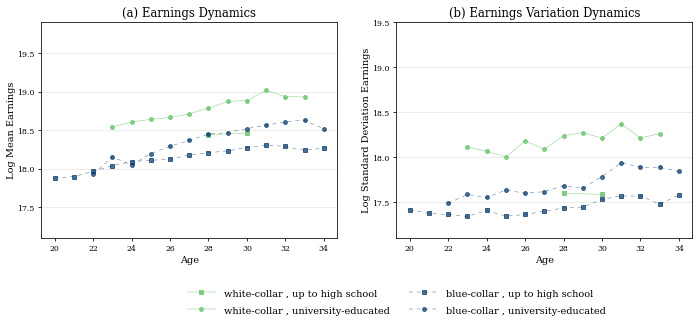

In [50]:
## English ##
#####################################################
wageMoment["logDev"]= np.log(wageMoment.deviation)
label={0:"white-collar",1:"blue-collar",2:"conscription"}
labelEduc={1:", university-educated",0:", up to high school"}

fSize = 10

fig= plt.figure(figsize=(12,4))
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
ax1=fig.add_subplot(1,2,2)

for educated in [0,1]:
    ax1.plot("age","logDev"
            ,dashes=[8, 0] #if educated ==1 else [1,0]
            ,data=wageMoment.loc[(wageMoment.collar==0)
                                 &(wageMoment.educated==educated)
                                 &(wageMoment.age>=20),:]
            ,marker=marker[educated]
            ,label=f"white-collar {labelEduc[educated]}"
            ,markersize=4
            ,color= (0.5,0.8,0.5,1)
            ,linewidth= 0.5
            )
for educated in [0,1]:
    line1=ax1.plot("age","logDev"
            ,dashes=[8, 8] #if educated ==0 else [1,0]
            ,data=wageMoment.loc[(wageMoment.collar==1)
                                 &(wageMoment.educated==educated)
                                 &(wageMoment.age>=20),:]
            ,marker=marker[educated]
            ,label=f"blue-collar {labelEduc[educated]}"
            ,markersize=4
            ,color=(0,0.2,0.4,0.7)
            ,linewidth= 0.5
                  )
ax1.set_xlabel('Age',                        fontsize=fSize,labelpad=3)
ax1.set_ylabel('Log Standard Deviation Earnings',fontsize=fSize,labelpad=1)
# ax1.set_xticks(np.arange(20,35,2))
# ax1.set_xticklabels([age for age in np.arange(20,35,2).astype(np.int)])

ax1.grid(axis='y',alpha=0.3)
ax1.set_ylim(17.1,19.5)
ax1.set_title("(b) Earnings Variation Dynamics")  




ax2=fig.add_subplot(1,2,1)

for educated in [0,1]:
    ax2.plot("age","logIncome"
            ,dashes=[8, 0] #if educated ==1 else [1,0]
            ,data=wageMoment.loc[(wageMoment.collar==0)
                                 &(wageMoment.educated==educated)
                                 &(wageMoment.age>=20),:]
            ,marker=marker[educated]
            ,label=f"white-collar {labelEduc[educated]}"
            ,markersize=4
            ,color= (0.5,0.8,0.5,1)
            ,linewidth= 0.5
            )
for educated in [0,1]:
    line1=ax2.plot("age","logIncome"
            ,dashes=[8, 8] #if educated ==0 else [1,0]
            ,data=wageMoment.loc[(wageMoment.collar==1)
                                 &(wageMoment.educated==educated)
                                 &(wageMoment.age>=20),:]
            ,marker=marker[educated]
            ,label=f"blue-collar {labelEduc[educated]}"
            ,markersize=4
            ,color=(0,0.2,0.4,0.7)
            ,linewidth= 0.5
            )
ax2.set_xlabel('Age',         fontsize=fSize,labelpad=3)
ax2.set_ylabel('Log Mean Earnings',fontsize=fSize,labelpad=1)
# ax2.set_xticks(np.arange(20,35,2))
# ax2.set_xticklabels([age for age in np.arange(20,35,2).astype(np.int)])

ax2.grid(axis='y',alpha=0.3)
ax1.legend(loc="upper center",bbox_to_anchor=(-0, -0.19),edgecolor="w", prop={"size":fSize},ncol=2,handlelength=3,handleheight=1.5)
ax2.set_ylim(17.1,19.9)
ax2.set_title("(a) Earnings Dynamics")  
    
plt.show()
# fig.savefig(f"Results/Paper/income together.pdf", bbox_inches='tight')

## The SMM weighting matrix (bootstrap the sample)

In [51]:
sample.reset_index(inplace=True,drop=True)

In [52]:
wageSize=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','educated','collar']).agg({
        'equivalentIncome': "count"}).reset_index() 
wageSize.rename(columns={"equivalentIncome":"tedad"},inplace=True)

wageMoment=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','educated','collar']).agg({
        'equivalentIncome':wm}).reset_index() 

wageMoment = pd.merge(wageMoment,wageSize,on=["age","educated","collar"],how="left")
del wageSize

wageMoment = wageMoment.loc[(wageMoment.tedad>80),:]
wageMoment['income']= wageMoment.equivalentIncome#* 40 / wageMoment.totalHour['<lambda>']

wageMoment = wageMoment.loc[:,["age","educated","collar","income"]]

wageDev=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
              &(sample.age<65)
        ,:].groupby(by=['age','educated','collar']).agg({
         "equivalentIncome":wmDev}).reset_index() 
# wageDev["equivalentIncome"] = np.sqrt(wageDev.equivalentIncome)
wageDev.rename(columns={"equivalentIncome":"deviation"},inplace=True)

wageMoment = pd.merge(wageMoment, wageDev,on=["age","educated","collar"],how="left")


# wageMoment.to_csv(r"C:\Users\claudioq\Dropbox\Labor\Codes\Moments\wageMoment2.csv",
#                   index=False,header=False)
wageMoment

,age,educated,collar,income,deviation
0,16.000,0.000,1.000,36476312.000,27590032.107
1,17.000,0.000,1.000,40949788.000,29401415.541
2,18.000,0.000,1.000,46582980.000,31562787.332
3,19.000,0.000,1.000,52111660.000,33994620.661
4,20.000,0.000,1.000,57937288.000,36548925.424
5,21.000,0.000,1.000,59113424.000,34993092.414
6,22.000,0.000,1.000,63327996.000,34616253.465
7,22.000,1.000,1.000,60902592.000,39179716.288
8,23.000,0.000,1.000,68056504.000,33856787.751
9,23.000,1.000,0.000,112657048.000,73134733.224


In [400]:
# %%time
for num_boots in np.arange(1,300):
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.8)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]


    wageMomentBoot=bootstrapSample.loc[(bootstrapSample.collar!=2)
                  &(bootstrapSample.equivalentIncome.notna())
            ,:].groupby(by=['age','educated','collar']).agg({
            'equivalentIncome':wm}).reset_index() 

    wageMomentBoot.columns = ["age","educated","collar",f"incomeBoot{num_boots}"]

    wageMoment = pd.merge(wageMoment,wageMomentBoot,on=["age","educated","collar"],how="left")
    

#= calculating the variance of the bootstrapped data
colnames=wageMoment.filter(regex=re.compile("incomeBoot", re.IGNORECASE)).columns
wageMoment["incomeVarBootStrap"] = np.sqrt(wageMoment[colnames].var(axis=1))

# specifying the outputs
wageMoment = wageMoment.loc[:,["age","educated","collar","income","incomeVarBootStrap","deviation"]]
wageMoment;

In [401]:
# %%time
for num_boots in np.arange(1,300):
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.8)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]


    wageMomentBoot=bootstrapSample.loc[(bootstrapSample.collar!=2)
                  &(bootstrapSample.equivalentIncome.notna())
            ,:].groupby(by=['age','educated','collar']).agg({
            'equivalentIncome':wmDev}).reset_index() 

    wageMomentBoot.columns = ["age","educated","collar",f"deviationBoot{num_boots}"]

    wageMoment = pd.merge(wageMoment,wageMomentBoot,on=["age","educated","collar"],how="left")
    

#= calculating the variance of the bootstrapped data
colnames=wageMoment.filter(regex=re.compile("deviationBoot", re.IGNORECASE)).columns
wageMoment["deviationVarBootStrap"] = np.sqrt(wageMoment[colnames].var(axis=1))

# specifying the outputs
wageMoment = wageMoment.loc[:,["age","educated","collar","income","incomeVarBootStrap","deviation","deviationVarBootStrap"]]
wageMoment.head()

,age,educated,collar,income,incomeVarBootStrap,deviation,deviationVarBootStrap
0,16.000,0.000,1.000,36353956.000,1782364.875,27592540.000,3405292.250
1,17.000,0.000,1.000,40945152.000,1166590.375,29427974.000,1289767.875
2,18.000,0.000,1.000,46692956.000,997464.938,31552082.000,1379383.250
3,19.000,0.000,1.000,52184948.000,1060888.250,34016068.000,1296870.500
4,20.000,0.000,1.000,57880056.000,888211.250,36208404.000,1733890.500


In [403]:
wageMoment.to_csv("/home/sabouri/Dropbox/Labor/Codes/Moments/wageMomentStdBoot.csv",header=None,index=False)

In [402]:
wageMoment

,age,educated,collar,income,incomeVarBootStrap,deviation,deviationVarBootStrap
0,16.000,0.000,1.000,36353956.000,1782364.875,27592540.000,3405292.250
1,17.000,0.000,1.000,40945152.000,1166590.375,29427974.000,1289767.875
2,18.000,0.000,1.000,46692956.000,997464.938,31552082.000,1379383.250
3,19.000,0.000,1.000,52184948.000,1060888.250,34016068.000,1296870.500
4,20.000,0.000,1.000,57880056.000,888211.250,36208404.000,1733890.500
...,...,...,...,...,...,...,...
120,51.000,0.000,1.000,93820208.000,2340818.000,45826348.000,3059289.000
121,51.000,1.000,0.000,274749632.000,12843506.000,111616944.000,12773467.000
122,52.000,0.000,1.000,95204760.000,3434264.000,49182608.000,3921309.750
123,52.000,1.000,0.000,301386016.000,17767960.000,126769704.000,14409020.000


### wageMoment: from HEIS by collar only

In [53]:
sample.reset_index(inplace=True,drop=True)

In [54]:
wageSize=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','collar']).agg({
        'equivalentIncome': "count"}).reset_index() 
wageSize.rename(columns={"equivalentIncome":"tedad"},inplace=True)

wageMoment=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
        ,:].groupby(by=['age','collar']).agg({
        'equivalentIncome':wm}).reset_index() 

wageMoment = pd.merge(wageMoment,wageSize,on=["age","collar"],how="left")
del wageSize

wageMoment = wageMoment.loc[(wageMoment.tedad>80),:]
wageMoment['income']= wageMoment.equivalentIncome#* 40 / wageMoment.totalHour['<lambda>']

wageMoment = wageMoment.loc[:,["age","collar","income"]]

wageDev=sample.loc[(sample.collar!=2)
              &(sample.equivalentIncome.notna())
              &(sample.age<65)
        ,:].groupby(by=['age','collar']).agg({
         "equivalentIncome":wmDev}).reset_index() 
wageDev.rename(columns={"equivalentIncome":"deviation"},inplace=True)

wageMoment = pd.merge(wageMoment, wageDev,on=["age","collar"],how="left")


# wageMoment

In [55]:
# %%time
for num_boots in np.arange(1,200):
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.6)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]


    wageMomentBoot=bootstrapSample.loc[(bootstrapSample.collar!=2)
                  &(bootstrapSample.equivalentIncome.notna())
            ,:].groupby(by=['age','collar']).agg({
            'equivalentIncome':wm}).reset_index() 

    wageMomentBoot.columns = ["age","collar",f"incomeBoot{num_boots}"]

    wageMoment = pd.merge(wageMoment,wageMomentBoot,on=["age","collar"],how="left")
    

#= calculating the variance of the bootstrapped data
colnames=wageMoment.filter(regex=re.compile("incomeBoot", re.IGNORECASE)).columns
wageMoment["incomeVarBootStrap"] = np.sqrt(wageMoment[colnames].var(axis=1))

# specifying the outputs
wageMoment = wageMoment.loc[:,["age","collar","income","incomeVarBootStrap","deviation"]]
wageMoment;

In [56]:
# %%time
for num_boots in np.arange(1,200):
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.6)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]


    wageMomentBoot=bootstrapSample.loc[(bootstrapSample.collar!=2)
                  &(bootstrapSample.equivalentIncome.notna())
            ,:].groupby(by=['age','collar']).agg({
            'equivalentIncome':wmDev}).reset_index() 

    wageMomentBoot.columns = ["age","collar",f"deviationBoot{num_boots}"]

    wageMoment = pd.merge(wageMoment,wageMomentBoot,on=["age","collar"],how="left")
    

#= calculating the variance of the bootstrapped data
colnames=wageMoment.filter(regex=re.compile("deviationBoot", re.IGNORECASE)).columns
wageMoment["deviationVarBootStrap"] = np.sqrt(wageMoment[colnames].var(axis=1))

# specifying the outputs
wageMoment = wageMoment.loc[:,["age","collar","income","incomeVarBootStrap","deviation","deviationVarBootStrap"]]
wageMoment.head()

,age,collar,income,incomeVarBootStrap,deviation,deviationVarBootStrap
0,16.000,1.000,36476312.000,2081390.956,27590032.107,2339829.393
1,17.000,1.000,40954436.000,1336483.411,29382751.284,1419353.581
2,18.000,1.000,46494068.000,1247756.445,31553010.603,1077603.148
3,19.000,1.000,52087016.000,1144104.006,34050909.021,1548734.712
4,20.000,1.000,57897252.000,1008240.585,36872880.879,2002905.773


In [57]:
wageMoment.to_csv("../Moments/wageMomentStdBootByCollarOnly.csv",header=None,index=False)

### ChoiceMoment: from HEIS

In [538]:
choiceMoment=sample[(sample.age>=22)].groupby(by=(["age","educated"])).agg( 
            {'choice':'count','home':"mean",'study':"mean",'unemployed':"mean"
             ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
choiceMoment= choiceMoment[choiceMoment.choice>100]

choiceMoment2=data[(data.age<22)
          &(data.birth_y.isin(cohort))
          &(data.gender==1)].groupby(by=(["age"])).agg( 
            {'choice':'count','home':"mean",'study':"mean",'unemployed':"mean"
             ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
choiceMoment2= choiceMoment2[choiceMoment2.choice>100]
choiceMoment2["educated"] = -1

choiceMoment = pd.concat([choiceMoment2,choiceMoment])
del choiceMoment2

choiceMoment["home"] = choiceMoment.home+choiceMoment.unemployed



choiceMoment = choiceMoment.loc[:,["age","educated","home","study","white","blue","military"]]
choiceMoment.head()

,age,educated,home,study,white,blue,military
0,16.000,-1.000,0.077,0.666,0.001,0.256,0.000
1,17.000,-1.000,0.117,0.556,0.002,0.324,0.000
2,18.000,-1.000,0.183,0.382,0.007,0.424,0.003
3,19.000,-1.000,0.213,0.309,0.012,0.444,0.023
4,20.000,-1.000,0.212,0.271,0.015,0.446,0.057


In [539]:
%%time
for num_boots in np.arange(1,300):
    
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.8)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]

    
    
    
    choiceMomentBoot=bootstrapSample[(bootstrapSample.age>=22)].groupby(by=(["age","educated"])).agg( 
                {'home':"mean",'study':"mean",'unemployed':"mean"
                 ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()

    choiceMoment2=bootstrapSample[(bootstrapSample.age<22)
              ].groupby(by=(["age"])).agg( 
                {'home':"mean",'study':"mean",'unemployed':"mean"
                 ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
    choiceMoment2["educated"] = -1

    choiceMomentBoot = pd.concat([choiceMoment2,choiceMomentBoot])
    del choiceMoment2

    choiceMomentBoot["home"] = choiceMomentBoot.home+choiceMomentBoot.unemployed

    choiceMomentBoot = choiceMomentBoot.loc[:,["age","educated","home","study","white","blue","military"]]
    

    choiceMomentBoot.columns = ["age","educated",f"homeBoot{num_boots}",f"studyBoot{num_boots}",
                                f"whiteBoot{num_boots}",f"blueBoot{num_boots}",f"militaryBoot{num_boots}"]

    choiceMoment = pd.merge(choiceMoment,choiceMomentBoot,on=["age","educated"],how="left")
    



CPU times: user 18.4 s, sys: 0 ns, total: 18.4 s
Wall time: 18.4 s


In [540]:
choiceMoment.head()

,age,educated,home,study,white,blue,military,homeBoot1,studyBoot1,whiteBoot1,...,homeBoot298,studyBoot298,whiteBoot298,blueBoot298,militaryBoot298,homeBoot299,studyBoot299,whiteBoot299,blueBoot299,militaryBoot299
0,16.000,-1.000,0.077,0.666,0.001,0.256,0.000,0.081,0.651,0.002,...,0.078,0.677,0.001,0.243,0.000,0.077,0.673,0.001,0.248,0.000
1,17.000,-1.000,0.117,0.556,0.002,0.324,0.000,0.113,0.553,0.002,...,0.115,0.551,0.003,0.331,0.000,0.125,0.550,0.002,0.323,0.000
2,18.000,-1.000,0.183,0.382,0.007,0.424,0.003,0.179,0.376,0.007,...,0.189,0.374,0.009,0.424,0.004,0.191,0.373,0.008,0.423,0.004
3,19.000,-1.000,0.213,0.309,0.012,0.444,0.023,0.222,0.299,0.014,...,0.221,0.305,0.010,0.439,0.024,0.219,0.313,0.010,0.433,0.025
4,20.000,-1.000,0.212,0.271,0.015,0.446,0.057,0.211,0.270,0.015,...,0.210,0.273,0.015,0.442,0.060,0.216,0.278,0.014,0.438,0.054


In [541]:
# alt = "home"
for alt in ["home","study","white","blue","military"]:
    #= calculating the variance of the bootstrapped data
    colnames=choiceMoment.filter(regex=re.compile(f"{alt}Boot", re.IGNORECASE)).columns
    choiceMoment[f"{alt}VarBootStrap"] = np.sqrt(choiceMoment[colnames].var(axis=1))

# specifying the outputs
choiceMoment = choiceMoment.loc[:,[
    "age","educated"
    ,"home","study","white","blue","military"
    ,f"homeVarBootStrap",f"studyVarBootStrap",f"whiteVarBootStrap",f"blueVarBootStrap",f"militaryVarBootStrap"]]
choiceMoment.head()

,age,educated,home,study,white,blue,military,homeVarBootStrap,studyVarBootStrap,whiteVarBootStrap,blueVarBootStrap,militaryVarBootStrap
0,16.000,-1.000,0.077,0.666,0.001,0.256,0.000,0.003,0.011,0.000,0.006,0.000
1,17.000,-1.000,0.117,0.556,0.002,0.324,0.000,0.003,0.009,0.001,0.008,0.000
2,18.000,-1.000,0.183,0.382,0.007,0.424,0.003,0.005,0.007,0.001,0.008,0.001
3,19.000,-1.000,0.213,0.309,0.012,0.444,0.023,0.006,0.007,0.001,0.007,0.002
4,20.000,-1.000,0.212,0.271,0.015,0.446,0.057,0.006,0.007,0.002,0.007,0.003


In [542]:
# choiceMoment.head()
choiceMoment.to_csv("/home/sabouri/Dropbox/Labor/Codes/Moments/choiceMomentStdBoot.csv",header=None,index=False)

In [543]:
educatedShare = sample[(sample.age>=24)
       &(sample.age<=32)].groupby(["age"]).agg({"educated":"mean"}).reset_index()
educatedShare

,age,educated
0,24.000,0.262
1,25.000,0.268
2,26.000,0.276
3,27.000,0.273
4,28.000,0.267
5,29.000,0.260
6,30.000,0.255
7,31.000,0.262
8,32.000,0.239


In [544]:
%%time
for num_boots in np.arange(1,500):
    
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.8)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]

    educatedShareBoot = bootstrapSample[(bootstrapSample.age>=24)
       &(bootstrapSample.age<=32)].groupby(["age"]).agg({"educated":"mean"}).reset_index()
    
    
    educatedShareBoot.columns = ["age",f"educatedBoot{num_boots}"]

    educatedShare = pd.merge(educatedShare,educatedShareBoot,on=["age"],how="left")
    



CPU times: user 25.9 s, sys: 26.4 ms, total: 25.9 s
Wall time: 26 s


In [545]:
educatedShare = educatedShare.dropna(axis=1)

# alt = "home"
for alt in ["educated"]:
    #= calculating the variance of the bootstrapped data
    colnames=educatedShare.filter(regex=re.compile(f"{alt}Boot", re.IGNORECASE)).columns
    educatedShare[f"{alt}VarBootStrap"] = np.sqrt(educatedShare[colnames].var(axis=1))

# specifying the outputs
educatedShare = educatedShare.loc[:,[
    "age","educated","educatedVarBootStrap"]]
educatedShare.head()

educatedShare.to_csv("/home/sabouri/Dropbox/Labor/Codes/Moments/educatedShareStdBoot.csv",header=None,index=False)

## lower and upper bound

In [316]:
sample.reset_index(drop=True,inplace=True)

for num_boots in np.arange(1,800):
    
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.75)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]
    
    choiceMoment=bootstrapSample.groupby(by=(["age"])).agg( 
                {'home':"mean",'study':"mean",'unemployed':"mean"
                 ,'blue':"mean",'white':"mean",'military':"mean"}).reset_index()
    choiceMoment["home"] = choiceMoment.home+choiceMoment.unemployed
    choiceMoment = choiceMoment.loc[:,["age","home","study","white","blue","military"]]
    
    if num_boots == 1:
        choiceMomentData = choiceMoment
    else:
        choiceMomentData = pd.concat([choiceMomentData,choiceMoment],axis=0)



choiceMomentData.rename(columns={"military":"mil"},inplace=True)
choiceMomentData.reset_index(inplace=True,drop=True)
choiceMomentData

,age,home,study,white,blue,mil
0,16.000,0.079,0.662,0.002,0.258,0.000
1,17.000,0.114,0.550,0.003,0.333,0.000
2,18.000,0.180,0.383,0.006,0.427,0.005
3,19.000,0.211,0.321,0.011,0.428,0.029
4,20.000,0.221,0.257,0.014,0.440,0.067
...,...,...,...,...,...,...
23166,40.000,0.068,0.001,0.139,0.787,0.005
23167,41.000,0.050,0.002,0.157,0.782,0.009
23168,42.000,0.055,0.001,0.160,0.777,0.007
23169,43.000,0.052,0.005,0.173,0.766,0.004


In [317]:
# std = choiceMomentData.groupby(["age"]).agg({'home':"std",'study':"std",'blue':"std",'white':"std",'mil':"std"}).reset_index() #.quantile([0.1])
# std

# MAX = choiceMomentData + 3* std
# MAX["age"] = choiceMomentData.age

# MIN = choiceMomentData - 3* std
# MIN["age"] = choiceMomentData.age

In [318]:
MAX = choiceMomentData.groupby(["age"]).agg({'home':"max",'study':"max",'blue':"max",'white':"max",'mil':"max"}).reset_index() #.quantile([0.1])
MIN = choiceMomentData.groupby(["age"]).agg({'home':"min",'study':"min",'blue':"min",'white':"min",'mil':"min"}).reset_index() #.quantile([0.1])
choiceMomentData = choiceMomentData.groupby(["age"]).agg({'home':"mean",'study':"mean",'blue':"mean",'white':"mean",'mil':"mean"}).reset_index() 

In [373]:
for num_boots in np.arange(1,500):
    
    sampleSize = sample.shape[0]
    bootstrapSize = round(sampleSize*0.75)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    bootstrapSample = sample.loc[bootstrapIndex,:]
    
    wageMoment = bootstrapSample[(bootstrapSample.collar!=2)
           &(bootstrapSample.equivalentIncome.notna())
          ].groupby(by=['age','collar']).agg({
            'equivalentIncome':wm}).reset_index() 
    
    if num_boots == 1:
        wageMomentData = wageMoment
    else:
        wageMomentData = pd.concat([wageMomentData,wageMoment],axis=0)
        
wageMomentData.rename(columns={"equivalentIncome":"income"},inplace=True)

In [374]:
wageMomentData

,age,collar,income
0,16.000,0.000,nan
1,16.000,1.000,35945416.000
2,16.000,2.000,nan
3,17.000,0.000,nan
4,17.000,1.000,39721308.000
...,...,...,...
109,52.000,1.000,95207248.000
110,52.000,2.000,nan
111,53.000,0.000,263139536.000
112,53.000,1.000,86056024.000


In [375]:
MAXI = wageMomentData.groupby(["age","collar"]).agg({'income':"max"}).reset_index() #.quantile([0.1])
MINI = wageMomentData.groupby(["age","collar"]).agg({'income':"min"}).reset_index() #.quantile([0.1])
wageMomentData = wageMomentData.groupby(["age","collar"]).agg({'income':"mean"}).reset_index() 
MAXI["logIncome"] = np.log(MAXI.income)
MINI["logIncome"] = np.log(MINI.income)

# Result of julia code estimation

In [2]:
#Importing required libraries
import pyodbc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import glob
# import pyreadr
import re

import warnings # this will avoid showing warning in notebook
warnings.filterwarnings('ignore')

# set display format of dataframe
pd.options.display.float_format = '{:.3f}'.format
marker=['s','o','^','D','*','p', '+']
genderCode={'male':1, 'female':0}
collarCode={'white':0,'blue':1,'military':2}

# !pip install python-bidi
# !pip install arabic_reshaper
# from bidi.algorithm import get_display
# import arabic_reshaper

# def farsi(x):
#     reshaped_text = arabic_reshaper.reshape(x)
#     farsi_text = get_display(reshaped_text)
#     return farsi_text


%matplotlib inline

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 100
from matplotlib.ticker import FuncFormatter


# Step 2: Set global parameters to mimic Stata's default aesthetics
plt.rcParams['figure.figsize'] = (5.5, 4)  # Stata's default figure size (in inches)
plt.rcParams['font.size'] = 10  # Default font size in Stata graphs
plt.rcParams['axes.labelsize'] = 10  # Axis label font size
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['xtick.labelsize'] = 8  # X-axis tick label size
plt.rcParams['ytick.labelsize'] = 8  # Y-axis tick label size
plt.rcParams['lines.linewidth'] = 1.5  # Line width
# plt.rcParams['grid.linestyle'] = '-'  # Grid line style (dashed line)
# plt.rcParams['grid.alpha'] = 0.3  # Grid line transparency

# Function to convert y-axis values to percentages
def to_percent(y, position):
    return f"{100 * y:.0f}"  # Multiply by 100 and format as an integer percentage

plt.rcParams['font.family'] = 'Book Antiqua'

In [3]:
sim = pd.read_csv(r"../data/simulation/simNewTest.csv", header=None)


sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 

# sim = sim.loc[(sim.x5.isna()),:]

sim["id"] = sim.index // 50

sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)
sim["log_lifetime_income"] = np.log(sim.lifetime_income)

choiceMomentSim =sim.groupby(["age"])["choice"].value_counts(normalize=True).unstack().reset_index()
choiceMomentSim.fillna(0,inplace=True)
choiceMomentSim.columns = ["age","home","study","white","blue","mil"]

# choiceMomentLFS.head(7)
# choiceMomentLFS.sum()
# choiceMomentSim.head(7)


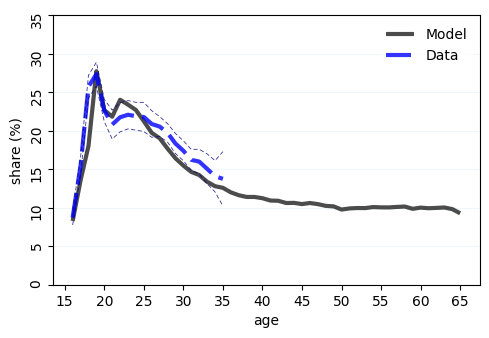

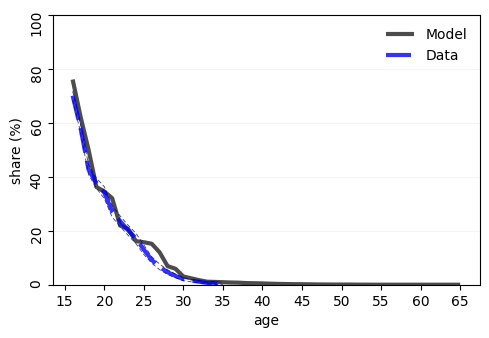

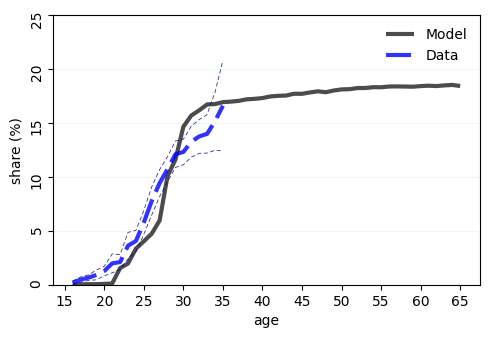

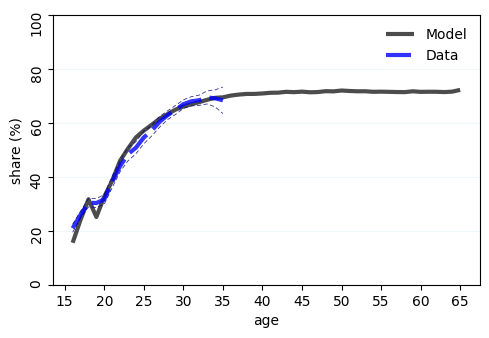

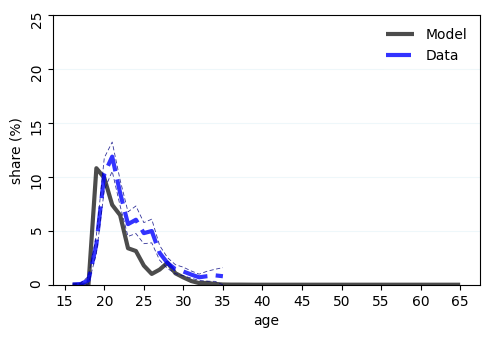

In [4]:
choiceMomentLFS = pd.read_csv(r"../data/moments/choiceMomentLFS.csv",header=None,delimiter=" ")
choiceMomentLFS.columns = ["age","home","study","white","blue","mil","homeSTD","studySTD","whiteSTD","blueSTD","milSTD"]
choiceMomentLFS

for ind,alter in enumerate(["home","study","white","blue","mil"]):
    choiceMomentLFS[f"{alter}High"] = choiceMomentLFS[f"{alter}"] + 3 * choiceMomentLFS[f"{alter}STD"]
    choiceMomentLFS[f"{alter}Low"] = choiceMomentLFS[f"{alter}"] - 3 * choiceMomentLFS[f"{alter}STD"]
    



ageMax = 65
ameMaxData = 50

alternative = [
     "(a) stay home"
    ,"(b) studying"
    ,"(c) white-collar occupation"
    ,"(d) blue-collar occupation"
    ,"(e) compulsory military service"
]

fSize = 12
tSize = 8

ind = 0

for ind,alter in enumerate(["home","study","white","blue","mil"]):
    fig= plt.figure(figsize=(5.5,3.5))
    plt.rc('font', family='sans')
    plt.rc('xtick',labelsize=tSize+2)
    plt.rc('ytick',labelsize=tSize+2)
    ax1=fig.add_subplot(1,1,1)
    ax1.plot("age", alter
            ,dashes= [6,0]
            ,data=choiceMomentSim.loc[(choiceMomentSim.age<=ageMax), :]
            ,label= "Model" #f"share of {alternative[ind]} in the model"
            ,markersize=2 ,linewidth= 3, alpha=0.7
            ,color= "black" #(0.0,0.0,0.0,0.8) 
            )

    ax1.plot("age", alter
            ,dashes= [6,2]
            ,data=choiceMomentLFS.loc[(choiceMomentLFS.age<=ameMaxData), :]
            ,label= "Data" #f"share of {alternative[ind]} in the data"
            ,markersize=2 ,linewidth= 3 , alpha=0.8
            ,color= "blue" #(0.1,0.0,0.9,0.5)#(0,0.2,0.4,0.7)
               )
    
#     ax1.plot("age", alter
#         ,dashes= [2,2]
#         ,data=LFS_share.loc[(LFS_share.age<=ameMaxData), :]
#         ,label= "Data LFS" #f"share of {alternative[ind]} in the data"
#         ,markersize=2
#         ,color= "brown"#(0.0,0.0,0.0,0.5)#(0,0.2,0.4,0.7)
#         ,linewidth= 1.3
#            )
#     ax1.fill_between(MIN.age,MIN[f"{alter}"],MAX[f"{alter}"])

    ax1.plot("age", f"{alter}High"
        ,dashes= [5,3]
        ,data=choiceMomentLFS.loc[(choiceMomentLFS.age<=ameMaxData), :]
        ,label= "" #"Upper and Lower bound"
        ,markersize=2 ,linewidth= 0.6, alpha=0.8
        ,color= "navy" )
    ax1.plot("age", f"{alter}Low"
        ,dashes= [5,3]
        ,data=choiceMomentLFS.loc[(choiceMomentLFS.age<=ameMaxData), :]
        ,label= "" #f"share of {alternative[ind]} in the data"
        ,markersize=2 ,linewidth= 0.6 , alpha=0.8
        ,color= "navy" # (0.0,0.0,0.0,0.6) 
        )
        
    lim_y = [0.35, 1, 0.25, 1, 0.25]
    ax1.set_ylim(0,lim_y[ind])
    
    
    # ax1.set_title(alternative[ind])
    ax1.set_xlabel("age")
    ax1.set_ylabel("share (%)")
    ax1.set_xticks(np.arange(15,ageMax+1,5))
#     ax1.set_xticklabels([age for age in np.arange(15,ageMax+1,5).astype(np.int)] )
    ax1.grid(axis='y', color="lightblue", alpha=0.2)
    ax1.legend(loc="best",edgecolor="w", ncol=1)
    # Hide the right and top spines
    # ax1.spines['right'].set_visible(False)
    # ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_tick_params(labelrotation=90)

    # Set the formatter for the y-axis to display percentages
    formatter = FuncFormatter(to_percent)
    ax1.yaxis.set_major_formatter(formatter)
    
    # fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/1{alter}.pdf", bbox_inches='tight')
    
    plt.show()
    ;

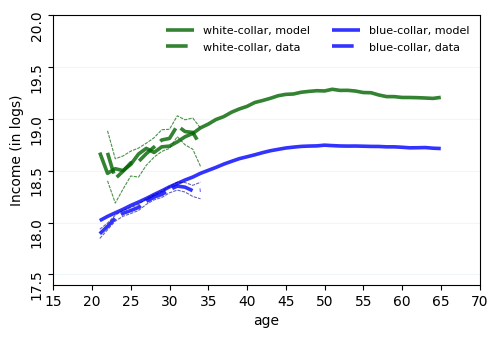

In [5]:

wageMomentData= pd.read_csv("../data/moments/wageMomentStdBootByCollarOnly.csv",header=None)

wageMomentData.columns = ["age","collar","income","incomeVarBootStrap","deviation","deviationVarBootStrap"]

wageMomentData;



wageMomentData["logIncome"]= np.log(wageMomentData.income)
wageMomentData["logIncomeHigh"]= np.log(wageMomentData.income+2.576*wageMomentData.incomeVarBootStrap)
wageMomentData["logIncomeLow"]= np.log(wageMomentData.income- 2.576*wageMomentData.incomeVarBootStrap)




wageMomentSim =sim.loc[(sim.choice.isin([3,4]))&(sim.type.isin([1,2,3])), :].groupby(["age","choice"]).agg({"income":"mean"}).reset_index() 
wageMomentSim["collar"]=wageMomentSim.choice.map({3:0,4:1})
wageMomentSim["logIncome"]= np.log(wageMomentSim.income)
wageMomentSim ;


ageMax = 70

alternative = ["white-collar",
              "blue-collar"]
fSize = 12
tSize = 8
# for collar in [0,1]:
collar = 0
fig= plt.figure(figsize=(5.5,3.5))
plt.rc('font', family='sans')
plt.rc('xtick',labelsize=tSize+2)
plt.rc('ytick',labelsize=tSize+2)
ax1=fig.add_subplot(1,1,1)
ax1.plot("age", "logIncome"
        ,dashes= [6,0]
        ,data=wageMomentSim.loc[(wageMomentSim.collar==collar)&(wageMomentSim.age>=21)&(wageMomentSim.age<=ageMax), :]
        ,label= alternative[collar] + ", model"
        ,markersize=3
        ,color= "darkgreen", alpha=0.8 ,linewidth= 2.6)

ax1.plot("age", "logIncome"
        ,dashes= [6,2]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= alternative[collar] + ", data"
        ,markersize=3
        ,color= "darkgreen", alpha=0.8 ,linewidth= 2.6)

ax1.plot("age", "logIncomeLow"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 0.8)

ax1.plot("age", "logIncomeHigh"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 0.8)

collar = 1
ax1.plot("age", "logIncome"
        ,dashes= [6,0]
        ,data=wageMomentSim.loc[(wageMomentSim.collar==collar)&(wageMomentSim.age<=ageMax)&(wageMomentSim.age>=21), :]
        ,label= alternative[collar] + ", model"
        ,markersize=3
        ,color= "blue", alpha=0.8 ,linewidth= 2.6)

ax1.plot("age", "logIncome"
        ,dashes= [6,2]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax)&(wageMomentData.age>=21), :]
        ,label= alternative[collar] + ", data"
        ,markersize=3
        ,color= "blue", alpha=0.8 ,linewidth= 2.6
           )

ax1.plot("age", "logIncomeLow"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "navy", alpha=0.6,linewidth= 0.8)

ax1.plot("age", "logIncomeHigh"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "navy", alpha=0.6 ,linewidth= 0.8)

ax1.set_ylim(17.4,20)
# ax1.set_title("(f) average earnings trend by occupation",fontsize=14)

ax1.set_xlabel("age")
ax1.set_ylabel("Income (in logs)")
ax1.set_xticks(np.arange(15,ageMax+1,5))
ax1.set_xticklabels([age for age in np.arange(15,ageMax+1,5)])

ax1.grid(axis='y',alpha=0.2, color="lightblue")
ax1.legend(loc="best",edgecolor="w", prop={"size":fSize-4}, ncol=2,handlelength=2.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.yaxis.set_tick_params(labelrotation=90)
plt.show()
# fig.savefig(f"Results/Paper/2log mean income {ageMax}.pgf", bbox_inches='tight')

# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/logmeanincome65.pdf", bbox_inches='tight')



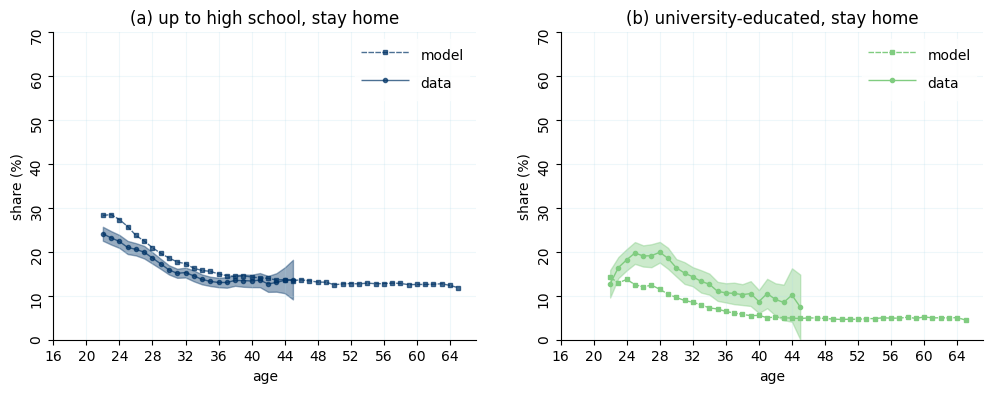

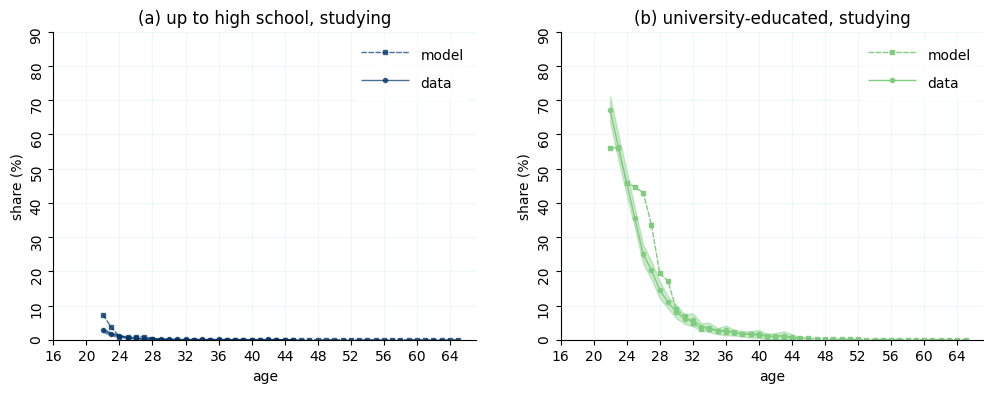

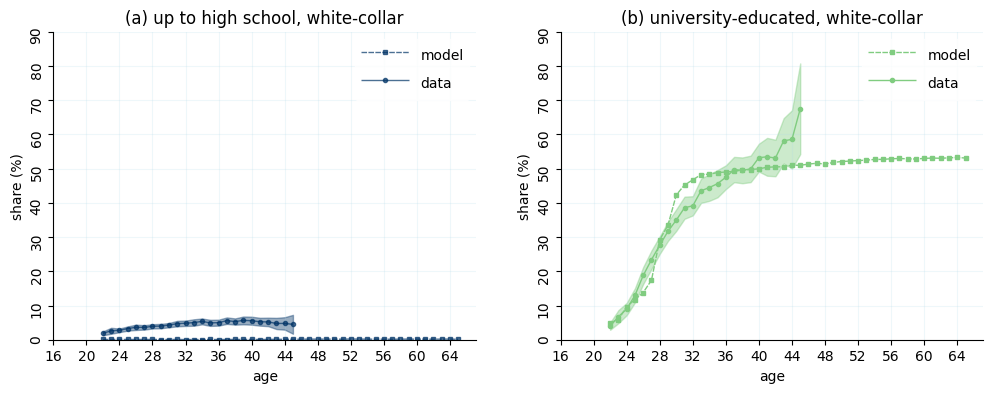

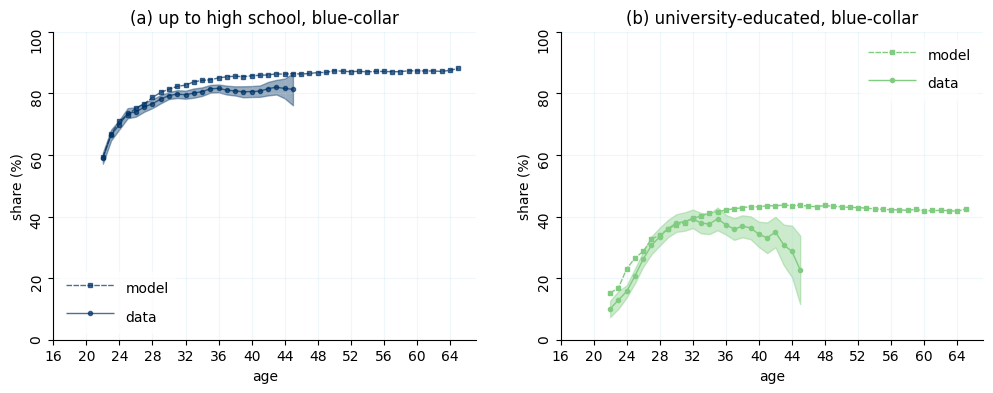

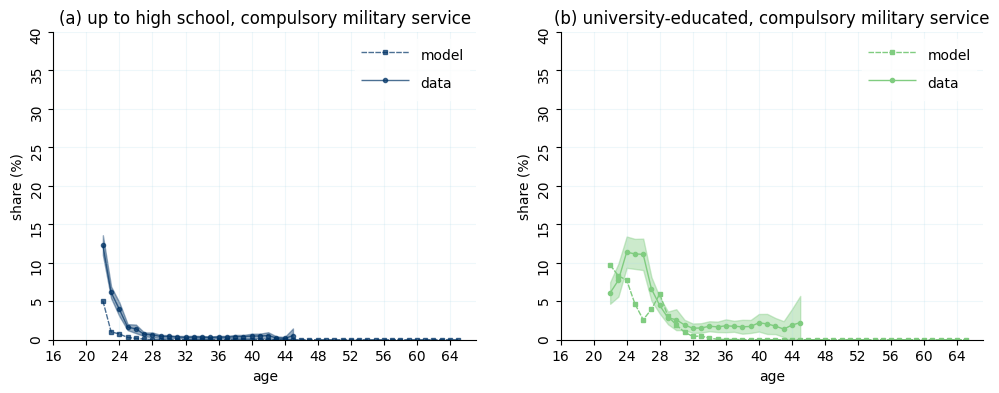

In [7]:
choiceMomentSim = sim.loc[(sim.age>=10),:].groupby(["age","educated"])["choice"].value_counts(normalize=True).unstack().reset_index()
choiceMomentSim.fillna(0,inplace=True)
choiceMomentSim.columns = ["age","educated","home","study","white","blue","mil"]
choiceMomentSim = choiceMomentSim.fillna(0)
choiceMomentSim = choiceMomentSim.loc[(choiceMomentSim.age>=22),:]
choiceMomentSim
;

# try:
#     choiceMomentData= pd.read_csv(r"/home/ehsan/Dropbox/Labor/Codes/Moments/choiceMomentStdBoot.csv",header=None)
# except:
# choiceMomentData= pd.read_csv(r"../Moments/choiceMomentStdBoot.csv",header=None)
choiceMomentData= pd.read_csv(r"../data/moments/choiceMomentSTDLFS.csv",header=None,delimiter=" ")


choiceMomentData.columns = ["age","educated","home","study","white","blue","mil","homeStd","studyStd","whiteStd","blueStd","milStd"]
b = 3
choiceMomentData["homeHigh"] = choiceMomentData.home + b*choiceMomentData.homeStd
choiceMomentData["homeLow"] = choiceMomentData.home - b*choiceMomentData.homeStd

choiceMomentData["studyHigh"] = choiceMomentData.study + b*choiceMomentData.studyStd
choiceMomentData["studyLow"] = choiceMomentData.study - b*choiceMomentData.studyStd

choiceMomentData["whiteHigh"] = choiceMomentData.white + b*choiceMomentData.whiteStd
choiceMomentData["whiteLow"] = choiceMomentData.white - b*choiceMomentData.whiteStd

choiceMomentData["blueHigh"] = choiceMomentData.blue + b*choiceMomentData.blueStd
choiceMomentData["blueLow"] = choiceMomentData.blue - b*choiceMomentData.blueStd

choiceMomentData["milHigh"] = choiceMomentData.mil + b*choiceMomentData.milStd
choiceMomentData["milLow"] = choiceMomentData.mil - b*choiceMomentData.milStd


ageMax = 65

alternative = [
    "stay home"
    ,"studying"
    ,"white-collar"
    ,"blue-collar"
    ,"compulsory military service"
]
educLabel = [
    "non-educated"
    ,"educated"
]
fSize = 12
tSize = 8

ind = 0

for ind,alter in enumerate(["home","study","white","blue","mil"]):
    fig= plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)

#     for educated in [0,1]:
    educated = 0
    ax1.plot("age", alter,"s",markersize=3
            ,dashes= [4,1]
            ,data=choiceMomentSim.loc[(choiceMomentSim.age<=ageMax)&(choiceMomentSim.educated==educated), :]
            ,label= "model"#educLabel[educated]+", model"
            ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
            ,linewidth= 1)

    ax1.plot("age", alter,"o",markersize=3
            ,dashes= [1,0]
            ,data=choiceMomentData.loc[(choiceMomentData.educated==educated),:]
            ,label= "data"#educLabel[educated]+", data"
            ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
            ,linewidth= 1)
    
    ax1.fill_between("age",f"{alter}Low",f"{alter}High"
                    ,data=choiceMomentData.loc[(choiceMomentData.educated==educated),:]
                    ,alpha=0.4
                    ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
                    )
    
    ax1.set_xlabel("age")
    ax1.set_ylabel("share (%)")
    ax1.set_xticks(np.arange(16,ageMax+1,4))
    ax1.set_xticklabels([age for age in np.arange(16,ageMax+1,4)] )

    ax1.grid(axis='both',alpha=0.2, color="lightblue")
    ax1.legend(loc="best",edgecolor="w", prop={"size":fSize-2}, ncol=1,handlelength=3.5,handleheight=2)
    ax1.set_title("(a) up to high school, "+alternative[ind], fontsize=fSize)
    
    educated = 1
    ax2.plot("age", alter,"s",markersize=3
            ,dashes= [4,1]
            ,data=choiceMomentSim.loc[(choiceMomentSim.age<=ageMax)&(choiceMomentSim.educated==educated), :]
            ,label= "model"#educLabel[educated]+", model"
            ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
            ,linewidth= 1)

    ax2.plot("age", alter,"o",markersize=3
            ,dashes= [1,0]
            ,data=choiceMomentData.loc[(choiceMomentData.educated==educated),:]
            ,label= "data"#educLabel[educated]+", data"
            ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
            ,linewidth= 1)
    ax2.fill_between("age",f"{alter}Low",f"{alter}High"
                    ,data=choiceMomentData.loc[(choiceMomentData.educated==educated),:]
                    ,alpha=0.4
                    ,color= (0,0.2,0.4,0.7) if educated==0 else (0.5,0.8,0.5,1)
                    )

    ax2.set_xlabel("age")
    ax2.set_ylabel("share (%)")
    ax2.set_xticks(np.arange(16,ageMax+1,4))
    ax2.set_xticklabels([age for age in np.arange(16,ageMax+1,4)] )

    ax2.grid(axis='both',alpha=0.2, color="lightblue")
    ax2.legend(loc="best",edgecolor="w", prop={"size":fSize-2}, ncol=1,handlelength=3.5,handleheight=2)
    ax2.set_title("(b) university-educated, "+alternative[ind], fontsize=fSize)
    
    high=[0.7,0.9,0.9,1,0.4]
    ax1.set_ylim(0,high[ind])
    ax2.set_ylim(0,high[ind])
    
    
    # Hide the right and top spines
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    ax1.yaxis.set_tick_params(labelrotation=90)
    ax2.yaxis.set_tick_params(labelrotation=90)
    formatter = FuncFormatter(to_percent)
    ax1.yaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)
#     fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/22{alter}.pdf", bbox_inches='tight')
    plt.show()
    ;

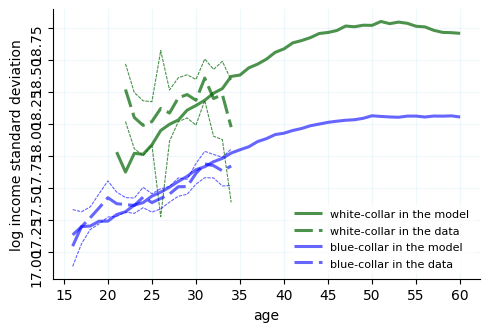

In [103]:

wageMomentData= pd.read_csv("../Moments/wageMomentStdBootByCollarOnly.csv",header=None)
wageMomentData.columns = ["age","collar","income","incomeVarBootStrap","deviation","deviationVarBootStrap"]
wageMomentData;


wageMomentData["logDeviationH"]= (wageMomentData.deviation + 2.576*wageMomentData.deviationVarBootStrap)
wageMomentData["logDeviationHigh"] = np.log(wageMomentData["logDeviationH"])
wageMomentData["logDeviationL"]= (wageMomentData.deviation  - 2.576*wageMomentData.deviationVarBootStrap)
wageMomentData["logDeviationLow"] = np.log(wageMomentData["logDeviationL"])
wageMomentData["logDeviation"]=np.log(wageMomentData.deviation)



wageMomentSim =sim.loc[(sim.choice.isin([3,4])), :].groupby(["age","choice"]).agg({"income":"std"}).reset_index() 
wageMomentSim["collar"]=wageMomentSim.choice.map({3:0,4:1})
wageMomentSim["logIncomeDeviation"]= np.log(wageMomentSim.income)
wageMomentSim ;


ageMax = 60

alternative = ["white-collar",
              "blue-collar"]
fSize = 12
tSize = 8
# for collar in [0,1]:
collar = 0
fig= plt.figure(figsize=(5.5,3.5))
plt.rc('font', family='sans')
plt.rc('xtick',labelsize=tSize+2)
plt.rc('ytick',labelsize=tSize+2)
ax1=fig.add_subplot(1,1,1)
ax1.plot("age", "logIncomeDeviation"
        ,dashes= [6,0]
        ,data=wageMomentSim.loc[(wageMomentSim.collar==collar)&(wageMomentSim.age>=21)&(wageMomentSim.age<=ageMax), :]
        ,label= alternative[collar] + " in the model"
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 2.2)

ax1.plot("age", "logDeviation"
        ,dashes= [6,2]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= alternative[collar] + " in the data"
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 2.2)

ax1.plot("age", "logDeviationLow"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 0.8)

ax1.plot("age", "logDeviationHigh"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age>=21), :]
        ,label= ""
        ,markersize=3
        ,color= "darkgreen", alpha=0.7 ,linewidth= 0.8)

collar = 1
ax1.plot("age", "logIncomeDeviation"
        ,dashes= [6,0]
        ,data=wageMomentSim.loc[(wageMomentSim.collar==collar)&(wageMomentSim.age<=ageMax), :]
        ,label= alternative[collar] + " in the model"
        ,markersize=3
        ,color= "blue", alpha=0.6 ,linewidth= 2.2)

ax1.plot("age", "logDeviation"
        ,dashes= [6,2]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax), :]
        ,label= alternative[collar] + " in the data"
        ,markersize=3
        ,color= "blue", alpha=0.6 ,linewidth= 2.2)

ax1.plot("age", "logDeviationLow"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax), :]
        ,label= ""
        ,markersize=3
        ,color= "blue", alpha=0.6 ,linewidth= 0.8)

ax1.plot("age", "logDeviationHigh"
        ,dashes= [3,1]
        ,data=wageMomentData.loc[(wageMomentData.collar==collar)&(wageMomentData.age<=ageMax), :]
        ,label= ""
        ,markersize=3
        ,color= "blue", alpha=0.6 ,linewidth= 0.8)

# ax1.set_ylim(16.8,19.8)
# ax1.set_title("(f) average earnings trend by occupation",fontsize=14)

ax1.set_xlabel("age")
ax1.set_ylabel("log income standard deviation")
ax1.set_xticks(np.arange(15,ageMax+1,5))
ax1.set_xticklabels([age for age in np.arange(15,ageMax+1,5)])

ax1.grid(axis='both',alpha=0.2, color="lightblue")
ax1.legend(loc="best",edgecolor="w", prop={"size":fSize-4},
           ncol=1,handlelength=2.5,handleheight=1)
# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_tick_params(labelrotation=90)
plt.show()
# fig.savefig(f"Results/Paper/2log mean income {ageMax}.pgf", bbox_inches='tight')

# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/income_log_deviation_fit.pdf", bbox_inches='tight')



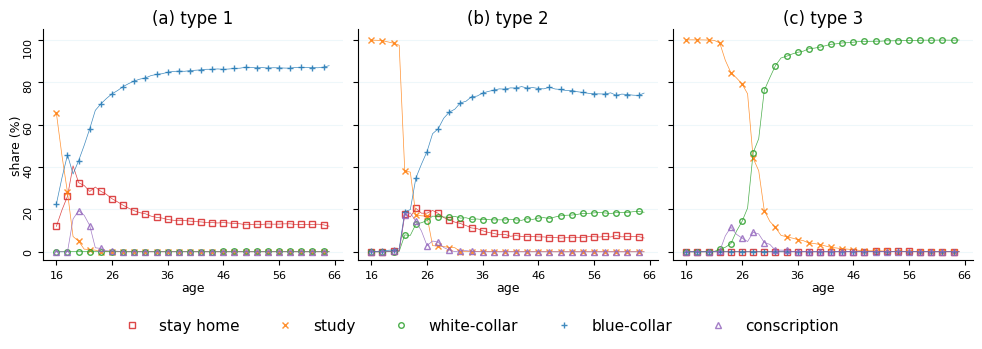

In [104]:
marker = ["s","x", "o", "+", "^"]

color_range= ['#d62728',
 '#ff7f0e',
 '#2ca02c',
 '#1f77b4',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']


fSize = 9
tSize = 6

fig= plt.figure(figsize=(12,3))


# plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize+2)
plt.rc('ytick',labelsize=tSize+2)
for type in range(1,int(sim.type.max())+1):
    choiceMomentSim =sim.loc[(sim.type==type),:].groupby(["age"])["choice"].value_counts(normalize=True).unstack().reset_index()
    choiceMomentSim.fillna(0,inplace=True)
    choiceMomentSim.columns = ["age","home","study","white","blue","mil"]
    choiceMomentSim

    labelFarsi = [
        "stay home",
        "study",
        "white-collar",
        "blue-collar",
        "conscription"
    ]
    
    ax1=fig.add_subplot(1,3,type)

    for index,choice in enumerate(["home","study","white","blue","mil"]):
        ax1.plot("age",choice
                ,data=choiceMomentSim.loc[(choiceMomentSim.age.isin(np.arange(16,65,2) ) ),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=0.0
                ,marker=marker[index]
                ,mfc ="none"
                ,markersize=4
                ,alpha=0.85
                ,color=color_range[index])
        ax1.plot("age",choice
                ,data=choiceMomentSim#.loc[(choiceMomentSim.age.isin(np.arange(16,65,2) ) ),:]
                ,label=""
                ,linewidth=0.5
                ,alpha=0.85,
                color= color_range[index] #plt.rcParams['axes.prop_cycle'].by_key()['color'][index] 
                )

    props = dict(boxstyle='round', facecolor='w', alpha=0.4)

    flyer = ["(a)", "(b)", "(c)", "(d)"]
    ax1.set_title(f"{flyer[type-1]} type {type}",fontsize=12,y=0.99)
    
    ax1.set_xlabel("age",fontsize=fSize,labelpad=1)
    if type==1:
        ax1.set_ylabel("share (%)",fontsize=fSize,labelpad=0)

    ax1.set_xticks(np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+2,10))
    ax1.set_xticklabels(np.arange(16, 65+2, 10))

    ax1.set_ylim(-0.04 , 1.05)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
    ax1.grid(axis='y',alpha=0.2, color="lightblue")
    if type == 2 :
        lgd=ax1.legend(loc='upper center',edgecolor='w',prop={'size':fSize+2}, bbox_to_anchor=(0.4, -0.19),ncol=6,handlelength=2)
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Set the formatter for the y-axis to display percentages
    formatter = FuncFormatter(to_percent)
    ax1.yaxis.set_major_formatter(formatter)
    ax1.yaxis.set_tick_params(labelrotation=90)
    if type != 1:
        plt.gca().set_yticklabels([])


plt.subplots_adjust(hspace=0.0,wspace=0.05)

plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/type.pdf", bbox_inches='tight')


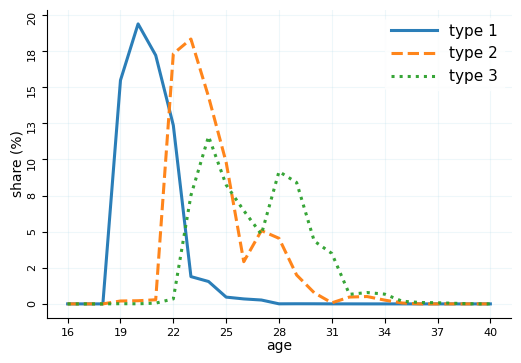

In [105]:
fSize = 9
tSize = 6

fig= plt.figure(figsize=(6,4))

LS = ["solid","dashed","dotted","dashdot"]
# plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize+2)
plt.rc('ytick',labelsize=tSize+2)
ax1=fig.add_subplot(1,1,1)
for type in [1,2,3]: # range(1,int(sim.type.max())+1):
    choiceMomentSim =sim.loc[(sim.type==type),:].groupby(["age"])["choice"].value_counts(normalize=True).unstack().reset_index()
    choiceMomentSim.fillna(0,inplace=True)
    choiceMomentSim.columns = ["age","home","study","white","blue","mil"]
    choiceMomentSim

    labelFarsi = [
        "stay home",
        "study",
        "white-collar",
        "blue-collar",
        "conscription"
    ]
    
    

#     ax1.plot("age","mil"
#             ,data=choiceMomentSim#.loc[(choiceMomentSim.age.isin(np.arange(16,65,2) ) ),:]
#             ,label=f"type {type}"
#             ,linewidth=0.0
#             ,marker=marker[type]
#             ,mfc ="none"
#             ,markersize=4
#             ,alpha=0.85)
    ax1.plot("age","mil"
            ,data=choiceMomentSim.loc[(choiceMomentSim.age <= 40 ),:]
#             ,label=""
            ,label=f"type {type}"  
            ,linewidth=2.2
            ,alpha=0.95
            ,linestyle = LS[type-1]
            ,color= plt.rcParams['axes.prop_cycle'].by_key()['color'][type-1] )

        
    props = dict(boxstyle='round', facecolor='w', alpha=0.4)
    flyer = ["(a)", "(b)", "(c)", "(d)"]
#     ax1.set_title(f"Conscription attendence timeline of different types",fontsize=12,y=0.99)
    
    ax1.set_xlabel("age",fontsize=fSize+1,labelpad=1)
    ax1.set_ylabel("share (%)",fontsize=fSize+1,labelpad=2)
    ax1.set_xticks(np.arange(choiceMomentSim.age.min(),41,3))
    # ax1.set_xticklabels([age for age in np.arange(choiceMomentSim.age.min(),40+1,3)])
    # ax1.set_ylim(-0.04 , 0.82)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
    ax1.grid(axis='both',alpha=0.2, color="lightblue")
    lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':fSize+2},handlelength=3)


    # Hide the right and top spines
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    ax1.yaxis.set_tick_params(labelrotation=90)
    ax2.yaxis.set_tick_params(labelrotation=90)
    formatter = FuncFormatter(to_percent)
    ax1.yaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)


# plt.subplots_adjust(hspace=0.25,wspace=0.14)

plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/cons_atten_type.pdf", bbox_inches='tight')


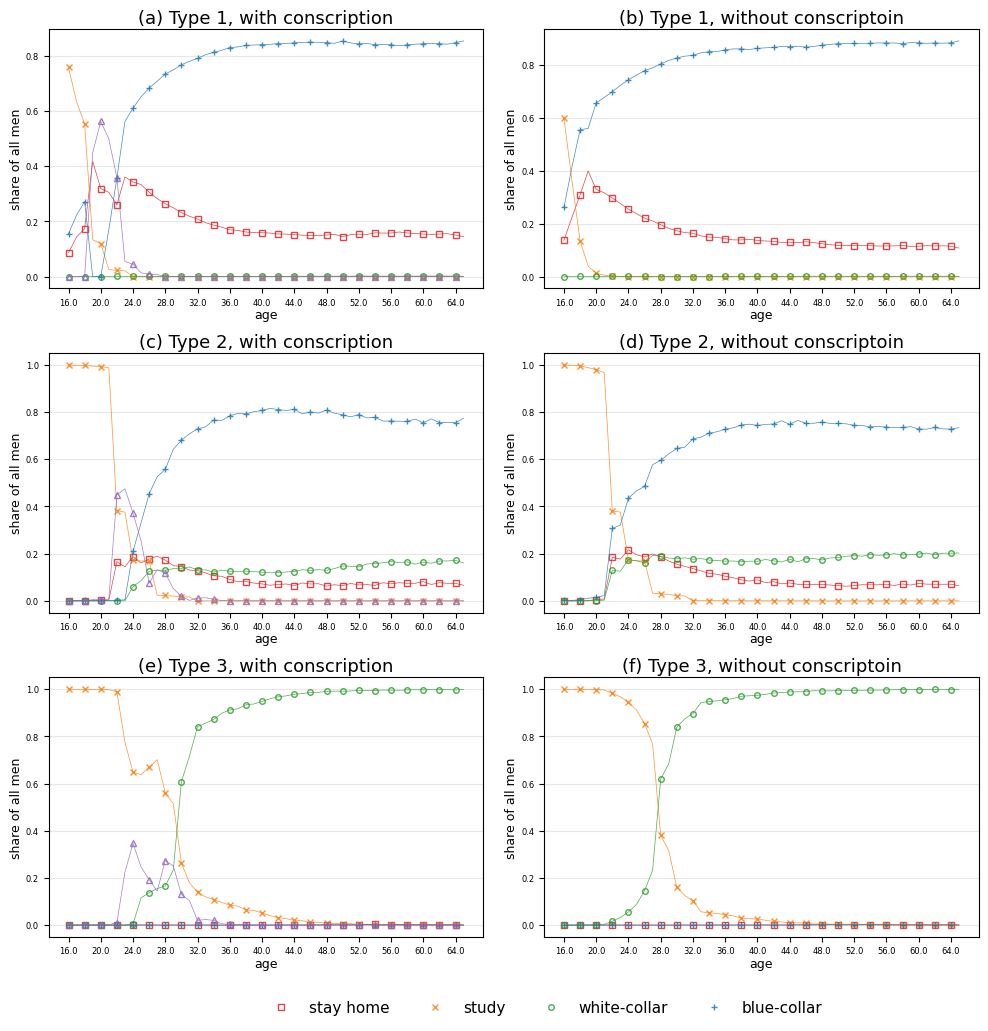

In [106]:
fSize = 9
tSize = 6

fig= plt.figure(figsize=(12,8*2))


# plt.rc('font', family='serif')
plt.rc('xtick',labelsize=tSize)
plt.rc('ytick',labelsize=tSize)
for type in range(1,int(sim.type.max())+1):
    choiceMomentSim =sim.loc[(sim.type==type)&(sim.x5.notna()),:].groupby(["age"])["choice"].value_counts(normalize=True).unstack().reset_index()
    choiceMomentSim.fillna(0,inplace=True)
    choiceMomentSim.columns = ["age","home","study","white","blue","mil"]
    choiceMomentSim

    labelFarsi = [
        "stay home",
        "study",
        "white-collar",
        "blue-collar",
        "conscription"
    ]
    
    ax1=fig.add_subplot(4,2,type*2-1)

    for index,choice in enumerate(["home","study","white","blue","mil"]):
        ax1.plot("age",choice
                ,data=choiceMomentSim.loc[(choiceMomentSim.age.isin(np.arange(16,65,2))),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=0.0
                ,mfc="none"
                ,marker=marker[index]
                ,markersize=4
                ,alpha=0.85
                ,color= color_range[index])
                # , color = (0.0,0.0,0.0, 0.7))
        ax1.plot("age",choice
                ,data=choiceMomentSim#.loc[(choiceMomentSim.age.isin(np.arange(16,65,2))),:]
                ,label=f""
                ,linewidth=0.5
                ,alpha=0.85
                , color = color_range[index])#plt.rcParams['axes.prop_cycle'].by_key()['color'][index])
    
    flyer = ["(a)", "(c)", "(e)", "(g)"]
    ax1.set_title(f"{flyer[type-1]} Type {type}, with conscription",fontsize=13,y=0.99)
    ax1.set_xlabel("age",fontsize=fSize,labelpad=1)
    ax1.set_ylabel("share of all men",fontsize=fSize,labelpad=2)
    ax1.set_xticks(np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4))
    ax1.set_xticklabels([age for age in 
                         np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4)])
    ax1.grid(axis='y',alpha=0.3)
    
    
    if type == 4 :
        lgd=ax1.legend(loc='upper center',edgecolor='w',prop={'size':fSize+2}
                      , bbox_to_anchor=(1.1, -0.19),ncol=6,handlelength=2)
    
    choiceMomentSim =sim.loc[(sim.type==type)&(sim.x5.isna()),:].groupby(["age"])["choice"].value_counts(normalize=True).unstack().reset_index()
    choiceMomentSim.fillna(0,inplace=True)
    choiceMomentSim.columns = ["age","home","study","white","blue"]
    choiceMomentSim

    labelFarsi = [
        "stay home",
        "study",
        "white-collar",
        "blue-collar",
        "conscription"
    ]
    
    ax1=fig.add_subplot(4,2,type*2)

    for index,choice in enumerate(["home","study","white","blue"]):
        ax1.plot("age",choice
                ,data=choiceMomentSim.loc[(choiceMomentSim.age.isin(np.arange(16,65,2))),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=0.0
                ,mfc="none"
                ,marker=marker[index]
                ,markersize=4
                ,alpha=0.85
                ,color= color_range[index])
        ax1.plot("age",choice
                ,data=choiceMomentSim#.loc[(choiceMomentSim.age.isin(np.arange(16,65,2))),:]
                ,label=f""
                ,linewidth=0.5
                ,alpha=0.85
                ,color= color_range[index])#plt.rcParams['axes.prop_cycle'].by_key()['color'][index])
    
    flyer = ["(b)", "(d)", "(f)", "(h)"]
    ax1.set_title(f"{flyer[type-1]} Type {type}, without conscriptoin",fontsize=13,y=0.99)
    
    
    
    
    ax1.set_xlabel("age",fontsize=fSize,labelpad=1)
    ax1.set_ylabel("share of all men",fontsize=fSize,labelpad=2)
    ax1.set_xticks(np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4))
    ax1.set_xticklabels([age for age in 
                         np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4)])

    ax1.grid(axis='y',alpha=0.3)

    if type == 3 :
        lgd=ax1.legend(loc='upper center',edgecolor='w',prop={'size':fSize+2}, bbox_to_anchor=(0.0, -0.19),ncol=6,handlelength=2)



plt.subplots_adjust(hspace=0.25,wspace=0.14)

plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/alt_share_by_type_military.pdf", bbox_inches='tight')


In [107]:
# sim.loc[(sim.age==46),:].educated.value_counts(normalize=True)#[1]
# sim.loc[(sim.type==3)&(sim.age==60),:].education.value_counts(normalize=True)#[1]


## Heterogeneity between Endowment 

In [108]:

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

sim["id"] = sim.index // 50

sim = pd.merge(sim,sim.loc[(sim.age==16),["id","education"]],on=["id"],how="left",suffixes=["","_16"])

sim["educ16"] = "10 years"
sim.loc[(sim.education_16<10),"educ16"] = "9 years or less"
sim = sim.astype({"educ16":"category"})

sim["Emax"] = sim.Emax #/1e7

In [109]:
# sim.loc[(sim.age==30),:].groupby(["type"])["choice"].value_counts(normalize=True).unstack().reset_index()
sim.loc[(sim.age==16),:].type.value_counts(normalize=True)#[1]

type
1.000   0.682
2.000   0.165
3.000   0.153
Name: proportion, dtype: float64

In [110]:
sim.loc[(sim.age==46),:].educated.value_counts(normalize=True)#[1]

educated
0.000   0.654
1.000   0.346
Name: proportion, dtype: float64

In [111]:
sim.loc[(sim.age==16),:].groupby(["educ16"]).type.value_counts(normalize=True)#[1]

educ16           type 
10 years         1.000   0.649
                 3.000   0.183
                 2.000   0.168
9 years or less  1.000   0.735
                 2.000   0.161
                 3.000   0.104
Name: proportion, dtype: float64

* schooling and experiences at age 30 of different type and initial schooling and military status

In [112]:
sim.loc[(sim.age==65),:].groupby(["military","type"]).agg(
    {"education":"mean","x3":"mean","x4":"mean","Emax":"mean","log_lifetime_income":"mean"})

education     x3     x4          Emax  \
military                      type                                           
group one: participate        1.000     10.762  0.066 29.903 124214537.840   
                              2.000     15.985  5.784 28.657 159317314.839   
                              3.000     21.983 29.942  0.016 249058959.240   
group two: Do not participate 1.000      9.641  0.049 29.982 118241521.853   
                              2.000     15.961  7.908 27.902 160560367.524   
                              3.000     21.989 29.974  0.019 246342590.392   

                                     log_lifetime_income  
military                      type                        
group one: participate        1.000               22.138  
                              2.000               22.324  
                              3.000               22.766  
group two: Do not participate 1.000               22.218  
                              2.000               22.375  
                              3.000               22.830

In [113]:
aa = sim.loc[(sim.age==40),:].groupby(["type"]).agg(
    {"x3":"mean"})

# aa["Emax"] = np.log(aa.Emax)

aa

,x3
type,
1.000,0.017
2.000,2.785
3.000,11.526


* schooling and experiences at age 30 of different type and initial schooling and military status

In [114]:
going = sim.loc[(sim.age==65)&(sim.military=="group one: participate"),:].groupby(["educ16","type"]).agg({"log_lifetime_income":"mean"}).reset_index()
notGoing = sim.loc[(sim.age==65)&(sim.military=="group two: Do not participate"),:].groupby(["educ16","type"]).agg({"log_lifetime_income":"mean"}).reset_index()

Emax16 = pd.merge(notGoing,going,on=["educ16","type"],suffixes=["NotGoing","Going"])

Emax16["log_lifetime_income_NotGoing"] = (Emax16.log_lifetime_incomeNotGoing)
Emax16["log_lifetime_income_Going"] = (Emax16.log_lifetime_incomeGoing)

Emax16["diffPercent"] = (Emax16.log_lifetime_income_NotGoing-Emax16.log_lifetime_income_Going)#/Emax16.EmaxNotGoing*100

Emax16

,educ16,type,log_lifetime_incomeNotGoing,log_lifetime_incomeGoing,log_lifetime_income_NotGoing,log_lifetime_income_Going,diffPercent
0,10 years,1.000,22.291,22.196,22.291,22.196,0.095
1,10 years,2.000,22.412,22.362,22.412,22.362,0.050
2,10 years,3.000,22.861,22.799,22.861,22.799,0.062
3,9 years or less,1.000,22.118,22.057,22.118,22.057,0.061
4,9 years or less,2.000,22.313,22.260,22.313,22.260,0.054
5,9 years or less,3.000,22.745,22.675,22.745,22.675,0.070


In [115]:
going = sim.loc[(sim.age==65)&(sim.military=="group one: participate"),:].groupby(["type"]).agg({"log_lifetime_income":"mean"}).reset_index()
notGoing = sim.loc[(sim.age==65)&(sim.military=="group two: Do not participate"),:].groupby(["type"]).agg({"log_lifetime_income":"mean"}).reset_index()

Emax16 = pd.merge(notGoing,going,on=["type"],suffixes=["NotGoing","Going"])

Emax16["diffPercent"] = (Emax16.log_lifetime_incomeNotGoing-Emax16.log_lifetime_incomeGoing)#/Emax16.log_lifetime_incomeNotGoing*100

Emax16

,type,log_lifetime_incomeNotGoing,log_lifetime_incomeGoing,diffPercent
0,1.000,22.218,22.138,0.080
1,2.000,22.375,22.324,0.051
2,3.000,22.830,22.766,0.064


In [116]:
going = sim.loc[(sim.age==65)&(sim.military=="group one: participate"),:].log_lifetime_income.mean()
notGoing = sim.loc[(sim.age==65)&(sim.military=="group two: Do not participate"),:].log_lifetime_income.mean()
print(going)
print(notGoing)

22.263674060062414
22.338250468465056


In [117]:
(notGoing-going)

np.float64(0.0745764084026419)

In [118]:
# sim.loc[(sim.military=="group one: participate")].shape[0] / sim.shape[0]   
sim.loc[(sim.age==16),:].military.value_counts(normalize=True)

military
group two: Do not participate   0.650
group one: participate          0.350
Name: proportion, dtype: float64

## Compulsory conscription effect on life-time earning

### Income

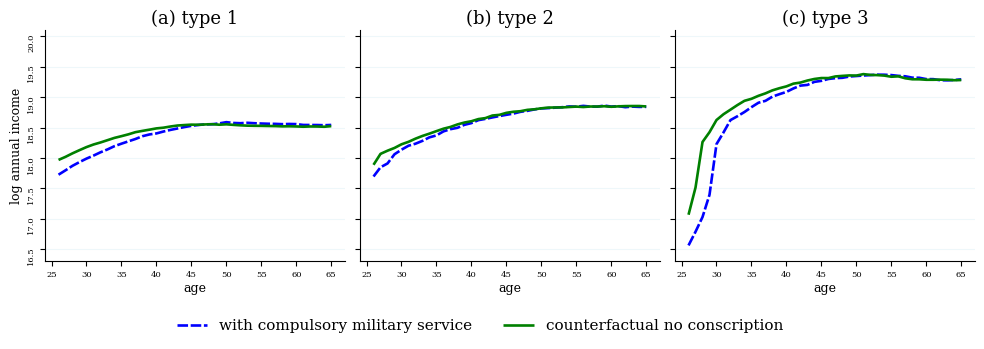

In [44]:
EmaxAgeTypeMil = sim.groupby(["age","type","military"]).agg({"income":"mean"}).reset_index()
EmaxAgeTypeMil["income"] = np.log(EmaxAgeTypeMil.income)



labelFarsi = [
    "with compulsory military service",
    "counterfactual no conscription"
]
fSize = 9
tSize = 6
fig= plt.figure(figsize=(12,3))
# fig= plt.figure(figsize=(17,10))


for Type in range(1,int(sim.type.max())+1):
    ax1=fig.add_subplot(1,3,Type)
    plt.rc('font', family='serif')
    plt.rc('xtick',labelsize=tSize)
    plt.rc('ytick',labelsize=tSize)
    for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
        ax1.plot("age","income"
                ,dashes= [4,1] if mil=="group one: participate" else [1,0]
                ,data=EmaxAgeTypeMil.loc[(EmaxAgeTypeMil.type==Type)
                                         &(EmaxAgeTypeMil.military==mil)
                                         &(EmaxAgeTypeMil.age>=26),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=1.9
                ,color = "blue" if mil=="group one: participate" else "green"
                )
    flyer = ["(a)","(b)","(c)","(d)"]
    ax1.set_title(f"{flyer[Type-1]} type {Type}",fontsize=13,y=0.99)
    

    ax1.set_xlabel("age",fontsize=fSize,labelpad=2)
    if Type==1:
        ax1.set_ylabel("log annual income",fontsize=fSize,labelpad=3)

    # ax1.set_xticks(np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+2,10))
    # ax1.set_xticklabels(np.arange(16, 65+2, 10))

    ax1.set_ylim(16.3, 20.1)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='w', alpha=0.4)

    ax1.grid(axis='y',alpha=0.2, color="lightblue")
    if Type == 2:
        lgd=ax1.legend(loc='upper center',edgecolor='w',prop={'size':fSize+2}, bbox_to_anchor=(0.4, -0.19),ncol=6,handlelength=2)
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_tick_params(labelrotation=90)
    if Type != 1:
        plt.gca().set_yticklabels([])

plt.subplots_adjust(hspace=0.0,wspace=0.05)
    
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/life-time earning by mil and educ16 and type.pdf", bbox_inches='tight')




In [34]:
# EmaxAgeTypeMil = sim.loc[(sim.choice.isin([3,4])),:].groupby(["age","type","military"]).agg({"income":"mean"}).reset_index()
# EmaxAgeTypeMil["income"] = np.log(EmaxAgeTypeMil.income)



# labelFarsi = [
#     "Military group",
#     "Non military group"
# ]
# fSize = 9
# tSize = 6
# fig= plt.figure(figsize=(12,8))
# # fig= plt.figure(figsize=(17,10))


# for Type in [1,2,3,4]:
#     ax1=fig.add_subplot(2,2,Type)
#     plt.rc('font', family='serif')
#     plt.rc('xtick',labelsize=tSize)
#     plt.rc('ytick',labelsize=tSize)
#     for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
#         ax1.plot("age","income"
#                 ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#                 ,data=EmaxAgeTypeMil.loc[(EmaxAgeTypeMil.type==Type)
#                                          &(EmaxAgeTypeMil.military==mil)
#                                          &(EmaxAgeTypeMil.age>=24),:]
#                 ,label=f"{labelFarsi[index]}"
#                 ,linewidth=1.9
#                 ,color = (0,0,0,0.5 if mil=="group one: participate" else 0.75))
#     flyer = ["(a)","(b)","(c)","(d)"]
#     ax1.set_title(f"{flyer[Type-1]} type {Type} current earnings",fontsize=13,y=0.99)
    

#     ax1.set_xlabel("age",fontsize=fSize,labelpad=2)
#     ax1.set_ylabel("log annual income",fontsize=fSize,labelpad=3)
#     ax1.set_xticks(np.arange(20,65,4))
#     #     ax1.set_xticklabels([age for age in np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4).astype(np.int)]
#     #                         ,rotation=0,fontsize=10)

#     # ax1.set_ylim(-0.04 , 0.82)
#     # ax1.set_yticks(np.arange(0.0,0.81,0.1))
#     # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
#     # these are matplotlib.patch.Patch properties
#     props = dict(boxstyle='round', facecolor='w', alpha=0.4)

#     # place a text box in upper left in axes coords
# #     ax1.text(0.85, 0.2, f"Type {Type}", transform=ax1.transAxes, fontsize=fSize+1,
# #         verticalalignment='top', bbox=props)

#     ax1.grid(axis='y',alpha=0.3)
#     lgd=ax1.legend(loc='lower right',edgecolor='w',prop={'size':fSize}
#                   ,ncol=1,handlelength=1.5,handleheight=1)
    
# #     ax1.set_ylim(17.1, 19.55)
#     # Hide the right and top spines
# #     ax1.spines['right'].set_visible(False)
# #     ax1.spines['top'].set_visible(False)

# plt.subplots_adjust(hspace=0.25,wspace=0.17)
    
# plt.show()
# # fig.savefig(f"Results/Paper/life-time earning by mil and educ16 and type.pdf", bbox_inches='tight')
# # fig.savefig(f"../../Reports/English version/Latex/Version4/Figures/life-time earning by mil and educ16 and type.pdf", bbox_inches='tight')




In [35]:

# diff1 = sim.loc[(sim.age>=22)&(sim.type==1)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
# diff2 = sim.loc[(sim.age>=22)&(sim.type==1)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

# diff = pd.merge(diff1,diff2,on=["age"])
# # diff["income_x"] = np.log(diff.income_x)
# # diff["income_y"] = np.log(diff.income_y)
# diff["type 1"] = (diff.income_x - diff.income_y)/diff.income_y
# result = diff[["age","type 1"]]

# for tt in [2,3,4]:
#     diff1 = sim.loc[(sim.type==tt)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
#     diff2 = sim.loc[(sim.type==tt)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

#     diff = pd.merge(diff1,diff2,on=["age"])
# #     diff["income_x"] = np.log(diff.income_x)
# #     diff["income_y"] = np.log(diff.income_y)
#     diff[f"type {tt}"] = (diff.income_x - diff.income_y)/diff.income_y
#     result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])
    
    
# # result
# result.fillna(0, inplace=True)
# typeShare = sim.loc[(sim.age==16)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
# result["average"] = 0
# for i in [1,2,3,4]:
#     result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]


# # print(result.head())



# #******************************************
# fig= plt.figure(figsize=(7,4))

# fSize = 10
# tSize = 8
# # for Type in [1,2,3,4]:
# ax1=fig.add_subplot(1,1,1)

# # for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
# ax1.plot("age","average"
# #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#         ,data=result.loc[(result.age>=30),:]
#         ,label=f"Average effect on conscripts' income"
#         ,linewidth=2)
# #         ,color = (0,0,0,0.8))


# ax1.set_xlabel("Age",labelpad=2,fontsize=fSize)
# ax1.set_ylabel("Lfetime earning difference",labelpad=2,fontsize=fSize)

# ax1.set_xticks(np.arange(29,67,4))

# props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# # place a text box in upper left in axes coords
# # ax1.text(0.85, 0.9, f"Type {Type}", transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)

# ax1.grid(axis='y',alpha=0.4)
# lgd=ax1.legend(loc='upper left',edgecolor='w',prop={'size':12}
#               ,ncol=1,handlelength=1.5,handleheight=1)
# # Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.tick_params(labelsize=tSize)
# plt.show()
# # fig.savefig(f"Results/Paper/average effect on conscripts income.pgf", bbox_inches='tight')
# # fig.savefig(f"../../Reports/English version/Latex/Figures/average effect on conscripts income.pdf", bbox_inches='tight')



In [36]:
sim.loc[(sim.income.isna()),:]

,age,education,x3,x4,choice,income,educated,x5,type,Emax,choice_next,homeSinceSchool,id,lifetime_income,log_lifetime_income,military,education_16,educ16


In [37]:
# %%time
# ss = pd.DataFrame([])
for num_boots in np.arange(1,10):
    
    sampleSize = sim.shape[0]
    bootstrapSize = round(sampleSize*0.8)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    sample = sim.loc[bootstrapIndex,:]

    diff1 = sample.loc[(sample.age>=20)&(sample.type==1)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
    diff2 = sample.loc[(sample.age>=20)&(sample.type==1)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

    diff = pd.merge(diff1,diff2,on=["age"])
    diff["type 1"] = (diff.income_x - diff.income_y)/diff.income_y
    result = diff[["age","type 1"]]

    for tt in range(2,int(sim.type.max())+1):
        diff1 = sample.loc[(sample.type==tt)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
        diff2 = sample.loc[(sample.type==tt)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

        diff = pd.merge(diff1,diff2,on=["age"])
        diff[f"type {tt}"] = (diff.income_x - diff.income_y)/diff.income_y
        result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])


    # result
    result.fillna(0, inplace=True)
    typeShare = sim.loc[(sim.age==16)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
    
    result["average"] = 0
    for i in range(1,int(sim.type.max())+1):
        result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]
    
#         result["average"] = 0.560*result["type 1"]+ 0.192*result["type 2"]+ 0.150*result["type 4"] + 0.098*result["type 3"]

    result = result[["age","average"]]
    
    if num_boots == 1 :
        ss = result
    else:
        ss = pd.concat([ss,result],axis=0)
        
    
    
    
    diff1 = sample.loc[(sample.age>=22)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
    diff2 = sample.loc[(sample.age>=22)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

    without = pd.merge(diff1,diff2,on=["age"])
    without["average"] = (without.income_x - without.income_y)/without.income_y * 100
    
    if num_boots == 1 :
        ww = without
    else:
        ww = pd.concat([ww,without],axis=0)
    

result = ss
ss = []



In [38]:
result = result.groupby(["age"]).average.quantile([0.05,0.5,0.95]).reset_index()
result.loc[(result.level_1==0.05),"what"] = "lower"
result.loc[(result.level_1==0.5),"what"] = "median"
result.loc[(result.level_1==0.95),"what"] = "upper"
result.drop(columns=["level_1"],inplace=True)

result = result.pivot_table(index=["age"], 
                    columns="what", 
                    values="average").reset_index()


result["lower"] = result["lower"] * 100
result["median"] = result["median"] * 100 
result["upper"] = result["upper"] * 100 

# result

ww = ww.groupby(["age"]).average.quantile([0.05,0.5,0.95]).reset_index()
ww.loc[(ww.level_1==0.05),"what"] = "lower"
ww.loc[(ww.level_1==0.5),"what"] = "median"
ww.loc[(ww.level_1==0.95),"what"] = "upper"
ww.drop(columns=["level_1"],inplace=True)

ww = ww.pivot_table(index=["age"], 
                    columns="what", 
                    values="average").reset_index()

# ww

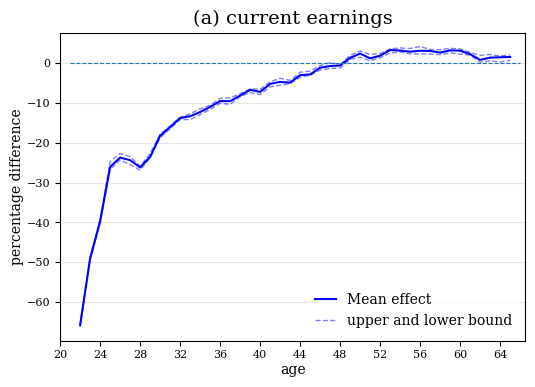

In [39]:

#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","median"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result.loc[result.age>=22,:]
        ,label="Mean effect" #: controlling for unobserved heterogeneity"
        ,linewidth=1.5
        ,alpha=0.99
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","lower","--"
#         ,dashes= [4,1]
        ,data=result.loc[result.age>=22,:]
        ,label=""
        ,linewidth=1.
        ,alpha=0.5
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","upper", "--"
#         ,dashes= [4,1]
        ,data=result.loc[result.age>=22,:]
        ,label="upper and lower bound"
        ,linewidth=1.
        ,alpha=0.5
        ,color = "blue" #(0,0,0,0.6)
        )



# ax1.plot("age","median"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label="Mean effect: without control"
#         ,linewidth=1.5
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

# ax1.plot("age","lower"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label=""
#         ,linewidth=1.
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

# ax1.plot("age","upper"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label=""
#         ,linewidth=1.
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

ax1.hlines(0,21,66,
          linewidth=0.8
          ,linestyles='dashed')

ax1.set_xlim(21,66.5)
# ax1.set_ylim(-35,10)

ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("percentage difference",labelpad=2,fontsize=fSize)

ax1.set_xticks(np.arange(20,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# place a text box in upper left in axes coords
# ax1.text(0.85, 0.9, f"Type {Type}", transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax1.set_title("(a) current earnings")
ax1.grid(axis='y',alpha=0.3)
lgd=ax1.legend(loc='lower right',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version4/Figures/average effect on conscripts income 2.pdf", bbox_inches='tight')


In [169]:
# sim.loc[(sim.income.isna()),"income"] = 0
# sim.sort_values(by=["id","age"],inplace=True)
# sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

# sim["log_lifetime_income"] = np.log(sim.lifetime_income)

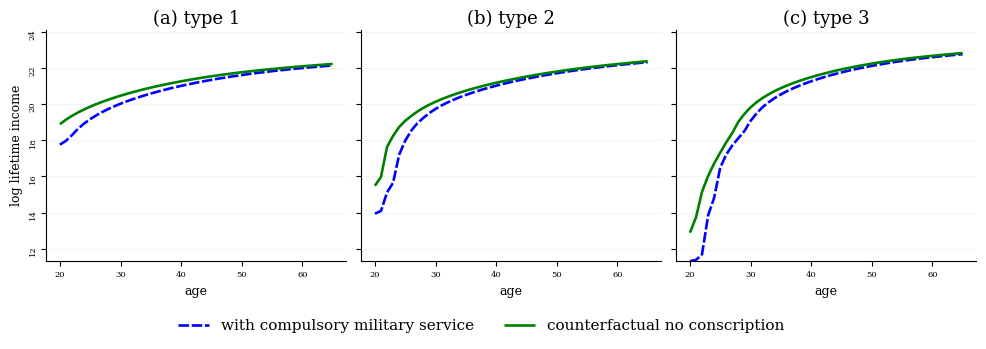

In [ ]:
EmaxAgeTypeMil = sim.groupby(["age","type","military"]).agg({"lifetime_income":"mean"}).reset_index()
EmaxAgeTypeMil["income"] = np.log(EmaxAgeTypeMil.lifetime_income)

labelFarsi = [
    "with compulsory military service",
    "counterfactual no conscription"
]
fSize = 9
tSize = 6
fig= plt.figure(figsize=(12,3))


for Type in range(1,int(sim.type.max())+1):
    ax1=fig.add_subplot(1,3,Type)
    plt.rc('font', family='serif')
    plt.rc('xtick',labelsize=tSize)
    plt.rc('ytick',labelsize=tSize)
    for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
        ax1.plot("age","income"
                ,dashes= [4,1] if mil=="group one: participate" else [1,0]
                ,data=EmaxAgeTypeMil.loc[(EmaxAgeTypeMil.type==Type)
                                         &(EmaxAgeTypeMil.military==mil)
                                         &(EmaxAgeTypeMil.age>=20),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=1.9
                ,color = "blue" if mil=="group one: participate" else "green"
        )

    ax1.set_title(f"{flyer[Type-1]} type {Type}",fontsize=13,y=0.99)

    ax1.set_ylim(11.3, 24.1)

    ax1.set_xlabel("age",fontsize=fSize)
    if Type==1:
        ax1.set_ylabel("log lifetime income",fontsize=fSize)
    # ax1.set_xticks(np.arange(20,65,4))
    #     ax1.set_xticklabels([age for age in np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4).astype(np.int)]
    #                         ,rotation=0,fontsize=10)

    # ax1.set_ylim(-0.04 , 0.82)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
    # these are matplotlib.patch.Patch properties
    ax1.grid(axis='y',alpha=0.2, color="lightblue")
    if Type == 2:
        lgd=ax1.legend(loc='upper center',edgecolor='w',prop={'size':fSize+2}, bbox_to_anchor=(0.4, -0.19),ncol=6,handlelength=2)
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_tick_params(labelrotation=90)
    if Type != 1:
        plt.gca().set_yticklabels([])

plt.subplots_adjust(hspace=0.0,wspace=0.05)

plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/lifetime_income_by_type_military.pdf", bbox_inches='tight')




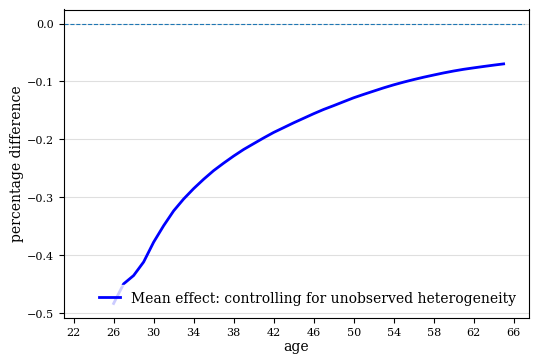

In [42]:

diff1 = sim.loc[(sim.age>=20)&(sim.type==1)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
diff2 = sim.loc[(sim.age>=20)&(sim.type==1)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

diff = pd.merge(diff1,diff2,on=["age"])
# diff["income_x"] = np.log(diff.income_x)
# diff["income_y"] = np.log(diff.income_y)
diff["type 1"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
result = diff[["age","type 1"]]

for tt in range(2,int(sim.type.max())+1):
    diff1 = sim.loc[(sim.type==tt)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
    diff2 = sim.loc[(sim.type==tt)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

    diff = pd.merge(diff1,diff2,on=["age"])
#     diff["income_x"] = np.log(diff.income_x)
#     diff["income_y"] = np.log(diff.income_y)
    diff[f"type {tt}"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
    result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])
    
    
# result
result.fillna(0, inplace=True)
typeShare = sim.loc[(sim.age==50)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
result["average"] = 0
for i in range(1,int(sim.type.max())+1):
    result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]


# print(result.head())



#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","average"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result.loc[result.age>=26,:]
        ,label=f"Mean effect: controlling for unobserved heterogeneity"
        ,linewidth=2,
        color="blue")
#         ,color = (0,0,0,0.8))


ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("percentage difference",labelpad=2,fontsize=fSize)

ax1.set_xticks(np.arange(22,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# place a text box in upper left in axes coords
# ax1.text(0.85, 0.9, f"Type {Type}", transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax1.hlines(0,21,67, linewidth=0.8
          ,linestyles='dashed')

ax1.set_xlim(21,67.5)


ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='lower right',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"Results/Paper/average effect on conscripts income.pgf", bbox_inches='tight')
# fig.savefig(f"../../Reports/English version/Latex/Version3/Figures/average_effect_lifetime_income.pdf", bbox_inches='tight')



In [43]:
# %%time
# ss = pd.DataFrame([])
for num_boots in np.arange(1,10):
    
    sampleSize = sim.shape[0]
    bootstrapSize = round(sampleSize*0.4)

    bootstrapIndex = np.random.randint(0,sampleSize,size=bootstrapSize)
    sample = sim.loc[bootstrapIndex,:]

    diff1 = sample.loc[(sample.age>=20)&(sample.type==1)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
    diff2 = sample.loc[(sample.age>=20)&(sample.type==1)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

    diff = pd.merge(diff1,diff2,on=["age"])
    diff["type 1"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
    result = diff[["age","type 1"]]

    for tt in range(2,int(sim.type.max())+1):
        diff1 = sample.loc[(sample.type==tt)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
        diff2 = sample.loc[(sample.type==tt)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

        diff = pd.merge(diff1,diff2,on=["age"])
        diff[f"type {tt}"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
        result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])


    # result
    result.fillna(0, inplace=True)
    typeShare = sim.loc[(sim.age==16)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
    
    result["average"] = 0
    for i in range(1,int(sim.type.max())+1):
        result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]
    
#         result["average"] = 0.560*result["type 1"]+ 0.192*result["type 2"]+ 0.150*result["type 4"] + 0.098*result["type 3"]

    result = result[["age","average"]]
    
    if num_boots == 1 :
        ss = result
    else:
        ss = pd.concat([ss,result],axis=0)
        
    
    
    
    diff1 = sample.loc[(sample.age>=22)&(sample.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
    diff2 = sample.loc[(sample.age>=22)&(sample.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

    without = pd.merge(diff1,diff2,on=["age"])
    without["average"] = (without.lifetime_income_x - without.lifetime_income_y)/without.lifetime_income_y * 100
    
    if num_boots == 1 :
        ww = without
    else:
        ww = pd.concat([ww,without],axis=0)
    

result = ss
ss = []



result = result.groupby(["age"]).average.quantile([0.05,0.5,0.95]).reset_index()
result.loc[(result.level_1==0.05),"what"] = "lower"
result.loc[(result.level_1==0.5),"what"] = "median"
result.loc[(result.level_1==0.95),"what"] = "upper"
result.drop(columns=["level_1"],inplace=True)

result = result.pivot_table(index=["age"], 
                    columns="what", 
                    values="average").reset_index()


result["lower"] = result["lower"] * 100
result["median"] = result["median"] * 100 
result["upper"] = result["upper"] * 100 

# result

ww = ww.groupby(["age"]).average.quantile([0.05,0.5,0.95]).reset_index()
ww.loc[(ww.level_1==0.05),"what"] = "lower"
ww.loc[(ww.level_1==0.5),"what"] = "median"
ww.loc[(ww.level_1==0.95),"what"] = "upper"
ww.drop(columns=["level_1"],inplace=True)

ww = ww.pivot_table(index=["age"], 
                    columns="what", 
                    values="average").reset_index()

# ww

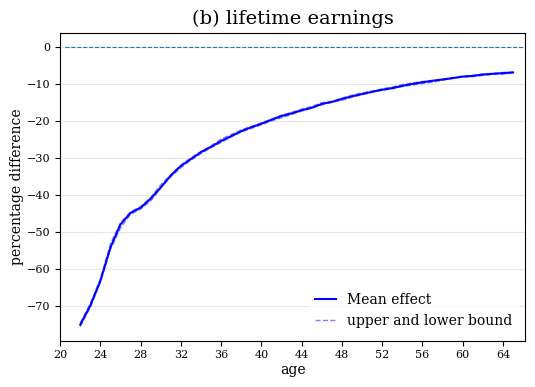

In [44]:

#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","median"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result.loc[result.age>=22,:]
        ,label="Mean effect" #: controlling for unobserved heterogeneity"
        ,linewidth=1.5
        ,alpha=0.99
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","lower","--"
#         ,dashes= [4,1]
        ,data=result.loc[result.age>=22,:]
        ,label=""
        ,linewidth=1.
        ,alpha=0.5
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","upper", "--"
#         ,dashes= [4,1]
        ,data=result.loc[result.age>=22,:]
        ,label="upper and lower bound"
        ,linewidth=1.
        ,alpha=0.5
        ,color = "blue" #(0,0,0,0.6)
        )



# ax1.plot("age","median"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label="Mean effect: without control"
#         ,linewidth=1.5
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

# ax1.plot("age","lower"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label=""
#         ,linewidth=1.
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

# ax1.plot("age","upper"
#         ,dashes= [4,1]
#         ,data=ww.loc[ww.age>=26,:]
#         ,label=""
#         ,linewidth=1.
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.5
#         )

ax1.hlines(0,20.5,66,
          linewidth=0.8
          ,linestyles='dashed')

ax1.set_xlim(20,66.2)
# ax1.set_ylim(-52,4)

ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("percentage difference",labelpad=2,fontsize=fSize)

ax1.set_xticks(np.arange(20,67,4))

# ax1.set_xticks(np.arange(22,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.set_title("(b) lifetime earnings")
ax1.grid(axis='y',alpha=0.3)
lgd=ax1.legend(loc='lower right',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version4/Figures/average_effect_lifetime_income.pdf", bbox_inches='tight')


In [45]:
result

what,age,lower,median,upper
0,20.000,-73.426,-71.481,-68.521
1,21.000,-76.504,-75.639,-72.488
2,22.000,-75.535,-75.069,-74.617
3,23.000,-70.375,-69.875,-69.311
4,24.000,-63.576,-63.220,-62.669
5,25.000,-54.728,-54.185,-53.243
6,26.000,-48.946,-47.995,-47.511
7,27.000,-45.300,-44.881,-44.630
8,28.000,-43.815,-43.491,-43.169
9,29.000,-41.694,-41.046,-40.745


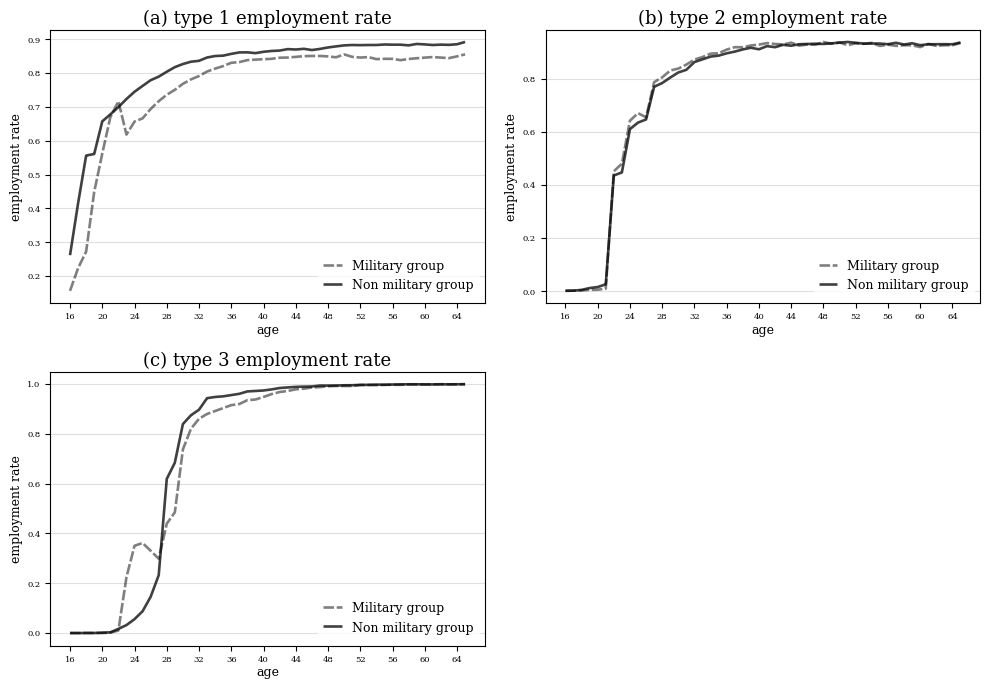

In [46]:
sim["working"] = 0 
sim.loc[(sim.income > 0), "working"] = 1
sim.loc[(sim.choice==5), "working"] = 1

EmaxAgeTypeMil = sim.groupby(["age","type","military"]).agg({"working":"mean"}).reset_index()
EmaxAgeTypeMil["income"] = EmaxAgeTypeMil.working

labelFarsi = [
    "Military group",
    "Non military group"
]
fSize = 9
tSize = 6
fig= plt.figure(figsize=(12,8))
# fig= plt.figure(figsize=(17,10))


for Type in range(1,int(sim.type.max())+1):
    ax1=fig.add_subplot(2,2,Type)
    plt.rc('font', family='serif')
    plt.rc('xtick',labelsize=tSize)
    plt.rc('ytick',labelsize=tSize)
    for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
        ax1.plot("age","income"
                ,dashes= [4,1] if mil=="group one: participate" else [1,0]
                ,data=EmaxAgeTypeMil.loc[(EmaxAgeTypeMil.type==Type)
                                         &(EmaxAgeTypeMil.military==mil)
                                         &(EmaxAgeTypeMil.age>=16),:]
                ,label=f"{labelFarsi[index]}"
                ,linewidth=1.9
                ,color = (0,0,0,0.5 if mil=="group one: participate" else 0.75))

    ax1.set_title(f"{flyer[Type-1]} type {Type} employment rate",fontsize=13,y=0.99)

    ax1.set_xlabel("age",fontsize=fSize,labelpad=2)
    if Type in [1,2,3,4]:
        ax1.set_ylabel("employment rate",fontsize=fSize,labelpad=3)
    ax1.set_xticks(np.arange(16,65,4))
    #     ax1.set_xticklabels([age for age in np.arange(choiceMomentSim.age.min(),choiceMomentSim.age.max()+1,4).astype(np.int)]
    #                         ,rotation=0,fontsize=10)

    # ax1.set_ylim(-0.04 , 0.82)
    # ax1.set_yticks(np.arange(0.0,0.81,0.1))
    # ax1.set_yticklabels(np.arange(0,8.1,1)/10 , fontsize=12)
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='w', alpha=0.4)

    # place a text box in upper left in axes coords
#     ax1.text(0.85, 0.2, f"Type {Type}", transform=ax1.transAxes, fontsize=fSize+1,
#         verticalalignment='top', bbox=props)

    ax1.grid(axis='y',alpha=0.4)
    lgd=ax1.legend(loc='lower right',edgecolor='w',prop={'size':fSize} ,ncol=1,handlelength=1.5,handleheight=1)
    # Hide the right and top spines
#     ax1.spines['right'].set_visible(False)
#     ax1.spines['top'].set_visible(False)
    
plt.subplots_adjust(hspace=0.25,wspace=0.14)

plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version4/Figures/employment_rate_by_military_type.pdf", bbox_inches='tight')




## Counterfactual: No conscription system

In [57]:

# sim = pd.read_csv(r"/home/sabouri/Labor/CodeOutput/simNew.csv", header=None)
sim = pd.read_csv(r"../simNew.csv", header=None)
sim["counterfactual"] = 0

# simNoConscription = pd.read_csv(r"/home/sabouri/Labor/CodeOutput/simNoConscription.csv", header=None)
simNoConscription = pd.read_csv(r"../NoConscription.csv", header=None)
simNoConscription["counterfactual"] = 1


sim = pd.concat([sim,simNoConscription],axis=0)

simNoConscription = []


sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","dd","counterfactual"] 
sim.reset_index(inplace=True,drop=True)
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["counterfactual","id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

sim["log_lifetime_income"] = np.log(sim.lifetime_income)


lifetime_income_variation = sim.groupby(["counterfactual","age"]).agg({"log_lifetime_income":"std"}).reset_index()

# lifetime_income_variation["lifetime_income"] = np.log(lifetime_income_variation["lifetime_income"])



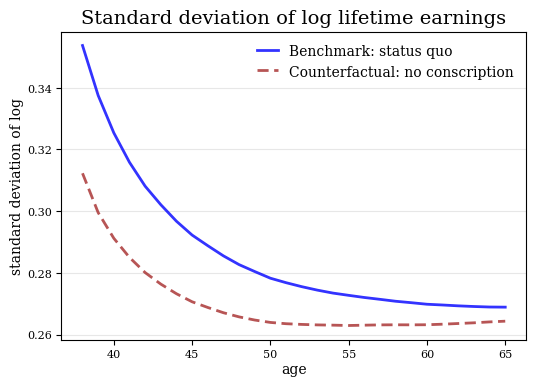

In [58]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","log_lifetime_income"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=lifetime_income_variation.loc[lifetime_income_variation.counterfactual==0,:]
        ,label="Benchmark: status quo"
        ,linewidth=2
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","log_lifetime_income"
        ,dashes= [4,2]
        ,data=lifetime_income_variation.loc[lifetime_income_variation.counterfactual==1,:]
        ,label="Counterfactual: no conscription"
        ,linewidth=2
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )

ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("standard deviation of log",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)
props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)


# ax1.set_xticks(np.arange(22,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.set_title("Standard deviation of log lifetime earnings")
ax1.grid(axis='y',alpha=0.3)



# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/no_conscription_std_log_lifetime_income.pdf", bbox_inches='tight')


In [59]:
sim["log_income"] = np.log(sim.loc[(sim.income>0),"income"] )

income_variation = sim.groupby(["counterfactual","age"]).agg({"log_income":"std"}).reset_index()

In [60]:
# #******************************************
# fig= plt.figure(figsize=(7,4))

# fSize = 10
# tSize = 8
# # for Type in [1,2,3,4]:
# ax1=fig.add_subplot(1,1,1)

# # for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
# ax1.plot("age","log_income"
# #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#         ,data=income_variation.loc[income_variation.counterfactual==0,:]
#         ,label="With"
#         ,linewidth=1
#         ,alpha=0.8
#         ,color = "blue" #(0,0,0,0.6)
#         )

# ax1.plot("age","log_income"
#         ,dashes= [4,2]
#         ,data=income_variation.loc[income_variation.counterfactual==1,:]
#         ,label="Without"
#         ,linewidth=1
#         ,color = "brown"#(0,0,0,0.6)
#         ,alpha=0.8
#         )

# ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
# ax1.set_ylabel("percentage difference",labelpad=2,fontsize=fSize)

# # ax1.set_xlim(18,40)
# ax1.set_title("standard deviation of log lifetime utility")
# props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# ax1.grid(axis='y',alpha=0.4)
# lgd=ax1.legend(loc='upper right',edgecolor='w',prop={'size':10}
#               ,ncol=1,handlelength=1.5,handleheight=1)


# # ax1.set_xticks(np.arange(22,67,4))

# props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# ax1.set_title("(b) lifetime earnings")
# ax1.grid(axis='y',alpha=0.3)



# # Hide the right and top spines
# # ax1.spines['right'].set_visible(False)
# # ax1.spines['top'].set_visible(False)
# ax1.tick_params(labelsize=tSize)
# plt.show()
# # fig.savefig(f"Results/Paper/average effect on conscripts income 2.pdf", bbox_inches='tight')

In [61]:
"""
 define a function that calculated the Gini coefficient (also weighted)
"""

def gini(x):
    """ The rest of the code requires numpy arrays. """
    x = np.asarray(x)

    sorted_x = np.sort(x)
    n = len(x)
    cumx = np.cumsum(sorted_x, dtype=float)
    """ The above formula, with all weights equal to 1 simplifies to: """
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [62]:
lifetime_income_gini = sim.loc[(sim.age>=30)&(sim.type!=14),:].groupby(["counterfactual","age"]).agg({"lifetime_income":gini}).reset_index()


In [63]:
diff = lifetime_income_gini.pivot(index="age",columns="counterfactual",values="lifetime_income").reset_index()

diff.columns = ["age","benchmark","counterfactual"]

diff["diff"] = (diff.benchmark - diff.counterfactual) * 100

diff["percent"] = (diff.benchmark - diff.counterfactual) / diff.benchmark * 100

diff#.mean()

,age,benchmark,counterfactual,diff,percent
0,30.000,0.280,0.240,3.992,14.242
1,31.000,0.255,0.219,3.563,13.986
2,32.000,0.234,0.202,3.147,13.465
3,33.000,0.217,0.188,2.853,13.166
4,34.000,0.204,0.177,2.619,12.871
5,35.000,0.193,0.169,2.390,12.388
6,36.000,0.184,0.163,2.177,11.809
7,37.000,0.178,0.158,2.002,11.268
8,38.000,0.172,0.154,1.853,10.745
9,39.000,0.168,0.151,1.715,10.196


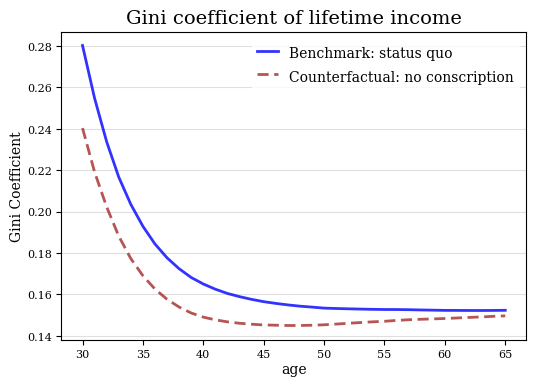

In [64]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","lifetime_income"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=lifetime_income_gini.loc[lifetime_income_gini.counterfactual==0,:]
        ,label="Benchmark: status quo"
        ,linewidth=2
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","lifetime_income"
        ,dashes= [4,2]
        ,data=lifetime_income_gini.loc[lifetime_income_gini.counterfactual==1,:]
        ,label="Counterfactual: no conscription"
        ,linewidth=2
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )

ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("Gini Coefficient",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)
ax1.set_title("Gini coefficient of lifetime income")

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1.5)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/no_conscription_gini_lifetime_income.pdf", bbox_inches='tight')


gini coefficient of income distribution at each age

In [65]:
income_gini = sim.loc[(sim.age>=30),:].groupby(["counterfactual","age"]).agg({"income":gini}).reset_index()


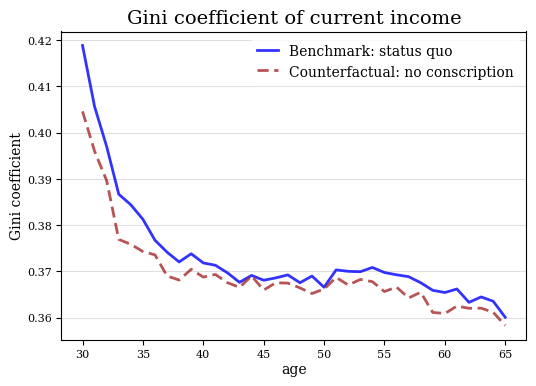

In [66]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","income"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=income_gini.loc[income_gini.counterfactual==0,:]
        ,label="Benchmark: status quo"
        ,linewidth=2
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","income"
        ,dashes= [4,2]
        ,data=income_gini.loc[income_gini.counterfactual==1,:]
        ,label="Counterfactual: no conscription"
        ,linewidth=2
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )
# 
ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("Gini coefficient",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)
ax1.set_title("Gini coefficient of current income")

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/no_conscription_gini_current_income.pdf", bbox_inches='tight')


In [67]:
gini_all = sim.loc[(sim.age>=30),:].groupby(["counterfactual"]).agg({"income":gini}).reset_index()
gini_all

,counterfactual,income
0,0,0.380
1,1,0.375


In [68]:
lifetiemincome_median = sim.loc[(sim.age>=30),:].groupby(["counterfactual","age"]).agg({"lifetime_income":  "mean"}).reset_index()
lifetiemincome_median["lifetime_income"] = np.log(lifetiemincome_median.lifetime_income)

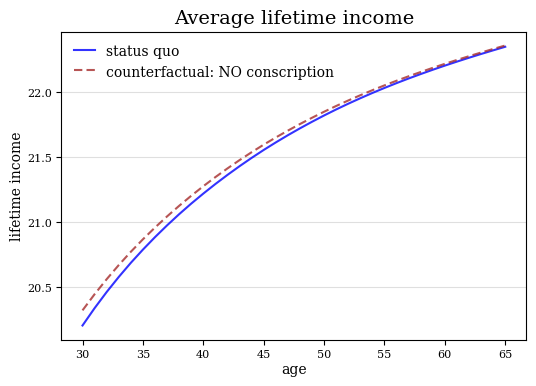

In [69]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","lifetime_income"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=lifetiemincome_median.loc[lifetiemincome_median.counterfactual==0,:]
        ,label="status quo"
        ,linewidth=1.5
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","lifetime_income"
        ,dashes= [4,2]
        ,data=lifetiemincome_median.loc[lifetiemincome_median.counterfactual==1,:]
        ,label="counterfactual: NO conscription"
        ,linewidth=1.5
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )
# 
ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("lifetime income",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)
ax1.set_title("Average lifetime income")

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/gini_current_income.pdf", bbox_inches='tight')


In [70]:
# lifetiemincome_median = lifetiemincome_median.pivot_table(values="lifetime_income",index= "age",columns=["counterfactual"]).reset_index()
# lifetiemincome_median.columns = ["age","status","counter"]
# lifetiemincome_median["dif"] = (lifetiemincome_median["counter"] - lifetiemincome_median["status"]) 

# #******************************************
# fig= plt.figure(figsize=(6,4))

# fSize = 10
# tSize = 8
# # for Type in [1,2,3,4]:
# ax1=fig.add_subplot(1,1,1)

# # for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
# ax1.plot("age","dif"
# #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#         ,data=lifetiemincome_median
#         ,label="status quo"
#         ,linewidth=1.5
#         ,alpha=0.8
#         ,color = "blue" #(0,0,0,0.6)
#         )

# # ax1.plot("age","lifetime_income"
# #         ,dashes= [4,2]
# #         ,data=lifetiemincome_median.loc[lifetiemincome_median.counterfactual==1,:]
# #         ,label="counterfactual: NO conscription"
# #         ,linewidth=1.5
# #         ,color = "brown"#(0,0,0,0.6)
# #         ,alpha=0.8
# #         )
# # 
# ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
# ax1.set_ylabel("Gini coefficient",labelpad=2,fontsize=fSize)

# # ax1.set_xlim(18,40)

# props = dict(boxstyle='round', facecolor='w', alpha=0.4)

# ax1.grid(axis='y',alpha=0.4)
# lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
#               ,ncol=1,handlelength=1.5,handleheight=1)
# # Hide the right and top spines
# # ax1.spines['right'].set_visible(False)
# # ax1.spines['top'].set_visible(False)
# ax1.tick_params(labelsize=tSize)
# plt.show()
# # fig.savefig(f"../../Reports/English version/Latex/Version3/Figures/gini_current_income.pdf", bbox_inches='tight')


In [71]:
percentile = sim.loc[(sim.age>=30),:].groupby(by=["counterfactual","age"]).lifetime_income.quantile([0.05,0.5,0.95]).reset_index() #.agg({"income":"median"}).reset_index()

percentile = percentile.pivot_table(index=["counterfactual","age"],columns="level_2",values="lifetime_income").reset_index()


percentile.columns=["counterfactual","age","ten","fifty","ninety"]

percentile["90/50"] = percentile.ninety / percentile.fifty
percentile["10/50"] = percentile.ten / percentile.fifty

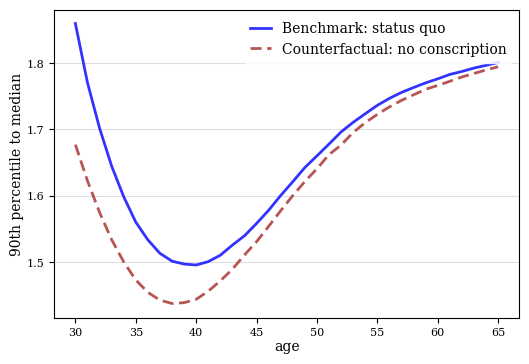

In [72]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","90/50"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=percentile.loc[percentile.counterfactual==0,:]
        ,label="Benchmark: status quo"
        ,linewidth=2
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","90/50"
        ,dashes= [4,2]
        ,data=percentile.loc[percentile.counterfactual==1,:]
        ,label="Counterfactual: no conscription"
        ,linewidth=2
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )
# 
ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("90th percentile to median",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/no_conscription_90_median.pdf", bbox_inches='tight')


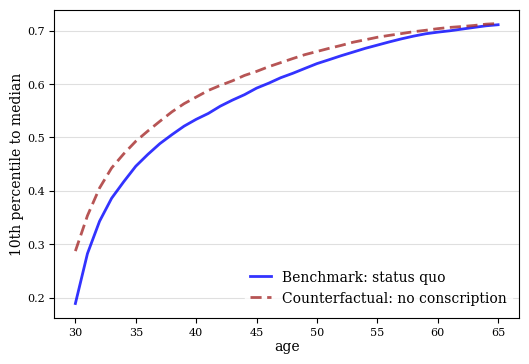

In [73]:
#******************************************
fig= plt.figure(figsize=(6,4))

fSize = 10
tSize = 8
# for Type in [1,2,3,4]:
ax1=fig.add_subplot(1,1,1)

# for index,mil in enumerate(["group one: participate", "group two: Do not participate"]):    
ax1.plot("age","10/50"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=percentile.loc[percentile.counterfactual==0,:]
        ,label="Benchmark: status quo"
        ,linewidth=2
        ,alpha=0.8
        ,color = "blue" #(0,0,0,0.6)
        )

ax1.plot("age","10/50"
        ,dashes= [4,2]
        ,data=percentile.loc[percentile.counterfactual==1,:]
        ,label="Counterfactual: no conscription"
        ,linewidth=2
        ,color = "brown"#(0,0,0,0.6)
        ,alpha=0.8
        )
# 
ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
ax1.set_ylabel("10th percentile to median",labelpad=2,fontsize=fSize)

# ax1.set_xlim(18,40)

props = dict(boxstyle='round', facecolor='w', alpha=0.4)

ax1.grid(axis='y',alpha=0.4)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=1.5,handleheight=1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(labelsize=tSize)
plt.show()
# fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/no_conscription_10_median.pdf", bbox_inches='tight')


In [74]:
# import seaborn as sns

# sns.distplot(sim.loc[(sim.age>=30)&(sim.counterfactual==0), "lifetime_income"], hist=False, label= "status que")

# sns.distplot(sim.loc[(sim.age>=30)&(sim.counterfactual==1), "lifetime_income"], hist=False, label= "counterfactual")

# import seaborn as sns

# sns.distplot(sim.loc[(sim.age>=30)&(sim.counterfactual==0)&(sim.income<1e9), "income"], hist=False, label= "status que")

# sns.distplot(sim.loc[(sim.age>=30)&(sim.counterfactual==1)&(sim.income<1e9), "income"], hist=False, label= "counterfactual")

## Decomposition

In [66]:
def lifetime_impact():
    diff1 = sim.loc[(sim.age>=16)&(sim.type==1)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
    diff2 = sim.loc[(sim.age>=16)&(sim.type==1)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

    diff = pd.merge(diff1,diff2,on=["age"])
    diff["type 1"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
    result = diff[["age","type 1"]]

    for tt in [2,3]:
        diff1 = sim.loc[(sim.type==tt)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()
        diff2 = sim.loc[(sim.type==tt)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"lifetime_income":"mean"}).reset_index()

        diff = pd.merge(diff1,diff2,on=["age"])
        diff[f"type {tt}"] = (diff.lifetime_income_x - diff.lifetime_income_y)/diff.lifetime_income_y
        result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])


    result.fillna(0, inplace=True)
    typeShare = sim.loc[(sim.age==50)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
    result["average"] = 0
    for i in [1,2,3]:
        result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]
        
    return result




In [67]:

sim = pd.read_csv(r"../simNew.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

result_benchmark = lifetime_impact()

In [68]:
sim = pd.read_csv(r"../sim_high_payment.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

result_high_payment = lifetime_impact()

In [69]:
sim = pd.read_csv(r"../sim_potential_experience.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

potential_experience = lifetime_impact()

In [70]:
sim = pd.read_csv(r"../sim_no_defer_incentive.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0
sim.sort_values(by=["id","age"],inplace=True)
sim["lifetime_income"] = sim.groupby(["id"])["income"].transform(pd.Series.cumsum)

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

no_defer_incentive = lifetime_impact()

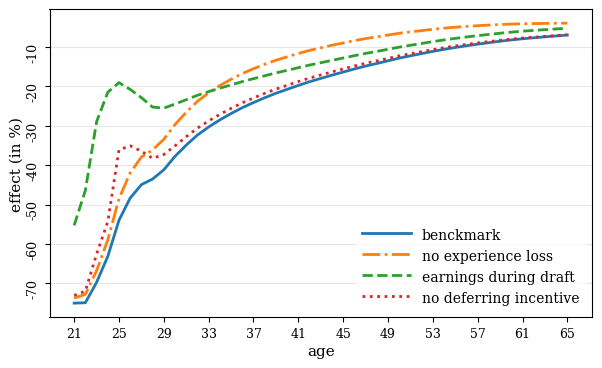

In [71]:

#******************************************
fig= plt.figure(figsize=(7,4))

fSize = 10
tSize = 8
ax1=fig.add_subplot(1,1,1)
aMax = 21
ax1.plot("age","average"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result_benchmark.loc[(result_benchmark.age>=aMax),:]
        ,label="benckmark"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))


ax1.plot("age","average", "-."
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=potential_experience.loc[(potential_experience.age>=aMax),:]
        ,label="no experience loss"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))

ax1.plot("age","average", "--"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result_high_payment.loc[(result_high_payment.age>=aMax),:]
        ,label="earnings during draft"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))

ax1.plot("age","average", ":"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=no_defer_incentive.loc[(no_defer_incentive.age>=aMax),:]
        ,label="no deferring incentive"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))


ax1.set_xlabel("age",labelpad=3,fontsize=fSize+1)
ax1.set_ylabel("effect (in %)",labelpad=2,fontsize=fSize+1)

# ax1.set_title("Effect of military service on lifetime income of conscripts")
ax1.set_xticks(np.arange(aMax,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)
ax1.grid(axis='y',alpha=0.3)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=3.5,handleheight=1)

# ax1.set_xlim(35,67)
# ax1.set_ylim(-0.3,0.01)

ax1.yaxis.set_tick_params(labelrotation=90)
formatter = FuncFormatter(to_percent)
ax1.yaxis.set_major_formatter(formatter)

ax1.tick_params(labelsize=tSize+1)
plt.show()


fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/decomposition.pdf", bbox_inches='tight')



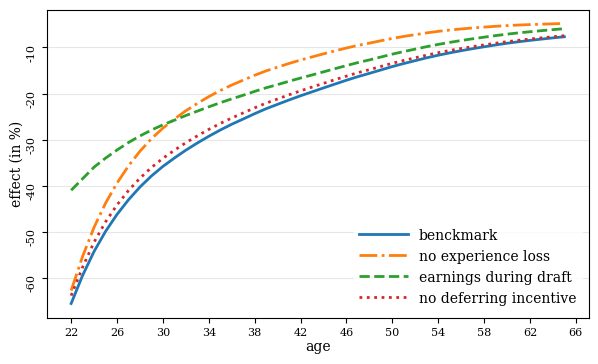

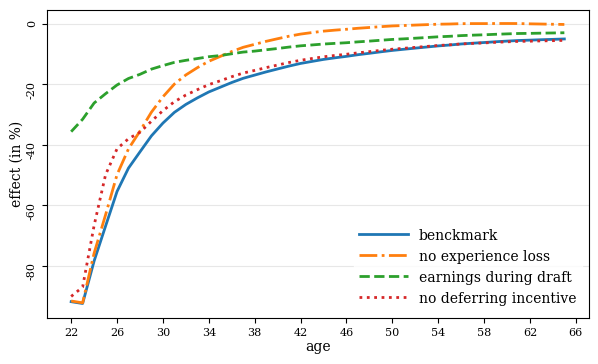

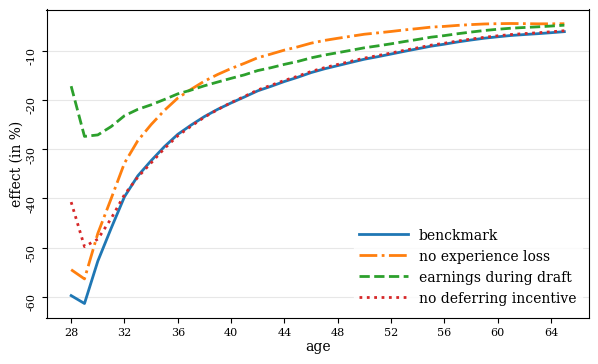

In [74]:

#******************************************

age_lim = [0,22,22,28]
title = ["(a)",
        "(b)",
        "(c)",
        "(d)"]
for TYPE in [1,2,3]:
    
    fig= plt.figure(figsize=(7,4))

    fSize = 10
    tSize = 8
    ax1=fig.add_subplot(1,1,1)
    
    ax1.plot("age",f"type {TYPE}"
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=result_benchmark.loc[(result_benchmark.age>=age_lim[TYPE]),:]
            ,label="benckmark"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))


    ax1.plot("age",f"type {TYPE}", "-."
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=potential_experience.loc[(potential_experience.age>=age_lim[TYPE]),:]
            ,label="no experience loss"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))
    ax1.plot("age",f"type {TYPE}", "--"
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=result_high_payment.loc[(result_high_payment.age>=age_lim[TYPE]),:]
            ,label="earnings during draft"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))

    ax1.plot("age",f"type {TYPE}", ":"
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=no_defer_incentive.loc[(no_defer_incentive.age>=age_lim[TYPE]),:]
            ,label="no deferring incentive"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))


    

    ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
    ax1.set_ylabel("effect (in %)",labelpad=2,fontsize=fSize)

#     ax1.set_title(f"{title[TYPE-1]} type {TYPE} lifetime earnings difference decomposition")
    ax1.set_xticks(np.arange(age_lim[TYPE],67,4))

    props = dict(boxstyle='round', facecolor='w', alpha=0.4)
    ax1.grid(axis='y',alpha=0.3)
    lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10} ,ncol=1,handlelength=3.5,handleheight=1)

    # ax1.set_xlim(35,67)
    # ax1.set_ylim(-0.3,0.01)
    ax1.yaxis.set_tick_params(labelrotation=90)
    formatter = FuncFormatter(to_percent)
    ax1.yaxis.set_major_formatter(formatter)

    ax1.tick_params(labelsize=tSize)
    plt.show()


    fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/decomposition_type{TYPE}.pdf", bbox_inches='tight')



In [75]:
def income_impact():
    diff1 = sim.loc[(sim.age>=16)&(sim.type==1)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
    diff2 = sim.loc[(sim.age>=16)&(sim.type==1)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

    diff = pd.merge(diff1,diff2,on=["age"])
    diff["type 1"] = (diff.income_x - diff.income_y)/diff.income_y
    result = diff[["age","type 1"]]

    for tt in [2,3]:
        diff1 = sim.loc[(sim.type==tt)&(sim.military=="group one: participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()
        diff2 = sim.loc[(sim.type==tt)&(sim.military=="group two: Do not participate"),].groupby(["age"]).agg({"income":"mean"}).reset_index()

        diff = pd.merge(diff1,diff2,on=["age"])
        diff[f"type {tt}"] = (diff.income_x - diff.income_y)/diff.income_y
        result = pd.merge(result,diff[["age",f"type {tt}"]],on=["age"])


    result.fillna(0, inplace=True)
    typeShare = sim.loc[(sim.age==50)&(sim.military=="group one: participate"),:].type.value_counts(normalize=True)
    result["average"] = 0
    for i in [1,2,3]:
        result["average"] = typeShare[i] * result[f"type {i}"] + result["average"]
        
    return result




In [76]:

sim = pd.read_csv(r"../simNew.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

result_benchmark2 = income_impact()

In [77]:
sim = pd.read_csv(r"../sim_high_payment.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

result_high_payment2 = income_impact()

In [78]:
sim = pd.read_csv(r"../sim_potential_experience.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

potential_experience2 = income_impact()

In [79]:
sim = pd.read_csv(r"../sim_no_defer_incentive.csv", header=None)
sim.columns = ["age","education","x3","x4","choice","income","educated","x5","type","Emax","choice_next","homeSinceSchool"] 
sim["id"] = sim.index // 50 + 1


sim.loc[(sim.income.isna()),"income"] = 0

sim["military"] = "group one: participate"
sim.loc[(sim.x5.isna()),"military"] = "group two: Do not participate"
sim = sim.astype({"military":"category"})

no_defer_incentive2 = income_impact()

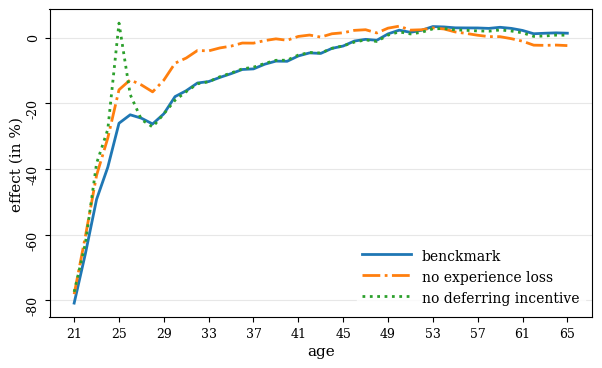

In [80]:

#******************************************
fig= plt.figure(figsize=(7,4))

fSize = 10
tSize = 8
ax1=fig.add_subplot(1,1,1)
aMax = 21
ax1.plot("age","average"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=result_benchmark2.loc[(result_benchmark2.age>=aMax),:]
        ,label="benckmark"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))


ax1.plot("age","average", "-."
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=potential_experience2.loc[(potential_experience2.age>=aMax),:]
        ,label="no experience loss"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))

# ax1.plot("age","average", "--"
# #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#         ,data=result_high_payment2.loc[(result_high_payment2.age>=aMax),:]
#         ,label="earnings during draft"
#         ,linewidth=2)
# #         ,color = (0,0,0,0.8))

ax1.plot("age","average", ":"
#         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
        ,data=no_defer_incentive2.loc[(no_defer_incentive2.age>=aMax),:]
        ,label="no deferring incentive"
        ,linewidth=2)
#         ,color = (0,0,0,0.8))




ax1.set_xlabel("age",labelpad=3,fontsize=fSize+1)
ax1.set_ylabel("effect (in %)",labelpad=2,fontsize=fSize+1)

# ax1.set_title("Effect of military service on lifetime income of conscripts")
ax1.set_xticks(np.arange(aMax,67,4))

props = dict(boxstyle='round', facecolor='w', alpha=0.4)
ax1.grid(axis='y',alpha=0.3)
lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
              ,ncol=1,handlelength=3.5,handleheight=1)

# ax1.set_xlim(35,67)
# ax1.set_ylim(-0.3,0.01)

ax1.yaxis.set_tick_params(labelrotation=90)
formatter = FuncFormatter(to_percent)
ax1.yaxis.set_major_formatter(formatter)

ax1.tick_params(labelsize=tSize+1)
plt.show()


fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/decomposition_income.pdf", bbox_inches='tight')



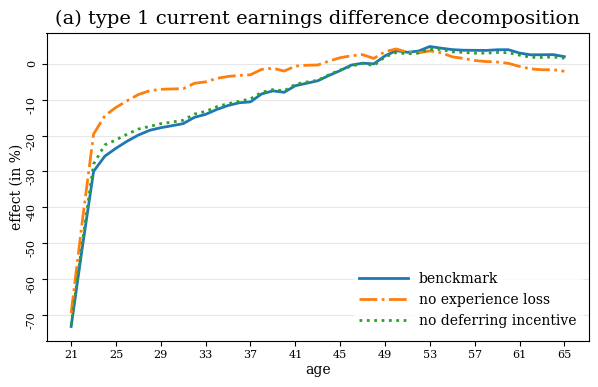

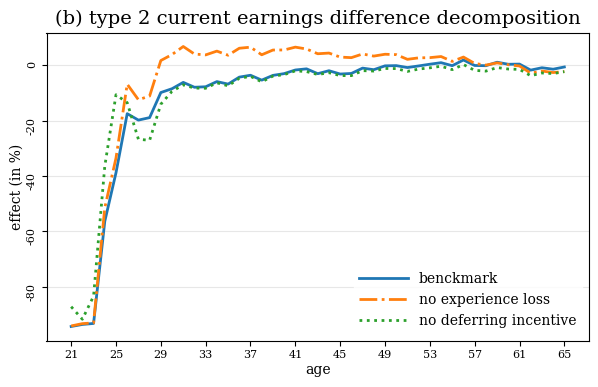

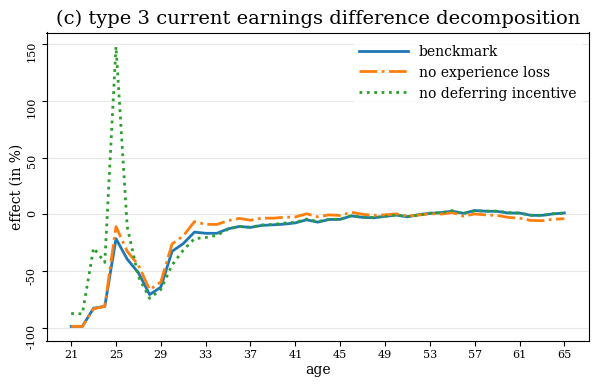

In [81]:

#******************************************

age_lim = 21
title = ["(a)",
        "(b)",
        "(c)",
        "(d)"]
for TYPE in [1,2,3]:
    
    fig= plt.figure(figsize=(7,4))

    fSize = 10
    tSize = 8
    ax1=fig.add_subplot(1,1,1)
    
    ax1.plot("age",f"type {TYPE}"
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=result_benchmark2.loc[(result_benchmark2.age>=age_lim),:]
            ,label="benckmark"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))


    ax1.plot("age",f"type {TYPE}", "-."
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=potential_experience2.loc[(potential_experience2.age>=age_lim),:]
            ,label="no experience loss"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))

    
#     ax1.plot("age",f"type {TYPE}", "--"
#     #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
#             ,data=result_high_payment2.loc[(result_high_payment2.age>=age_lim),:]
#             ,label="earnings during draft"
#             ,linewidth=2)
#     #         ,color = (0,0,0,0.8))
    
    ax1.plot("age",f"type {TYPE}", ":"
    #         ,dashes= [4,1] if mil=="group one: participate" else [1,0]
            ,data=no_defer_incentive2.loc[(no_defer_incentive2.age>=age_lim),:]
            ,label="no deferring incentive"
            ,linewidth=2)
    #         ,color = (0,0,0,0.8))



    ax1.set_xlabel("age",labelpad=2,fontsize=fSize)
    ax1.set_ylabel("effect (in %)",labelpad=2,fontsize=fSize)

    ax1.set_title(f"{title[TYPE-1]} type {TYPE} current earnings difference decomposition")
    ax1.set_xticks(np.arange(age_lim,67,4))

    props = dict(boxstyle='round', facecolor='w', alpha=0.4)
    ax1.grid(axis='y',alpha=0.3)
    lgd=ax1.legend(loc='best',edgecolor='w',prop={'size':10}
                  ,ncol=1,handlelength=3.5,handleheight=1)

    # ax1.set_xlim(35,67)
    # ax1.set_ylim(-0.3,0.01)
    ax1.yaxis.set_tick_params(labelrotation=90)
    formatter = FuncFormatter(to_percent) 
    ax1.yaxis.set_major_formatter(formatter)

    ax1.tick_params(labelsize=tSize)
    plt.show()


    fig.savefig(f"../../Reports/English version/Latex/Version6/Figures/decomposition_income_type{TYPE}.pdf", bbox_inches='tight')



In [8]:
# result = pd.DataFrame(np.zeros([5,1]))

# enum = 1

# for α51 in np.arange(14,16.001,0.1) :
#     for α52 in np.arange(14,16.001,0.1) :
        
#         data = pd.read_csv(f"/home/sabouri/Dropbox/Labor/Codes/Data analysis/Robustness/{enum}.csv")
    
#         result.loc[enum-1, "alpha51"] = α51
#         result.loc[enum-1, "alpha52"] = α52
        
        
#         result.loc[enum-1, "age25"] = data.loc[(data.age==25),"average"].values * 100
#         result.loc[enum-1, "age30"] = data.loc[(data.age==30),"average"].values * 100
#         result.loc[enum-1, "age35"] = data.loc[(data.age==35),"average"].values * 100
#         result.loc[enum-1, "age40"] = data.loc[(data.age==40),"average"].values * 100
#         result.loc[enum-1, "age45"] = data.loc[(data.age==45),"average"].values * 100
#         result.loc[enum-1, "age50"] = data.loc[(data.age==50),"average"].values * 100
#         result.loc[enum-1, "age55"] = data.loc[(data.age==55),"average"].values * 100

        
#         enum = enum + 1
        
        


# result

# from mpl_toolkits import mplot3d

# ax = plt.axes(projection='3d')


# ax.scatter3D(result["alpha51"], result["alpha52"], result["age35"], c=result["age35"]);

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# from mpl_toolkits.mplot3d import Axes3D

# from scipy.interpolate import griddata


# # 2D-arrays from DataFrame
# x1 = result["alpha51"] #np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
# y1 = result["alpha52"] #np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))

# """
# x, y via meshgrid for vectorized evaluation of
# 2 scalar/vector fields over 2-D grids, given
# one-dimensional coordinate arrays x1, x2,..., xn.
# """

# x2, y2 = np.meshgrid(x1, y1)

# # Interpolate unstructured D-dimensional data.
# z2 = griddata((result["alpha51"], result["alpha52"]), result["age35"], (x2, y2), method='cubic')

# # Ready to plot
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-0.05, 0.01)

# # ax.zaxis.set_major_locator(LinearLocator(10))
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Meshgrid Created from 3 1D Arrays')

# plt.show()

In [197]:
# # 2D-arrays from DataFrame
# x1 = result["alpha51"] #np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
# y1 = result["alpha52"] #np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))

# """
# x, y via meshgrid for vectorized evaluation of
# 2 scalar/vector fields over 2-D grids, given
# one-dimensional coordinate arrays x1, x2,..., xn.
# """

# x2, y2 = np.meshgrid(x1, y1)

# # Interpolate unstructured D-dimensional data.
# z2 = griddata((result["alpha51"], result["alpha52"]), result["age30"], (x2, y2), method='cubic')

# z3 = griddata((result["alpha51"], result["alpha52"]), result["age45"], (x2, y2), method='cubic')

# # Ready to plot
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_wireframe(x2, y2, z2)

# # surf2 = ax.plot_wireframe(x2, y2, z3)

# # ax.set_zlim(-0.05, 0.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# # ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


# # fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.title('Meshgrid Created from 3 1D Arrays')

# plt.show()

<br></br>
## Latex output 
<br></br>


In [149]:
# ω1T1 = 17.976650104928808
# ω1T2 = 17.394416493410194
# ω1T3 = 16.682086435181933
# α11 = -14.76275609241889
# α12 = 16.85557512959149
# α13 = 13.575751777665765
# α14 = 15.030185647409574
# ω2T1 = 17.73664705449791
# ω2T2 = 18.69350689327409
# ω2T3 = 18.845100092916386
# α21 = 17.986528992020723
# tc1T1 = 18.03091863294877
# tc2 = 17.870504962220423
# α22 = 0.0013300228480131503
# α23 = 0.11925513439049648
# α25 = 0.19438895479276255
# α30study = -14.155575071858737
# α3 = 16.007385137687777
# ω3T1 = 15.278424468389986
# ω3T2 = 14.520731215693877
# ω3T3 = 15.49531219560882
# α31 = 0.13255810152514091
# α32 = 0.07105854604797636
# α33 = 0.022095431061400696
# α34 = -0.0012898110123866892
# α35 = -0.0012247014174009657
# α36 = -0.09885497695354861
# α37 = 0.17808437166357896
# α38 = -0.032323353209471405
# ω4T1 = 17.227179189695196
# ω4T2 = 16.631200742305314
# ω4T3 = 16.466374321169333
# α41 = 0.03322414122357448
# α42 = 0.006737068911722317
# α43 = 0.08152835990498894
# α44 = -0.0040394107381991695
# α45 = -0.0020669663508598476
# α46 = 0.3741949247996808
# α47 = 0.1291201976579784
# α48 = 0.11060669835779854
# α50 = 13.514080014460028
# α51 = 15.909837053426203
# α52 = 17.428367336231638
# σ1 = 33.64845031380567
# σ2 = 31.451675175470932
# σ3 = 0.27605422080935854
# σ4 = 0.23676189791392824
# σ34 = -0.2549239790308403
# σ5 = 34.309641918424276
# πE1T1exp = 3.3307689284946043
# πE1T2exp = -0.31265658888454584
# πE2T1exp = 1.0374748635766653
# πE2T2exp = -0.40489875805661424 

ω1T1 = 18.024650104928806
ω1T2 = 17.955416493410194
ω1T3 = 16.682086435181933
α11 = -13.876990726873755
α12 = 16.906141854980262
α13 = 13.439994259889108
α14 = 15.631393073305958
ω2T1 = 17.74664705449791
ω2T2 = 18.69050689327409
ω2T3 = 18.925100092916384
α21 = 18.49033000084975
tc1T1 = 17.987726553207498
tc2 = 18.543449435462847
α22 = 0.013300228480131503
α23 = 0.11905513439049648
α25 = 0.08438895479276255
α30study = -16.70357858479331
α3 = 16.1132819429572
ω3T1 = 15.248424468389986
ω3T2 = 15.511731215693876
ω3T3 = 15.51531219560882
α31 = 0.13255810152514091
α32 = 0.06105854604797636
α33 = 0.0
α34 = -0.0013898110123866892
α35 = -0.0
α36 = 0.08685497695354862
α37 = 0.03808437166357896
α38 = -0.032323353209471405
ω4T1 = 17.227179189695196
ω4T2 = 17.181200742305315
ω4T3 = 16.466374321169333
α41 = 0.03322414122357448
α42 = 0.0
α43 = 0.07852835990498894
α44 = -0.0
α45 = -0.0016269663508598476
α46 = 0.0241949247996808
α47 = 0.0091201976579784
α48 = -0.01060669835779854
α50 = 13.414080014460028
α51 = 17.34172238823456
α52 = 17.085855794489937
σ1 = 33.64845031380567
σ2 = 31.451675175470932
σ3 = 0.27505422080935854
σ4 = 0.24676189791392825
σ34 = 0.0949239790308403
σ5 = 34.309641918424276
πE1T1exp = 1.9529055446411716
πE1T2exp = 0.43206799753598774
πE2T1exp = 1.2682546912249977
πE2T2exp = -0.08664928535073002 
π1T1 = 0.345
π1T2 = 0.386
π1T3 = 0.33499999999999996 


############################################
α21 = np.exp(α21)
tc1T1 = np.exp(tc1T1)
tc2 = np.exp(tc2)
α3 = np.exp(α3)
# α50 = np.exp(α50)
α51 = np.exp(α51)
α52 = np.exp(α52)
σ1 = np.sqrt(np.exp(σ1))
σ2 = np.sqrt(np.exp(σ2))
σ5 = np.sqrt(np.exp(σ5))
α11 = -np.exp(-α11)
α12 = np.exp(α12)
α13 = -np.exp(α13)
α30study = -np.exp(-α30study)
α14 = -np.exp(α14)
















α4 = 0.0  ;  # non pecuniary utility of blue-collar asssumed zero
# π1 = 0.78 ;  # share of individuals type 1

#= entry cost of without experience =#
tc1T2 = tc1T1
tc1T3 = tc1T1
tc1T4 = tc1T1
α24 = α22

πE1T1 = np.exp(πE1T1exp)/(np.exp(πE1T1exp)+np.exp(πE1T2exp)+1)
πE1T2 = np.exp(πE1T2exp)/(np.exp(πE1T1exp)+np.exp(πE1T2exp)+1)
πE1T3 = np.exp(0)/(np.exp(πE1T1exp)+np.exp(πE1T2exp)+1)
# πE1T4 = np.exp(0)/(np.exp(πE1T1exp)+np.exp(πE1T2exp)+np.exp(πE1T3exp)+1)

πE2T1 = np.exp(πE2T1exp)/(np.exp(πE2T1exp)+np.exp(πE2T2exp)+1)
πE2T2 = np.exp(πE2T2exp)/(np.exp(πE2T1exp)+np.exp(πE2T2exp)+1)
πE2T3 = np.exp(0)/(np.exp(πE2T1exp)+np.exp(πE2T2exp)+1)
# πE2T4 = np.exp(0)/(np.exp(πE2T1exp)+np.exp(πE2T2exp)+np.exp(πE2T3exp)+1)

# π1T1 = 0.66 #np.exp(π1T1exp) / (1+np.exp(π1T1exp))
# π1T2 = 0.66 #np.exp(π1T2exp) / (1+np.exp(π1T2exp))
# π1T3 = 0.66 #np.exp(π1T3exp) / (1+np.exp(π1T3exp))


In [150]:
# number 1# IsLog = 0 
# param ω1T1 = 17.8747044002149
ω1T1STD = 0.02235461825652825
 
# number 2# IsLog = 0 
# param ω1T2 = 17.422728453127
ω1T2STD = 0.08158664501525108
 
# number 3# IsLog = 0 
# param ω1T3 = 17.5332325345522
ω1T3STD = 0.06772586159367786
 
# number 4# IsLog = 0 
# param ω1T4 = 17.1175952495459
ω1T4STD = 2.3267811458573893
 
# number 5# IsLog = 1 
# param α11 = -6.212133596958194e6
α11STD = 635711.8703521446
 
# number 6# IsLog = 1 
# param α12 = 1.8805663965332847e7
α12STD = 1.5468279492043345e6
 
# number 7# IsLog = 1 
# param α13 = 1.1999999999999998e6
α13STD = 80606.1981613819
 
# number 8# IsLog = 0 
# param ω2T1 = 17.3454935898828
ω2T1STD = 0.027244418766242427
 
# number 9# IsLog = 0 
# param ω2T2 = 17.366014672798
ω2T2STD = 0.07424930320532538
 
# number 10# IsLog = 0 
# param ω2T3 = 18.5269429685219
ω2T3STD = 0.05904826053543531
 
# number 11# IsLog = 0 
# param ω2T4 = 18.7331484305908
ω2T4STD = 0.028122071359461424
 
# number 12# IsLog = 1 
# param α21 = 3.242462357774061e7
α21STD = 1.5305981365890368e6
 
# number 13# IsLog = 1 
# param tc1T1 = 7.331607948911288e7
tc1T1STD = 4.766087317221161e6
 
# number 14# IsLog = 1 
# param tc2 = 4.724849194075963e7
tc2STD = 5.87291706346566e6
 
# number 15# IsLog = 0 
# param α22 = 0.048910713805525
α22STD = 0.0023068915879656256
 
# number 16# IsLog = 0 
# param α23 = 0.111562944212268
α23STD = 0.006964970785413282
 
# number 17# IsLog = 0 
# param α25 = 0.083688797122234
α25STD = 0.0062819969795039265
 
# number 18# IsLog = 1 
# param α30study = -9.21962756667815e6
α30studySTD = 1.4415614706750344e6
 
# number 19# IsLog = 1 
# param α3 = 6.918932557295612e6
α3STD = 1.3608046288968509e6
 
# number 20# IsLog = 0 
# param ω3T1 = 14.9839727769202
ω3T1STD = 0.03825518356960988
 
# number 21# IsLog = 0 
# param ω3T2 = 14.5252755583742
ω3T2STD = 0.07185411953522428
 
# number 22# IsLog = 0 
# param ω3T3 = 14.8088465196797
ω3T3STD = 0.04323504270131484
 
# number 23# IsLog = 0 
# param ω3T4 = 15.4923946172127
ω3T4STD = 0.02286219391957407
 
# number 24# IsLog = 0 
# param α31 = 0.129739471895675
α31STD = 0.001497892007143658
 
# number 25# IsLog = 0 
# param α32 = 0.060168029383846
α32STD = 0.0016772670232080872
 
# number 26# IsLog = 0 
# param α33 = 0.007925443228119
α33STD = 0.0010914975240728258
 
# number 27# IsLog = 0 
# param α34 = -0.001421113339762
α34STD = 6.912660375612005e-5
 
# number 28# IsLog = 0 
# param α35 = 0.000230880696367
α35STD = 7.842260613246552e-5
 
# number 29# IsLog = 0 
# param α36 = 0.15260879003679
α36STD = 0.01507495289220751
 
# number 30# IsLog = 0 
# param α37 = 0.051860006013373
α37STD = 0.017006247224022563
 
# number 31# IsLog = 0 
# param α38 = 0.188403461890001
α38STD = 0.010239888341348102
 
# number 32# IsLog = 0 
# param ω4T1 = 17.0997834873975
ω4T1STD = 0.015349443429179334
 
# number 33# IsLog = 0 
# param ω4T2 = 16.5982753771639
ω4T2STD = 0.039098231081844
 
# number 34# IsLog = 0 
# param ω4T3 = 16.439070631114
ω4T3STD = 0.043025329788970355
 
# number 35# IsLog = 0 
# param ω4T4 = 17.2889551614113
ω4T4STD = 0.025811701322617554
 
# number 36# IsLog = 0 
# param α41 = 0.032349103367534
α41STD = 0.0006975243872895501
 
# number 37# IsLog = 0 
# param α42 = 0.002930158692314
α42STD = 0.0012224846187371804
 
# number 38# IsLog = 0 
# param α43 = 0.080304467450714
α43STD = 0.0006900680721683236
 
# number 39# IsLog = 0 
# param α44 = -0.002511419090374
α44STD = 0.001004162957502528
 
# number 40# IsLog = 0 
# param α45 = -0.001445475248093
α45STD = 2.6412399768413686e-5
 
# number 41# IsLog = 0 
# param α46 = 0.179795860755897
α46STD = 0.02059027432986026
 
# number 42# IsLog = 0 
# param α47 = 0.018729390701114
α47STD = 0.011437274170555541
 
# number 43# IsLog = 0 
# param α48 = 0.03280674733535
α48STD = 0.004453683978121709
 
# number 44# IsLog = 0 
# param α50 = 14.7846125736221
α50STD = 2.503006269657717
 
# number 45# IsLog = 1 
# param α51 = 9.127066845638756e6
α51STD = 4.324080345582426e6
 
# number 46# IsLog = 1 
# param α52 = 4.1197806215317682e6
α52STD = 2.451973486827534e6
 
# number 47# IsLog = 1 
# param σ1 = 4.614892278882248e14
σ1STD = 5.436693068012062e13
 
# number 48# IsLog = 1 
# param σ2 = 3.807608240383308e13
σ2STD = 2.1517026411998703e13
 
# number 49# IsLog = 0 
# param σ3 = 0.528965571541719
σ3STD = 0.008194862596032288
 
# number 50# IsLog = 0 
# param σ4 = 0.324589106165297
σ4STD = 0.006085188840992972
 
# number 51# IsLog = 0 
# param σ34 = 0.169014662463028
σ34STD = 0.005420245117080799
 
# number 52# IsLog = 1 
# param σ5 = 9.133171050349131e13
σ5STD = 9.902669588898353e13
 
# number 53# IsLog = 0 
# param πE1T1 = 2.03877307807354
πE1T1STD = 0.023253404133209764
 
# number 54# IsLog = 0 
# param πE1T2 = 0.8415580346120438
πE1T2STD = 0.018481043790611027
 
# number 55# IsLog = 0 
# param πE1T3 = -0.5381137079539741
πE1T3STD = 0.006402425233889715
 
# number 56# IsLog = 0 
# param πE2T1 = 0.774920546597643
πE2T1STD = 0.01488785120934854
 
# number 57# IsLog = 0 
# param πE2T2 = -0.025921011706503776
πE2T2STD = 0.005057489851669785
 
# number 58# IsLog = 0 
# param πE2T3 = -0.3966425337620698
πE2T3STD = 0.009645775298860302
 
# number 59# IsLog = 0 
# param π1T1 = 1.6945216078914402
π1T1STD = 0.007880639735947582
 
# number 60# IsLog = 0 
# param π1T2 = 1.7771249886789906
π1T2STD = 0.022742624603168678
 
# number 61# IsLog = 0 
# param π1T3 = 1.734793593415739
π1T3STD = 0.0343181923323056
 
# number 62# IsLog = 0 
# param π1T4 = 1.7362951852597905
π1T4STD = 0.015438506710999231

In [151]:
def O(n):
    import math
    return math.floor(math.log10(n))

O(12)

1

In [152]:


tableParameters1 = f"""\\begin{{tabular}}{{lrlrlrl}}
\\hline\\hline
                            & \multicolumn{{2}}{{c}}{{White-collar}} & \multicolumn{{2}}{{c}}{{Blue-collar}} & \multicolumn{{2}}{{c}}{{Conscription}} \\\\
\\cline{{2-7}}
Education (linear term)             &{α31:.4f}        &({α31STD:.4f})    &{α41:.4f}       &({α41STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
Has BA degree                 &{α23:.4f}        &({α23STD:.4f})    &{α25:.4f}       &({α25STD:.4f})    &{α51/1e6:.3f}$\\times10^6$        &({α51STD/10**(O(α51STD)):.3f}$\\times10^{ {O(α51STD)} }$)              \\\\
Has high-school diploma               &\multicolumn{{4}}{{c}}{{{α22:.4f} ({α22STD:.4f})}}                         &{α52/1e6:.3f}$\\times10^6$        &({α52STD/10**(O(α52STD)):.3f}$\\times10^{ {O(α52STD)} }$)              \\\\
White-collar experience             &{α32:.4f}        &({α32STD:.4f})    &{α42:.4f}       &({α42STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
White-collar exp. squared           &{α34:.4f}        &({α34STD:.4f})    &{α44:.4f}       &({α44STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
Blue-collar exp.                    &{α33:.4f}        &({α33STD:.4f})    &{α43:.4f}       &({α43STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
Blue-collar exp. squared            &{α35:.4f}        &({α35STD:.4f})    &{α45:.4f}       &({α45STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\

No occupation-specific exp.         &{α36:.4f}        &({α36STD:.4f})    &{α46:.4f}       &({α46STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
No exp. $\\times$ university edu.            &{α37:.4f}        &({α37STD:.4f})    &{α47:.4f}       &({α47STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\
Different occp. in $a-1$            &{α38:.4f}        &({α38STD:.4f})    &{α48:.4f}       &({α48STD:.4f})    &\multicolumn{{2}}{{c}}{{...}}     \\\\


Constants:                  &                 &                  &                &                  &                 &                \\\\
\ \ \ \ Type 1                      &{ω3T1:.4f}       &({ω3T1STD:.4f})   &{ω4T1:.4f}      &({ω4T1STD:.4f})   &{α50:.4f}        &({α50STD:.4f})  \\\\
\ \ \ \ Type 2                      &{ω3T2:.4f}       &({ω3T2STD:.4f})   &{ω4T2:.4f}      &({ω4T2STD:.4f})   &\multicolumn{{2}}{{c}}{{...}}     \\\\
\ \ \ \ Type 3                      &{ω3T3:.4f}       &({ω3T3STD:.4f})   &{ω4T3:.4f}      &({ω4T3STD:.4f})   &\multicolumn{{2}}{{c}}{{...}}     \\\\
Error's Variance-Covariance         &                 &                  &                &                  &                 &                \\\\
\ \ \ \ White-collar                &{σ3:.4f}         &({σ3STD:.4f})     &\multicolumn{{2}}{{c}}{{...}}      &\multicolumn{{2}}{{c}}{{...}}     \\\\
\ \ \ \ Blue-collar                 &{σ34:.4f}        &({σ34STD:.4f})    &{σ4:.4f}        &({σ4STD:.4f})     & \multicolumn{{2}}{{c}}{{...}}    \\\\
\ \ \ \ Conscription                &\multicolumn{{2}}{{c}}{{...}}       &\multicolumn{{2}}{{c}}{{...}}      &{σ5/1e6:.3f}$\\times10^6$         &({σ5STD/10**(O(σ5STD)):.3f}$\\times10^{ {O(σ5STD)} }$)              \\\\
\\hline\\hline
\end{{tabular}}"""

print(tableParameters1)

with open("../../Reports/English version/Latex/Version6/Tables/tableParameters1.tex","w") as file:
    file.write(tableParameters1)


\begin{tabular}{lrlrlrl}
\hline\hline
                            & \multicolumn{2}{c}{White-collar} & \multicolumn{2}{c}{Blue-collar} & \multicolumn{2}{c}{Conscription} \\
\cline{2-7}
Education (linear term)             &0.1326        &(0.0015)    &0.0332       &(0.0007)    &\multicolumn{2}{c}{...}     \\
Has BA degree                 &0.1191        &(0.0070)    &0.0844       &(0.0063)    &33.995$\times10^6$        &(4.324$\times10^{6}$)              \\
Has high-school diploma               &\multicolumn{4}{c}{0.0133 (0.0023)}                         &26.320$\times10^6$        &(2.452$\times10^{6}$)              \\
White-collar experience             &0.0611        &(0.0017)    &0.0000       &(0.0012)    &\multicolumn{2}{c}{...}     \\
White-collar exp. squared           &-0.0014        &(0.0001)    &-0.0000       &(0.0010)    &\multicolumn{2}{c}{...}     \\
Blue-collar exp.                    &0.0000        &(0.0011)    &0.0785       &(0.0007)    &\multicolumn{2}{c}{...}     \\
Blue-

In [153]:


tableParameters2 = f"""\\begin{{tabular}}{{lrlrl}}
\\hline\\hline
                             & \multicolumn{{2}}{{c}}{{Study}} & \multicolumn{{2}}{{c}}{{Stay home}} \\\\
\\cline{{2-5}}
Cost of undergraduate education      &{tc1T1/1e6:.2f}$\\times10^6$    &({tc1T1STD/10**(O(tc1T1STD)):.3f}$\\times10^{ {O(tc1T1STD)} }$)                &\multicolumn{{2}}{{c}}{{...}}                       \\\\
Excess cost of graduate education &{tc2/1e6:.2f}$\\times10^6$      &({tc2STD/10**(O(tc2STD)):.3f}$\\times10^{ {O(tc2STD)} }$)                      &\multicolumn{{2}}{{c}}{{...}}                       \\\\
Cost of study reenty              &{α21/1e6:.2f}$\\times10^6$      &({α21STD/10**(O(α21STD)):.3f}$\\times10^{ {O(α21STD)} }$)                      &\multicolumn{{2}}{{c}}{{...}}                       \\\\

Age 18 or less                    &\multicolumn{{2}}{{c}}{{...}}                                                                                   &{α11/1e6:.2f}$\\times10^6$       &({α11STD/10**(O(α11STD)):.3f}$\\times10^{ {O(α11STD)} }$)                \\\\
Age 30 or above                   &{α30study/1e6:.2f}$\\times10^6$  &({α30studySTD/10**(O(α30studySTD)):.3f}$\\times10^{ {O(α30studySTD)} }$)       &\multicolumn{{2}}{{c}}{{...}}                \\\\
Age trend for 25-35               &\multicolumn{{2}}{{c}}{{...}}                                                                                    &{α13/1e6:.2f}$\\times10^6$       &({α13STD/10**(O(α13STD)):.3f}$\\times10^{ {O(α13STD)} }$)                \\\\

Has high-school diploma                &\multicolumn{{2}}{{c}}{{...}}                                                                                   &{α12/1e6:.2f}$\\times10^6$       &({α12STD/10**(O(α12STD)):.3f}$\\times10^{ {O(α12STD)} }$)                \\\\
Constants:                        &                                &                                                                               &                                 &                  \\\\
\ \ \ \ - type 1                    &{ω2T1:.4f}                      &({ω2T1STD:.4f})                                                                &{ω1T1:.4f}                       &({ω1T1STD:.4f})   \\\\
\ \ \ \ - type 2                    &{ω2T2:.4f}                      &({ω2T2STD:.4f})                                                                &{ω1T2:.4f}                       &({ω1T2STD:.4f})   \\\\
\ \ \ \ - type 3                    &{ω2T3:.4f}                      &({ω2T3STD:.4f})                                                                &{ω1T3:.4f}                       &({ω1T3STD:.4f})   \\\\

Error's Variance-Covariance       &{σ2/1e6:.3f}$\\times10^6$       &({σ2STD/10**(O(σ2STD)):.3f}$\\times10^{ {O(σ2STD)} }$)                         &{σ1/1e6:.3f}$\\times10^6$        &({σ1STD/10**(O(σ1STD)):.3f}$\\times10^{ {O(σ1STD)} }$)                \\\\
\\hline\\hline
\end{{tabular}}"""

print(tableParameters2)

with open("../../Reports/English version/Latex/Version6/Tables/tableParameters2.tex","w") as file:
    file.write(tableParameters2)


\begin{tabular}{lrlrl}
\hline\hline
                             & \multicolumn{2}{c}{Study} & \multicolumn{2}{c}{Stay home} \\
\cline{2-5}
Cost of undergraduate education      &64.86$\times10^6$    &(4.766$\times10^{6}$)                &\multicolumn{2}{c}{...}                       \\
Excess cost of graduate education &113.06$\times10^6$      &(5.873$\times10^{6}$)                      &\multicolumn{2}{c}{...}                       \\
Cost of study reenty              &107.21$\times10^6$      &(1.531$\times10^{6}$)                      &\multicolumn{2}{c}{...}                       \\

Age 18 or less                    &\multicolumn{2}{c}{...}                                                                                   &-1.06$\times10^6$       &(6.357$\times10^{5}$)                \\
Age 30 or above                   &-17.96$\times10^6$  &(1.442$\times10^{6}$)       &\multicolumn{2}{c}{...}                \\
Age trend for 25-35               &\multicolumn{2}{c}{...}              

In [154]:
tyShAv = sim.loc[(sim.age==16),:].type.value_counts(normalize=True)#[1]
tyShAv

type
1.000   0.682
2.000   0.165
3.000   0.153
Name: proportion, dtype: float64

In [163]:


tableParameters3 = f"""
\\begin{{tabular}}{{lrlrlrl}}
\\hline\\hline
                  & \\multicolumn{{2}}{{c}}{{Type 1}} & \\multicolumn{{2}}{{c}}{{Type 2}} & \\multicolumn{{2}}{{c}}{{Type 3}}  \\\\
\\cline{{2-7}}
Total share (\%)      &\\multicolumn{{2}}{{c}}{{{tyShAv[1]*100:.2f}}}   &\\multicolumn{{2}}{{c}}{{{tyShAv[2]*100:.2f}}} &\\multicolumn{{2}}{{c}}{{{tyShAv[3]*100:.2f}}} \\\\
Initial schooling  &              &                  &               &                  &               &             \\\\
- up to 9 years  &{πE1T1:.4f}    &({πE1T1STD:.4f})  &{πE1T2:.4f}    &({πE1T2STD:.4f})  &{πE1T3:.4f}    &(...)  \\\\
- 10 years          &{πE2T1:.4f}    &({πE2T1STD:.4f})  &{πE2T2:.4f}    &({πE2T2STD:.4f})  &{πE2T3:.4f}    &(...) \\\\
Share (\%) eligible for military service &              &                  &               &                  &               &             \\\\
          & {π1T1*100:.1f}    &(.)  &{π1T2*100:.1f}    &(.)  &{π1T3*100:.1f}    &(.) \\\\

\\hline\\hline
\\end{{tabular}}
"""

print(tableParameters3)

# Military share   &{π1T1:.4f}     &({π1T1STD:.4f})   &{π1T2:.4f}     &({π1T2STD:.4f})   &{π1T3:.4f}     &({π1T3STD:.4f})   &{π1T4:.4f}     &({π1T4STD:.4f})           \\\\

with open("../../Reports/English version/Latex/Version6/Tables/tableParameters3.tex","w") as file:
    file.write(tableParameters3)



\begin{tabular}{lrlrlrl}
\hline\hline
                  & \multicolumn{2}{c}{Type 1} & \multicolumn{2}{c}{Type 2} & \multicolumn{2}{c}{Type 3}  \\
\cline{2-7}
Total share (\%)      &\multicolumn{2}{c}{68.25}   &\multicolumn{2}{c}{16.49} &\multicolumn{2}{c}{15.26} \\
Initial schooling  &              &                  &               &                  &               &             \\
- up to 9 years  &0.7351    &(0.0233)  &0.1606    &(0.0185)  &0.1043    &(...)  \\
- 10 years          &0.6496    &(0.0149)  &0.1676    &(0.0051)  &0.1828    &(...) \\
Share (\%) eligible for military service &              &                  &               &                  &               &             \\
          & 34.5    &(.)  &38.6    &(.)  &33.5    &(.) \\

\hline\hline
\end{tabular}



In [82]:
a30 = sim.loc[(sim.age==30),:].groupby(["type"])["choice"].value_counts(normalize=True).unstack().reset_index().fillna(0)
a30 = a30.multiply(100)
print(a30)
a30 = a30.round(1)
a30 = a30.to_numpy()

a40 = sim.loc[(sim.age==40),:].groupby(["type"])["choice"].value_counts(normalize=True).unstack().reset_index().fillna(0)
a40 = a40.multiply(100)
print(a40)
a40 = a40.round(1)
a40 = a40.to_numpy()

a30All = sim.loc[(sim.age==30),:]["choice"].value_counts(normalize=True)
a30All
a40All = sim.loc[(sim.age==40),:]["choice"].value_counts(normalize=True)
a40All

choice    type  1.000  2.000  3.000  4.000  5.000
0      100.000 18.638  0.000  0.048 81.310  0.004
1      200.000 15.380  1.956 17.147 65.131  0.386
2      300.000  0.000 19.216 78.563  0.003  2.217
choice    type  1.000  2.000  3.000  4.000
0      100.000 14.190  0.000  0.071 85.739
1      200.000  8.384  0.021 15.735 75.859
2      300.000  0.027  2.989 96.968  0.017


choice
4.000   0.713
3.000   0.172
1.000   0.111
2.000   0.005
Name: proportion, dtype: float64

In [83]:

alternativeShare = f"""
\\begin{{tabular}}{{lc c c c}}
\\hline
\\hline
                             & All Types & Type 1 & Type 2 & Type 3 \\\\
\\cdashline{{2-5}}
Alternative share at age 30: &           &                   &        &        \\\\
Stay home                    &{a30All[1]*100:.1f}           &{a30[0][1]}        &{a30[1][1]}        &{a30[2][1]}        \\\\
Studying                     &{a30All[2]*100:.1f}           &{a30[0][2]}        &{a30[1][2]}        &{a30[2][2]}        \\\\
White-collar occupations     &{a30All[3]*100:.1f}           &{a30[0][3]}        &{a30[1][3]}        &{a30[2][3]}        \\\\
Blue-collar occupations      &{a30All[4]*100:.1f}           &{a30[0][4]}        &{a30[1][4]}        &{a30[2][4]}        \\\\
Conscriptions                &{a30All[5]*100:.1f}           &{a30[0][5]}        &{a30[1][5]}        &{a30[2][5]}        \\\\
Alternative share at age 40: &           &                  &        &        \\\\
\\cdashline{{2-5}}
Stay home                    &{a40All[1]*100:.1f}           &{a40[0][1]}        &{a40[1][1]}        &{a40[2][1]}        \\\\
Studying                     &{a40All[2]*100:.1f}           &{a40[0][2]}        &{a40[1][2]}        &{a40[2][2]}        \\\\
White-collar occupations     &{a40All[3]*100:.1f}           &{a40[0][3]}        &{a40[1][3]}        &{a40[2][3]}        \\\\
Blue-collar occupations      &{a40All[4]*100:.1f}           &{a40[0][4]}        &{a40[1][4]}        &{a40[2][4]}        \\\\
Conscriptions                &{0.0               }          &{0.0}              &{0.0}              &{0.0}        \\\\
\\hline
\\end{{tabular}}
"""

print(alternativeShare)

with open("../../Reports/English version/Latex/Version4/Tables/alternativeShare.tex","w") as file:
    file.write(alternativeShare)




\begin{tabular}{lc c c c}
\hline
\hline
                             & All Types & Type 1 & Type 2 & Type 3 \\
\cdashline{2-5}
Alternative share at age 30: &           &                   &        &        \\
Stay home                    &15.3           &18.6        &15.4        &0.0        \\
Studying                     &3.2           &0.0        &2.0        &19.2        \\
White-collar occupations     &14.6           &0.0        &17.1        &78.6        \\
Blue-collar occupations      &66.5           &81.3        &65.1        &0.0        \\
Conscriptions                &0.4           &0.0        &0.4        &2.2        \\
Alternative share at age 40: &           &                  &        &        \\
\cdashline{2-5}
Stay home                    &11.1           &14.2        &8.4        &0.0        \\
Studying                     &0.5           &0.0        &0.0        &3.0        \\
White-collar occupations     &17.2           &0.1        &15.7        &97.0        \\
Blue-collar oc

In [84]:
Emax16 = sim.loc[(sim.age==65),:].groupby(["educ16","military","type"]).agg({"lifetime_income":"mean"}).reset_index() 
Emax16.rename(columns={"lifetime_income":"Emax"}, inplace=True)
mean30 = sim.loc[(sim.age==60),:].groupby(["educ16","military","type"]).agg({"education":"mean","x3":"mean","x4":"mean"}).reset_index()

Emax16 = pd.merge(Emax16,mean30,on=["educ16","military","type"])
Emax16["Emax"] = np.log(Emax16.Emax)
Emax16 = Emax16.round(2)
# Emax16 = Emax16[["Emax","education","x3","x4"]]#.to_numpy()
EE = Emax16.to_numpy()

Emax16



KeyError: 'educ16'

In [ ]:
Emax16All = sim.loc[(sim.age==65),:].groupby(["educ16","military"]).agg(
    {"lifetime_income":"mean"}).reset_index() 
Emax16All.rename(columns={"lifetime_income":"Emax"}, inplace=True)

mean30All = sim.loc[(sim.age==60),:].groupby(["educ16","military"]).agg(
    {"education":"mean","x3":"mean","x4":"mean"}).reset_index()

Emax16All = pd.merge(Emax16All,mean30All,on=["educ16","military"])
Emax16All["Emax"] = np.log(Emax16All.Emax)
Emax16All = Emax16All.round(2)

EEAll = Emax16All.to_numpy()
Emax16All

,educ16,military,Emax,education,x3,x4
0,10 years,group one: participate,22.370,14.660,6.250,23.730
1,10 years,group two: Do not participate,22.450,13.920,6.820,23.770
2,9 years or less,group one: participate,22.190,11.260,3.560,25.540
3,9 years or less,group two: Do not participate,22.250,10.400,4.050,25.910


In [85]:

# typeDifferences = f"""
# \\begin{{tabular}}{{lccccc}}
# \\hline
# \\hline
#                                                                                                  & \\multicolumn{{1}}{{c}}{{All Types}} & \\multicolumn{{1}}{{c}}{{Type 1}} & \\multicolumn{{1}}{{c}}{{Type 2}} & \\multicolumn{{1}}{{c}}{{Type 3}} & \\multicolumn{{1}}{{c}}{{Type 4}} \\\\
# \\cdashline{{2-6}}
#                                                                                                  & \\multicolumn{{5}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}High initial schooling\\\\ Military group: have to participate conscription\\end{{tabular}}}}              \\\\
# \\hline
# \\begin{{tabular}}[c]{{@{{}}l@{{}}}}Log lifetime income at age 65 \\end{{tabular}} &{EEAll[0,2]}                   &{EE[0,3]}                   &{EE[1,3]}                   &{EE[2,3]}                   &{EE[3,3]}                   \\\\
# Years of schooling                                                                                             &{EEAll[0,3]}                   &{EE[0,4]}                   &{EE[1,4]}                   &{EE[2,4]}                   &{EE[3,4]}                   \\\\
# White-collar experience                                                                                        &{EEAll[0,4]}                   &{EE[0,5]}                   &{EE[1,5]}                   &{EE[2,5]}                   &{EE[3,5]}                   \\\\
# Blue-collar experience                                                                                         &{EEAll[0,5]}                   &{EE[0,6]}                   &{EE[1,6]}                   &{EE[2,6]}                   &{EE[3,6]}                   \\\\
#                                                                                                  & \\multicolumn{{5}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}High initial schooling\\\\ Non military group: do not have to participate conscription\\end{{tabular}}}}              \\\\
# \\hline
# \\begin{{tabular}}[c]{{@{{}}l@{{}}}}Log lifetime income at age 65 \\end{{tabular}} &{EEAll[1,2]}                   &{EE[4,3]}                   &{EE[5,3]}                   &{EE[6,3]}                   &{EE[7,3]}                   \\\\
# Years of schooling                                                                                             &{EEAll[1,3]}                   &{EE[4,4]}                   &{EE[5,4]}                   &{EE[6,4]}                   &{EE[7,4]}                   \\\\
# White-collar experience                                                                                        &{EEAll[1,4]}                   &{EE[4,5]}                   &{EE[5,5]}                   &{EE[6,5]}                   &{EE[7,5]}                   \\\\
# Blue-collar experience                                                                                         &{EEAll[1,5]}                   &{EE[4,6]}                   &{EE[5,6]}                   &{EE[6,6]}                   &{EE[7,6]}                   \\\\
#                                                                                                  & \\multicolumn{{5}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Low initial schooling\\\\ Military group: have to participate conscription\\end{{tabular}}}}              \\\\
# \\hline
# \\begin{{tabular}}[c]{{@{{}}l@{{}}}}Log lifetime income at age 65 \\end{{tabular}} &{EEAll[2,2]}                   &{EE[8,3]}                   &{EE[9,3]}                   &{EE[10,3]}                   &{EE[11,3]}                   \\\\
# Years of schooling                                                                                             &{EEAll[2,3]}                   &{EE[8,4]}                   &{EE[9,4]}                   &{EE[10,4]}                   &{EE[11,4]}                   \\\\
# White-collar experience                                                                                        &{EEAll[2,4]}                   &{EE[8,5]}                   &{EE[9,5]}                   &{EE[10,5]}                   &{EE[11,5]}                   \\\\
# Blue-collar experience                                                                                         &{EEAll[2,5]}                   &{EE[8,6]}                   &{EE[9,6]}                   &{EE[10,6]}                   &{EE[11,6]}                   \\\\
#                                                                                                  & \\multicolumn{{5}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Low initial schooling\\\\ Non military group: do not have to participate conscription\\end{{tabular}}}}              \\\\
# \\hline
# \\begin{{tabular}}[c]{{@{{}}l@{{}}}}Log lifetime income at age 65 \\end{{tabular}} &{EEAll[3,2]}                   &{EE[12,3]}                   &{EE[13,3]}                   &{EE[14,3]}                   &{EE[15,3]}                   \\\\
# Years of schooling                                                                                             &{EEAll[3,3]}                   &{EE[12,4]}                   &{EE[13,4]}                   &{EE[14,4]}                   &{EE[15,4]}                   \\\\
# White-collar experience                                                                                        &{EEAll[3,4]}                   &{EE[12,5]}                   &{EE[13,5]}                   &{EE[14,5]}                   &{EE[15,5]}                   \\\\
# Blue-collar experience                                                                                         &{EEAll[3,5]}                   &{EE[12,6]}                   &{EE[13,6]}                   &{EE[14,6]}                   &{EE[15,6]}                   \\\\
# \\hline
# \\hline
# \\end{{tabular}}
# """

# print(typeDifferences)

# # with open("/home/sabouri/Dropbox/Labor/Reports/English version/Latex/Version4/Tables/typeDifferences.tex","w") as file:
# #     file.write(typeDifferences)


### table

In [122]:
sim.head()

,age,education,x3,x4,choice,income,educated,x5,type,Emax,choice_next,homeSinceSchool,id,lifetime_income,log_lifetime_income,military,education_16,educ16
0,16.000,11.000,0.000,0.000,2.000,0.000,-1.000,NaN,1.000,1041275593.315,4.000,0.000,0,0.000,-inf,group two: Do not participate,11.000,10 years
1,17.000,11.000,0.000,1.000,4.000,69648341.571,-1.000,NaN,1.000,1082679126.491,1.000,0.000,0,69648341.571,18.059,group two: Do not participate,11.000,10 years
2,18.000,11.000,0.000,1.000,1.000,0.000,-1.000,NaN,1.000,1097437047.606,4.000,0.000,0,69648341.571,18.059,group two: Do not participate,11.000,10 years
3,19.000,11.000,0.000,2.000,4.000,52899272.710,-1.000,NaN,1.000,1092307021.777,4.000,0.000,0,122547614.282,18.624,group two: Do not participate,11.000,10 years
4,20.000,11.000,0.000,3.000,4.000,73683691.289,-1.000,NaN,1.000,1143212056.880,4.000,0.000,0,196231305.570,19.095,group two: Do not participate,11.000,10 years


In [123]:
# from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ttest_ind

sim["diploma"] = 0
sim.loc[(sim.education>=12),"diploma"] = 1

sim["bachelor"] = 0
sim.loc[(sim.education>=16),"bachelor"] = 1

In [124]:
age=60
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"education":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"education":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["Difference"] = table.educationGoing - table.educationNotGoing

table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"education"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"education"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
educ = table.to_numpy()


   type  educationGoing  educationNotGoing  Difference pvalue
0 1.000          10.762              9.641       1.120    ***
1 2.000          15.985             15.961       0.024    ***
2 3.000          21.983             21.989      -0.006    ***


In [125]:
age=60
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"diploma":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"diploma":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["Difference"] = table.diplomaGoing - table.diplomaNotGoing
table["diplomaGoing"] = table["diplomaGoing"] * 100
table["diplomaNotGoing"] = table["diplomaNotGoing"] * 100
table["Difference"] = table["Difference"] * 100

table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"diploma"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"diploma"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
dipl = table.to_numpy()


   type  diplomaGoing  diplomaNotGoing  Difference pvalue
0 1.000        56.284           25.130      31.154    ***
1 2.000       100.000          100.000       0.000       
2 3.000       100.000          100.000       0.000       


In [126]:
age=60
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"bachelor":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"bachelor":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["Difference"] = table.bachelorGoing - table.bachelorNotGoing
table["bachelorGoing"] = table["bachelorGoing"] * 100
table["bachelorNotGoing"] = table["bachelorNotGoing"] * 100
table["Difference"] = table["Difference"] * 100

table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"bachelor"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"bachelor"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
bach = table.to_numpy()


   type  bachelorGoing  bachelorNotGoing  Difference pvalue
0 1.000          0.000             0.000       0.000       
1 2.000         99.309            98.499       0.810    ***
2 3.000        100.000           100.000       0.000       


In [127]:
age=35
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["incomeGoing"]    = np.log(table["incomeGoing"])
table["incomeNotGoing"] = np.log(table["incomeNotGoing"] )
table["Difference"] = table.incomeGoing - table.incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
in35 = table.to_numpy()


   type  incomeGoing  incomeNotGoing  Difference pvalue
0 1.000       18.234          18.358      -0.124    ***
1 2.000       18.370          18.441      -0.071    ***
2 3.000       18.835          18.972      -0.137    ***


In [128]:
age=45
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["incomeGoing"]    = np.log(table["incomeGoing"])
table["incomeNotGoing"] = np.log(table["incomeNotGoing"] )
table["Difference"] = table.incomeGoing - table.incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
in45 = table.to_numpy()


   type  incomeGoing  incomeNotGoing  Difference pvalue
0 1.000       18.528          18.547      -0.019    ***
1 2.000       18.709          18.741      -0.032    ***
2 3.000       19.268          19.314      -0.046    ***


In [129]:
age=55
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["incomeGoing"]    = np.log(table["incomeGoing"])
table["incomeNotGoing"] = np.log(table["incomeNotGoing"] )
table["Difference"] = table.incomeGoing - table.incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
in55 = table.to_numpy()


   type  incomeGoing  incomeNotGoing  Difference pvalue
0 1.000       18.566          18.527       0.039    ***
1 2.000       18.842          18.844      -0.002       
2 3.000       19.362          19.335       0.027    ***


In [130]:

# resultTable = f"""
# \\begin{{tabular}}{{lccc|ccc|ccc|ccc}}
# \\hline
# \\hline \\\\
#                            & \\multicolumn{{3}}{{c}}{{Type 1}}                                                                                                                                             & \\multicolumn{{3}}{{c}}{{Type 2}}                                                                                                                                             & \\multicolumn{{3}}{{c}}{{Type 3}}                                                                                                                                             & \\multicolumn{{3}}{{c}}{{Type 4}}                                                                                                                                                    \\\\
#                            & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Non military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Non military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Non military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}Non military\\\\ group\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} \\\\
# \\cline{{2-13}} \\\\
# Years of education         &{educ[0,1]:.2f}                                                          &{educ[0,2]:.2f}                                                          &{educ[0,3]:.2f}$^{{{educ[0,4]}}}$ &{educ[1,1]:.2f}                                                          &{educ[1,2]:.2f}                                                          &{educ[1,3]:.2f}$^{{{educ[1,4]}}}$ &{educ[2,1]:.2f}                                                          &{educ[2,2]:.2f}                                                          &{educ[2,3]:.2f}$^{{{educ[2,4]}}}$ &{educ[3,1]:.2f}                                                          &{educ[3,2]:.2f}                                                          &{educ[3,3]:.2f}$^{{{educ[3,4]}}}$                           \\\\
# High school graduate       &{dipl[0,1]:.1f}                                                          &{dipl[0,2]:.1f}                                                          &{dipl[0,3]:.1f}$^{{{dipl[0,4]}}}$ &{dipl[1,1]:.1f}                                                          &{dipl[1,2]:.1f}                                                          &{dipl[1,3]:.1f}$^{{{dipl[1,4]}}}$ &{dipl[2,1]:.1f}                                                          &{dipl[2,2]:.1f}                                                          &{dipl[2,3]:.1f}$^{{{dipl[2,4]}}}$ &{dipl[3,1]:.1f}                                                          &{dipl[3,2]:.1f}                                                          &{dipl[3,3]:.1f}$^{{{dipl[3,4]}}}$                           \\\\
# College graduate           &{bach[0,1]:.1f}                                                          &{bach[0,2]:.1f}                                                          &{bach[0,3]:.1f}$^{{{bach[0,4]}}}$ &{bach[1,1]:.1f}                                                          &{bach[1,2]:.1f}                                                          &{bach[1,3]:.1f}$^{{{bach[1,4]}}}$ &{bach[2,1]:.1f}                                                          &{bach[2,2]:.1f}                                                          &{bach[2,3]:.1f}$^{{{bach[2,4]}}}$ &{bach[3,1]:.1f}                                                          &{bach[3,2]:.1f}                                                          &{bach[3,3]:.1f}$^{{{bach[3,4]}}}$                           \\\\
# log mean yearly income at: &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                           \\\\
# age 35                     &{in35[0,1]:.2f}                                                          &{in35[0,2]:.2f}                                                          &{in35[0,3]:.2f}$^{{{in35[0,4]}}}$ &{in35[1,1]:.2f}                                                          &{in35[1,2]:.2f}                                                          &{in35[1,3]:.2f}$^{{{in35[1,4]}}}$ &{in35[2,1]:.2f}                                                          &{in35[2,2]:.2f}                                                          &{in35[2,3]:.2f}$^{{{in35[2,4]}}}$ &{in35[3,1]:.2f}                                                          &{in35[3,2]:.2f}                                                          &{in35[3,3]:.2f}$^{{{in35[3,4]}}}$                           \\\\
# age 45                     &{in45[0,1]:.2f}                                                          &{in45[0,2]:.2f}                                                          &{in45[0,3]:.2f}$^{{{in45[0,4]}}}$ &{in45[1,1]:.2f}                                                          &{in45[1,2]:.2f}                                                          &{in45[1,3]:.2f}$^{{{in45[1,4]}}}$ &{in45[2,1]:.2f}                                                          &{in45[2,2]:.2f}                                                          &{in45[2,3]:.2f}$^{{{in45[2,4]}}}$ &{in45[3,1]:.2f}                                                          &{in45[3,2]:.2f}                                                          &{in45[3,3]:.2f}$^{{{in45[3,4]}}}$                           \\\\
# age 55                     &{in55[0,1]:.2f}                                                          &{in55[0,2]:.2f}                                                          &{in55[0,3]:.2f}$^{{{in55[0,4]}}}$ &{in55[1,1]:.2f}                                                          &{in55[1,2]:.2f}                                                          &{in55[1,3]:.2f}$^{{{in55[1,4]}}}$ &{in55[2,1]:.2f}                                                          &{in55[2,2]:.2f}                                                          &{in55[2,3]:.2f}$^{{{in55[2,4]}}}$ &{in55[3,1]:.2f}                                                          &{in55[3,2]:.2f}                                                          &{in55[3,3]:.2f}$^{{{in55[3,4]}}}$                           \\\\
# \\\\ \\hline \\hline
# \\end{{tabular}}
# """

# print(resultTable)


# # with open("/home/sabouri/Dropbox/Labor/Reports/English version/Latex/Version4/Tables/resultTable.tex","w") as file:
# #     file.write(resultTable)

In [131]:
age=35
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["lifetime_incomeGoing"]    = np.log(table["lifetime_incomeGoing"])
table["lifetime_incomeNotGoing"] = np.log(table["lifetime_incomeNotGoing"] )
table["Difference"] = table.lifetime_incomeGoing - table.lifetime_incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"lifetime_income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"lifetime_income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
lt35 = table.to_numpy()


   type  lifetime_incomeGoing  lifetime_incomeNotGoing  Difference pvalue
0 1.000                20.593                   20.921      -0.328    ***
1 2.000                20.514                   20.749      -0.236    ***
2 3.000                20.544                   20.893      -0.349    ***


In [132]:
age=45
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["lifetime_incomeGoing"]    = np.log(table["lifetime_incomeGoing"])
table["lifetime_incomeNotGoing"] = np.log(table["lifetime_incomeNotGoing"] )
table["Difference"] = table.lifetime_incomeGoing - table.lifetime_incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"lifetime_income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"lifetime_income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
lt45 = table.to_numpy()


   type  lifetime_incomeGoing  lifetime_incomeNotGoing  Difference pvalue
0 1.000                21.352                   21.550      -0.198    ***
1 2.000                21.413                   21.533      -0.119    ***
2 3.000                21.764                   21.931      -0.167    ***


In [133]:
age=55
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"lifetime_income":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["lifetime_incomeGoing"]    = np.log(table["lifetime_incomeGoing"])
table["lifetime_incomeNotGoing"] = np.log(table["lifetime_incomeNotGoing"] )
table["Difference"] = table.lifetime_incomeGoing - table.lifetime_incomeNotGoing


table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"lifetime_income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"lifetime_income"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
lt55 = table.to_numpy()


   type  lifetime_incomeGoing  lifetime_incomeNotGoing  Difference pvalue
0 1.000                21.832                   21.951      -0.119    ***
1 2.000                21.965                   22.038      -0.073    ***
2 3.000                22.400                   22.495      -0.095    ***


In [134]:
age=60
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"x3":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"x3":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["Difference"] = table.x3Going - table.x3NotGoing

table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"x3"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"x3"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
x3 = table.to_numpy()


   type  x3Going  x3NotGoing  Difference pvalue
0 1.000    0.055       0.042       0.013    ***
1 2.000    4.956       6.912      -1.957    ***
2 3.000   29.313      29.701      -0.388    ***


In [135]:
age=60
table1 = sim.loc[(sim.age==age)
                 &(sim.military=="group one: participate")
                 ,:].groupby(["type"]).agg({"x4":"mean"}).reset_index()
table2 = sim.loc[(sim.age==age)
                 &(sim.military=="group two: Do not participate")
                 ,:].groupby(["type"]).agg({"x4":"mean"}).reset_index()

# table["income"] = np.log(table.income)
table = pd.merge(table1, table2, on=["type"],suffixes=["Going","NotGoing"])

table["Difference"] = table.x4Going - table.x4NotGoing

table["pvalue"] = np.nan
for Type in [1,2,3,4]:
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"x4"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"x4"]
    stat, pvalue, dpvaluef = ttest_ind(a, b, weights=(None,None))
    if np.isnan(pvalue) :
        pValue = 0
    if   pvalue < 0.01 :
        string = "***"
    elif pvalue < 0.05 :
        string = "**"
    elif pvalue < 0.1  :
        string = "*"
    else:
        string = ""
        
    table.loc[(table.type==Type),"pvalue"] = string
#     print(f"Type {Type} ",pvalue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")    
    
print(table)
x4 = table.to_numpy()


   type  x4Going  x4NotGoing  Difference pvalue
0 1.000   29.172      29.868      -0.696    ***
1 2.000   26.485      26.001       0.484    ***
2 3.000    0.012       0.017      -0.005     **


In [137]:

resultTable = f"""
\\begin{{tabular}}{{lccc|ccc|ccc}}
\\hline
\\hline \\\\
                           & \\multicolumn{{3}}{{c}}{{Type 1}}                                                                                                                                             & \\multicolumn{{3}}{{c}}{{Type 2}}                                                                                                                                             & \\multicolumn{{3}}{{c}}{{Type 3}}                                                                                                                                                   \\\\
                           & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}with\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}without\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}with\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}without\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}with\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{\\begin{{tabular}}[c]{{@{{}}c@{{}}}}without\\\\ conscription\\end{{tabular}}}} & \\multicolumn{{1}}{{c}}{{diff.}} \\\\
\\cline{{2-9}} \\\\
Years of education         &{educ[0,1]:.2f}                                                          &{educ[0,2]:.2f}                                                          &{educ[0,3]:.2f}$^{{{educ[0,4]}}}$ &{educ[1,1]:.2f}                                                          &{educ[1,2]:.2f}                                                          &{educ[1,3]:.2f}$^{{{educ[1,4]}}}$ &{educ[2,1]:.2f}                                                          &{educ[2,2]:.2f}                                                          &{educ[2,3]:.2f}$^{{{educ[2,4]}}}$ \\\\
High school graduate       &{dipl[0,1]:.1f}                                                          &{dipl[0,2]:.1f}                                                          &{dipl[0,3]:.1f}$^{{{dipl[0,4]}}}$ &{dipl[1,1]:.1f}                                                          &{dipl[1,2]:.1f}                                                          &{dipl[1,3]:.1f}$^{{{dipl[1,4]}}}$ &{dipl[2,1]:.1f}                                                          &{dipl[2,2]:.1f}                                                          &{dipl[2,3]:.1f}$^{{{dipl[2,4]}}}$ \\\\
College graduate           &{bach[0,1]:.1f}                                                          &{bach[0,2]:.1f}                                                          &{bach[0,3]:.1f}$^{{{bach[0,4]}}}$ &{bach[1,1]:.1f}                                                          &{bach[1,2]:.1f}                                                          &{bach[1,3]:.1f}$^{{{bach[1,4]}}}$ &{bach[2,1]:.1f}                                                          &{bach[2,2]:.1f}                                                          &{bach[2,3]:.1f}$^{{{bach[2,4]}}}$ \\\\
\\\\[0.1mm] 
White-collar experience           &{x3[0,1]:.1f}                                                          &{x3[0,2]:.1f}                                                          &{x3[0,3]:.1f}$^{{{x3[0,4]}}}$ &{x3[1,1]:.1f}                                                          &{x3[1,2]:.1f}                                                          &{x3[1,3]:.1f}$^{{{x3[1,4]}}}$ &{x3[2,1]:.1f}                                                          &{x3[2,2]:.1f}                                                          &{x3[2,3]:.1f}$^{{{x3[2,4]}}}$ \\\\
Blue-collar experience           &{x4[0,1]:.1f}                                                          &{x4[0,2]:.1f}                                                          &{x4[0,3]:.1f}$^{{{x4[0,4]}}}$ &{x4[1,1]:.1f}                                                          &{x4[1,2]:.1f}                                                          &{x4[1,3]:.1f}$^{{{x4[1,4]}}}$ &{x4[2,1]:.1f}                                                          &{x4[2,2]:.1f}                                                          &{x4[2,3]:.1f}$^{{{x4[2,4]}}}$ \\\\
\\\\[0.1mm] 
log mean yearly income at: &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                                  \\\\
age 35                     &{in35[0,1]:.2f}                                                          &{in35[0,2]:.2f}                                                          &{in35[0,3]:.2f}$^{{{in35[0,4]}}}$ &{in35[1,1]:.2f}                                                          &{in35[1,2]:.2f}                                                          &{in35[1,3]:.2f}$^{{{in35[1,4]}}}$ &{in35[2,1]:.2f}                                                          &{in35[2,2]:.2f}                                                          &{in35[2,3]:.2f}$^{{{in35[2,4]}}}$ \\\\
age 45                     &{in45[0,1]:.2f}                                                          &{in45[0,2]:.2f}                                                          &{in45[0,3]:.2f}$^{{{in45[0,4]}}}$ &{in45[1,1]:.2f}                                                          &{in45[1,2]:.2f}                                                          &{in45[1,3]:.2f}$^{{{in45[1,4]}}}$ &{in45[2,1]:.2f}                                                          &{in45[2,2]:.2f}                                                          &{in45[2,3]:.2f}$^{{{in45[2,4]}}}$ \\\\
age 55                     &{in55[0,1]:.2f}                                                          &{in55[0,2]:.2f}                                                          &{in55[0,3]:.2f}$^{{{in55[0,4]}}}$ &{in55[1,1]:.2f}                                                          &{in55[1,2]:.2f}                                                          &{in55[1,3]:.2f}$^{{{in55[1,4]}}}$ &{in55[2,1]:.2f}                                                          &{in55[2,2]:.2f}                                                          &{in55[2,3]:.2f}$^{{{in55[2,4]}}}$ \\\\
\\\\[0.1mm] log mean lifetime income at: &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                                  &                                                                         &                                                                         &                    \\\\
age 35                     &{lt35[0,1]:.2f}                                                          &{lt35[0,2]:.2f}                                                          &{lt35[0,3]:.2f}$^{{{lt35[0,4]}}}$ &{lt35[1,1]:.2f}                                                          &{lt35[1,2]:.2f}                                                          &{lt35[1,3]:.2f}$^{{{lt35[1,4]}}}$ &{lt35[2,1]:.2f}                                                          &{lt35[2,2]:.2f}                                                          &{lt35[2,3]:.2f}$^{{{lt35[2,4]}}}$ \\\\
age 45                     &{lt45[0,1]:.2f}                                                          &{lt45[0,2]:.2f}                                                          &{lt45[0,3]:.2f}$^{{{lt45[0,4]}}}$ &{lt45[1,1]:.2f}                                                          &{lt45[1,2]:.2f}                                                          &{lt45[1,3]:.2f}$^{{{lt45[1,4]}}}$ &{lt45[2,1]:.2f}                                                          &{lt45[2,2]:.2f}                                                          &{lt45[2,3]:.2f}$^{{{lt45[2,4]}}}$ \\\\
age 55                     &{lt55[0,1]:.2f}                                                          &{lt55[0,2]:.2f}                                                          &{lt55[0,3]:.2f}$^{{{lt55[0,4]}}}$ &{lt55[1,1]:.2f}                                                          &{lt55[1,2]:.2f}                                                          &{lt55[1,3]:.2f}$^{{{lt55[1,4]}}}$ &{lt55[2,1]:.2f}                                                          &{lt55[2,2]:.2f}                                                          &{lt55[2,3]:.2f}$^{{{lt55[2,4]}}}$ \\\\

\\\\ \\hline \\hline
\\end{{tabular}}
"""

print(resultTable)


with open("../../Reports/English version/Latex/Version6/Tables/resultTable.tex","w") as file:
    file.write(resultTable)


\begin{tabular}{lccc|ccc|ccc}
\hline
\hline \\
                           & \multicolumn{3}{c}{Type 1}                                                                                                                                             & \multicolumn{3}{c}{Type 2}                                                                                                                                             & \multicolumn{3}{c}{Type 3}                                                                                                                                                   \\
                           & \multicolumn{1}{c}{\begin{tabular}[c]{@{}c@{}}with\\ conscription\end{tabular}} & \multicolumn{1}{c}{\begin{tabular}[c]{@{}c@{}}without\\ conscription\end{tabular}} & \multicolumn{1}{c}{diff.} & \multicolumn{1}{c}{\begin{tabular}[c]{@{}c@{}}with\\ conscription\end{tabular}} & \multicolumn{1}{c}{\begin{tabular}[c]{@{}c@{}}without\\ conscription\end{tabular}} & \multicolumn{1}{c}

### Chi-squared test of difference

In [ ]:
age = 45
a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate"),"education"]
b = sim.loc[(sim.age==age)&(sim.military=="group one: participate"),"education"]
stat, pValue, df = ttest_ind(a, b, weights=(None,None))
print(pValue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")

In [ ]:
age = 45
what = "bachelor"
for Type in [1,2,3,4]:

    a = sim.loc[(sim.age==age)
                &(sim.military=="group two: Do not participate")
                &(sim.type==Type),what]
    
    b = sim.loc[(sim.age==age)
                &(sim.military=="group one: participate")
                &(sim.type==Type),what]
    
    stat, pValue, df = ttest_ind(a, b, weights=(None,None))
    print(f"Type {Type} ",pValue ,f"\ngoing= {b.mean()} Not Going {a.mean()} diff {b.mean()-a.mean()}")

In [ ]:
age = 45
for Type in [1,2,3,4]:
#     Type = 4
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"x3"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"x3"]
    stat, pValue, df = ttest_ind(a, b, weights=(None,None))
    print(f"Type {Type} ",pValue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")

In [ ]:
age = 45
for Type in [1,2,3,4]:
#     Type = 4
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")&(sim.type==Type),"x4"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")&(sim.type==Type),"x4"]
    stat, pValue, df = ttest_ind(a, b, weights=(None,None))
    print(f"Type {Type} ",pValue ,f"\ngoing= {b.mean()} Not Going {a.mean()}")

In [ ]:
age = 55
for Type in [1,2,3,4]:
#     Type = 4
    a = sim.loc[(sim.age==age)&(sim.military=="group two: Do not participate")
                &(sim.type==Type)&(sim.income.notna()),"income"]
    b = sim.loc[(sim.age==age)&(sim.military=="group one: participate")
                &(sim.type==Type)&(sim.income.notna()),"income"]
    stat, pValue, df = ttest_ind(a, b, weights=(None,None))
    print(f"Type {Type} ",pValue ,f"\ngoing= {np.log(b.mean())} Not Going {np.log(a.mean())} diff {np.log(b.mean())-np.log(a.mean())}")

In [ ]:
a.mean()

In [ ]:
b.mean()

## Sensitivity analysis of the objective function with respect to model parameters

In [ ]:

# parameters in the utility functions
#**********************
ω1T1 = 17.193643796698176      ;   # the intercept of staying home α10 for type 1
ω1T2 = 17.10101202090928       ;   # the intercept of staying home α10 for type 2
ω1T3 = 17.247155615996915      ;   # the intercept of staying home α10 for type 3
ω1T4 = 17.116436018425216      ;   # the intercept of staying home α10 for type 4

#**********************
ω2T1 = 17.12341272473545      ;    # the intercept of studying for type 1
ω2T2 = 17.790206579882735     ;    # the intercept of studying for type 2
ω2T3 = 18.95548071836632      ;    # the intercept of studying for type 3
ω2T4 = 18.71809027001068      ;    # the intercept of studying for type 4

α21 = np.log(3.115121860959169e7)     ;    # study in (t-1)?
tc1T1 = np.log(4.5553275303767666e7)    ;    # education >= 12?
# tc1T2 = 4.5553275303767666e7    ;    # education >= 12?
# tc1T3 = 4.5553275303767666e7    ;    # education >= 12?
# tc1T4 = 4.553275303767666e7    ;    # education >= 12?
tc2 = np.log(4.708012735120168e7)     ;    # education >= 16?

α22 = 0.137 # reward of getting diploma
α23 = 0.280 # reward of graduating college

# α24 = 0.137 # reward of getting diploma
α25 = 0.100 # reward of graduating college


#**********************
# occupational choices: 3=white, 4=blue collar
α3, α4 = np.log(2.912102156105642e6)   , 0 ;          # the intercept outside exp()

# the intercept inside exp() for type 1
ω3T1, ω4T1 = 14.923587474508264   , 16.68237380204532    ;
# the intercept inside exp() for type 2
ω3T2, ω4T2 = 14.36700982271307   , 15.993043719456187   ;
# the intercept inside exp() for type 3
ω3T3, ω4T3 = 15.149554695776371   , 16.341533053640374   ;
# the intercept inside exp() for type 4
ω3T4, ω4T4 = 15.081354895531176   , 16.736029404970487   ;


#**********************
# share of each type for those education less than 10 in 15 years old
πE1T1 = 0.7229226597006355
πE1T2 = 0.200245804890741
πE1T3 = 0.05042791889785734
# πE1T4 = 1- πE1T1- πE1T2- πE1T3

# share of each type for those education equalls 10 in 15 years old
πE2T1 = 0.532182272493524
πE2T2 = 0.21200626083052643
πE2T3 = 0.1216150006037918
# πE2T4 = 1- πE2T1- πE2T2- πE2T3


#**********************
# education coefficients
α31, α41 =  0.13314223937325274 , 0.05543705296821224 ;
# experience in white collar
α32, α42 = 0.09101988190579493 , 0.02939220222274944 ;
# experience in blue collar
α33, α43 = 0.0200014722980203 , 0.1129179772059813 ;
# experience^2 in white collar
α34, α44 = -0.0019514727935415903 ,-0.0021253464755022385 ;
# experience^2 in blue collar
α35, α45 = -0.003269082102255282 , -0.002950986951463705 ;

# entry cost of without experience
# α36, α46 = 0.0 , 0.0 ;

#**********************
α50 = 14.883024878263451 # intercept in util5 (conscription)
α51 = np.log(4.1091249722694878e6) ;    # util5 coeff for if educ >= 12
α52 = np.log(3.117584747501996e6) ;     # util5 coeff for if educ >= 16

#**********************
# Variance-covariance of shocks
σ1 = np.log(5.38353612340567e14) ;  # variance of ε1 - staying home
σ2 = np.log(3.801914530676497e13) ;  # variance of ε2 - studying
σ3 = 0.4980352741234879 ;    # variance of ε3 - white collar
σ4 = 0.322421463218912 ;    # variance of ε4 - blue collar
σ34 = 0.17007193198363868 ;    # Covariance of white and blue collar shocks

σ5 = np.log(9.163008268122894e13) ;

# π1 = 0.79 ;     # share of individuals type 1
π1T1 = 0.805
π1T2 = 0.835
π1T3 = 0.93
π1T4 = 0.93

δ = 0.7937395498108646 ;      # discount factor

# New parameters in the model
α11 = -np.log(6.2705530131153148e6)  # if age<=18
α12 = np.log(1.38e7)                # if educ >=13
α13 = -np.log(8.22e6)                # if age>=30

α30study = -np.log(1.12e7)

tax = 1.0

params=[ω1T1, ω1T2, ω1T3, ω1T4, α11, α12, α13 ,
        ω2T1, ω2T2, ω2T3, ω2T4,
        α21, tc1T1, tc2, α22, α23, α25, α30study,
        α3, ω3T1, ω3T2, ω3T3, ω3T4, α31, α32, α33, α34, α35,
            ω4T1, ω4T2, ω4T3, ω4T4, α41, α42, α43, α44, α45,
        α50, α51, α52,
        σ1, σ2, σ3, σ4, σ34 ,σ5,
        πE1T1, πE1T2, πE1T3,
        πE2T1, πE2T2, πE2T3,
        δ, π1T1, π1T2, π1T3, π1T4 ] ;



paramsName=["ω1T1", "ω1T2", "ω1T3", "ω1T4", "α11", "α12", "α13" ,
        "ω2T1", "ω2T2", "ω2T3", "ω2T4",
        "α21", "tc1T1", "tc2", "α22", "α23", "α25", "α30study",
        "α3", "ω3T1", "ω3T2", "ω3T3", "ω3T4", "α31", "α32", "α33", "α34", "α35",
            "ω4T1", "ω4T2", "ω4T3", "ω4T4", "α41", "α42", "α43", "α44", "α45",
        "α50", "α51", "α52",
        "σ1", "σ2", "σ3", "σ4", "σ34" ,"σ5",
        "πE1T1", "πE1T2", "πE1T3",
        "πE2T1", "πE2T2", "πE2T3",
        "δ", "π1T1", "π1T2", "π1T3", "π1T4" ] ;


In [ ]:
result = 102.23804401290099

effect =pd.read_csv("C:/Users/claudioq/Dropbox/Labor/Codes/Moments/effect.csv"
            ,delimiter="\t",header=None)
effect.columns = ["decrease","increase"]

effect["percentChangeIncrease"] = (effect.increase - result)/result * 100
effect["percentChangeDecrease"] = (effect.decrease - result)/result * 100
effect["percentChange"] = np.maximum(effect.percentChangeIncrease, effect.percentChangeDecrease)

effect["paramsName"] = paramsName 
effect.head()

In [ ]:
fig= plt.figure(figsize=(11,17))
ax1=fig.add_subplot(1,1,1)
    
plt.barh("paramsName","percentChange",data=effect)

plt.show()

In [ ]:
effect.loc[(effect.percentChange<0)]

# Map

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map dataset from the extracted shapefile
world = gpd.read_file('./data/ne_110m_admin_0_countries.shp')

conscription = pd.read_csv('./data/conscription.csv')
mandatory_service_countries = conscription["conscription_2023"].tolist()
research_paper_countries = conscription["research_income"].tolist()
# mandatory_service_countries

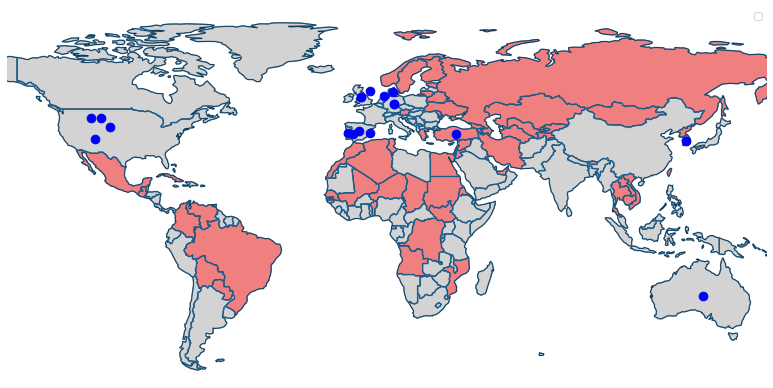

In [12]:


# Create a new column in the dataframe to indicate mandatory military service
world['mandatory_service'] = world['NAME'].apply(lambda x: x in mandatory_service_countries)

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
world.boundary.plot(ax=ax, alpha=0.5)

# Plot countries: Highlight those with mandatory service in one color, others in another
world[world['mandatory_service']].plot(ax=ax, color='lightcoral', edgecolor='black', label="Mandatory Military Service")
world[~world['mandatory_service']].plot(ax=ax, color='lightgrey',alpha=0.99, edgecolor='black', label="No Mandatory Service")
# world[world['mandatory_service']].plot(ax=ax, color='red',alpha=0.5, legend=True)

# # Add markers for countries with research papers
# for country in research_paper_countries:
#     country_geom = world[world['NAME'] == country].geometry
#     if not country_geom.empty:
#         x, y = country_geom.centroid.x.values[0], country_geom.centroid.y.values[0]
#         ax.scatter(x, y, color='blue', s=80, zorder=5)  # s is the size of the marker

np.random.seed(42)

for country in research_paper_countries:
    country_geom = world[world['NAME'] == country].geometry
    if not country_geom.empty:
        x, y = country_geom.centroid.x.values[0], country_geom.centroid.y.values[0]
        # Add a small random jitter to x and y
        if country in ["United States of America", "Netherlands", "France"]:
            jitter_x = np.random.uniform(-5.2, 5.2)
            jitter_y = np.random.uniform(-5.2, 5.2)
        else: 
            jitter_x =0
            jitter_y=0
        if country == "United States of America": 
            x = x + 6.5
            y = y - 5
        ax.scatter(x + jitter_x, y + jitter_y, color='blue', s=80, zorder=5)  # Scatter with jitter

ax.set_ylim(-60, 90)
ax.set_xlim(-145, 160)
ax.legend()
# Remove axes and borders
ax.axis('off')
ax.set_frame_on(False)

# Add title and legend
# plt.title('Countries with Mandatory Military Service and Research Papers')
plt.show()

# fig.savefig(f"Results/P1_1_conscription_2023_no_research.pdf", bbox_inches='tight')
# fig.savefig(f"Results/P1_1_conscription_2023_with_research.pdf", bbox_inches='tight')


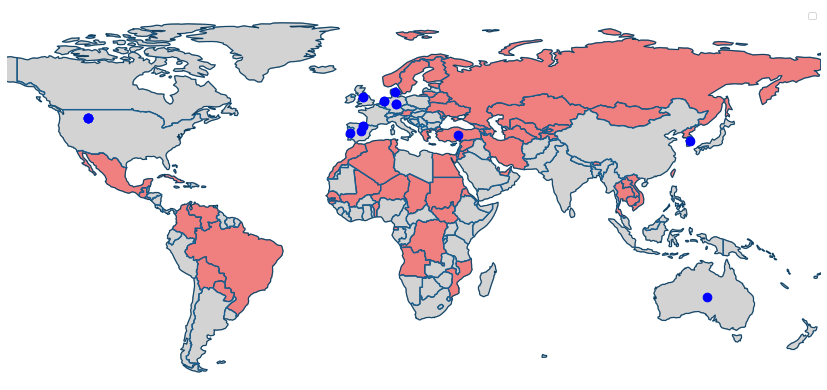

In [13]:

# Create a new column in the dataframe to indicate mandatory military service
world['mandatory_service'] = world['NAME'].apply(lambda x: x in mandatory_service_countries)

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
world.boundary.plot(ax=ax, alpha=0.5)

# Plot countries: Highlight those with mandatory service in one color, others in another
world[world['mandatory_service']].plot(ax=ax, color='lightcoral', edgecolor='black', label="Mandatory Military Service")
world[~world['mandatory_service']].plot(ax=ax, color='lightgrey',alpha=0.99, edgecolor='black', label="No Mandatory Service")
# world[world['mandatory_service']].plot(ax=ax, color='red',alpha=0.5, legend=True)

# Add markers for countries with research papers
for country in research_paper_countries:
    country_geom = world[world['NAME'] == country].geometry
    if not country_geom.empty:
        x, y = country_geom.centroid.x.values[0], country_geom.centroid.y.values[0]
        ax.scatter(x, y, color='blue', s=80, zorder=5)  # s is the size of the marker

ax.set_ylim(-60, 90)
ax.set_xlim(-145, 180)
ax.legend()
# Remove axes and borders
ax.axis('off')
ax.set_frame_on(False)

# Add title and legend
# plt.title('Countries with Mandatory Military Service and Research Papers')
plt.show()